Step 2: Import all the libraries and set up all the requirements that you will be needed(optional)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier

Imported all liabraries which required for classification & EDA

Step 3: Read the train and test data sets, and check for the datatype

In [2]:
train=pd.read_csv('C:\\Users\\Smart User\\Downloads\\ML Mini Project 4 (1)\\Project 4\\train data.csv')
test=pd.read_csv('C:\\Users\\Smart User\\Downloads\\ML Mini Project 4 (1)\\Project 4\\test data.csv')

In [3]:
train

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...                       ...                               ...   

In [4]:
r,c=train.shape
print("There are {} Row and {} Columns is the  train Data-set".format(r,c))

There are 100000 Row and 28 Columns is the  train Data-set


In [5]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [6]:
test

ID Customer_ID      Month             Name   Age          SSN  \
0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265   
1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
3       0x160d   CUS_0xd40   December    Aaron Maashoh   24_  821-00-0265   
4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839   
...        ...         ...        ...              ...   ...          ...   
49995  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942   
49996  0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   
49997  0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   
49998  0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   
49999  0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12            1824.843333                  3  ...   
2      Scientist      19114.12            1824.843333                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4        _______      34847.84            3037.986667                  2  ...   
...          ...           ...                    ...                ...  ...   
49995  Architect      20002.88            1929.906667                 10  ...   
49996   Mechanic      39628.99                    NaN                  4  ...   
49997   Mechanic      39628.99            3359.415833                  4  ...   
49998   Mechanic      39628.99                    NaN                  4  ...   
49999   Mechanic      39628.99            3359.415833                  4  ...   

       Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
0                    2022.0        Good           809.98   
1                       4.0        Good           809.98   
2                       4.0        Good           809.98   
3                       4.0        Good           809.98   
4                       5.0        Good           605.03   
...                     ...         ...              ...   
49995                  12.0           _           3571.7   
49996                   7.0        Good           502.38   
49997                   7.0        Good           502.38   
49998                   7.0        Good           502.38   
49999                   7.0           _           502.38   

      Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                    35.030402   22 Years and 9 Months                    No   
1                    33.053114  22 Years and 10 Months                    No   
2                    33.811894                     NaN                    No   
3                    32.430559   23 Years and 0 Months                    No   
4                    25.926822   27 Years and 3 Months                    No   
...                        ...                     ...                   ...   
49995                34.780553                     NaN                   Yes   
49996                27.758522  31 Years and 11 Months                    NM   
49997                36.858542   32 Years and 0 Months                    No   
49998                39.139840   32 Years and 1 Months                    No   
49999                34.108530   32 Years and 2 Months                    No   

      Total_EMI_per_month  Amount_invested_monthly  \
0               49.574949               236.642682   
1               49.574949              21.46538026   
2               49.574949              148.2339379   
3               49.574949              39.08251089   
4               18.816215              39.68401842   
...                   ...                      ...   
49995           60.964772              146.4863248   


In [7]:
r,c=test.shape
print("There are {} Row and {} Columns is the test Data-set".format(r,c))

There are 50000 Row and 27 Columns is the test Data-set


In [8]:
test.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

Step 4: Fix the problem that the features have been wrongly identified.
 Note: One way to clean the training and testing data is to combine both train and test 
datasets. Then do the cleaning. 
i) Clean the anomalies in the categorical variables. A few anomalies have been 
mentioned here. 
1. Occupation - _______
2. SSN - #F%$D@*&8
3. Payment Behaviour - !@9#%8
Replace the above anomalies by replacing them with the mode of each customer.

In [9]:
#combine train and test data
train['source']='train'
test['source']='test'

In [10]:
data= pd.concat([train,test], ignore_index=True, sort= False)
data

ID Customer_ID      Month            Name   Age          SSN  \
0        0x1602   CUS_0xd40    January   Aaron Maashoh    23  821-00-0265   
1        0x1603   CUS_0xd40   February   Aaron Maashoh    23  821-00-0265   
2        0x1604   CUS_0xd40      March   Aaron Maashoh  -500  821-00-0265   
3        0x1605   CUS_0xd40      April   Aaron Maashoh    23  821-00-0265   
4        0x1606   CUS_0xd40        May   Aaron Maashoh    23  821-00-0265   
...         ...         ...        ...             ...   ...          ...   
149995  0x25fe5  CUS_0x8600   December  Sarah McBridec  4975  031-35-0942   
149996  0x25fee  CUS_0x942c  September           Nicks    25  078-73-5990   
149997  0x25fef  CUS_0x942c    October           Nicks    25  078-73-5990   
149998  0x25ff0  CUS_0x942c   November           Nicks    25  078-73-5990   
149999  0x25ff1  CUS_0x942c   December           Nicks    25  078-73-5990   

       Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       Scientist      19114.12            1824.843333                  3   
1       Scientist      19114.12                    NaN                  3   
2       Scientist      19114.12                    NaN                  3   
3       Scientist      19114.12                    NaN                  3   
4       Scientist      19114.12            1824.843333                  3   
...           ...           ...                    ...                ...   
149995  Architect      20002.88            1929.906667                 10   
149996   Mechanic      39628.99                    NaN                  4   
149997   Mechanic      39628.99            3359.415833                  4   
149998   Mechanic      39628.99                    NaN                  4   
149999   Mechanic      39628.99            3359.415833                  4   

        ...  Outstanding_Debt  Credit_Utilization_Ratio  \
0       ...            809.98                 26.822620   
1       ...            809.98                 31.944960   
2       ...            809.98                 28.609352   
3       ...            809.98                 31.377862   
4       ...            809.98                 24.797347   
...     ...               ...                       ...   
149995  ...            3571.7                 34.780553   
149996  ...            502.38                 27.758522   
149997  ...            502.38                 36.858542   
149998  ...            502.38                 39.139840   
149999  ...            502.38                 34.108530   

            Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0        22 Years and 1 Months                    No            49.574949   
1                          NaN                    No            49.574949   
2        22 Years and 3 Months                    No            49.574949   
3        22 Years and 4 Months                    No            49.574949   
4        22 Years and 5 Months                    No            49.574949   
...                        ...                   ...                  ...   
149995                     NaN                   Yes            60.964772   
149996  31 Years and 11 Months                    NM            35.104023   
149997   32 Years and 0 Months                    No            35.104023   
149998   32 Years and 1 Months                    No            35.104023   
149999   32 Years and 2 Months                    No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                  80.41529544   High_spent_Small_value_payments   
1                  118.2802216    Low_spent_Large_value_payments   
2                  81.69952126   Low_spent_Medium_value_payments   
3                  199.4580744    Low_spent_Small_value_payments   
4                  41.42015309  High_spent_Medium_value_payments   
...                        ...                               ...   
149995             146.4863248    Low_spent_Small_val

In [11]:
data.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [12]:
# Replace the anomalies with the mode of each customer
data['Occupation'] = data.groupby('Customer_ID')['Occupation'].apply(lambda x: x.replace('_______', x.mode()[0]))

In [13]:
data.Occupation.unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [14]:
data.SSN.unique()

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [15]:
data['SSN'] = data.groupby('Customer_ID')['SSN'].apply(lambda x: x.replace('#F%$D@*&8', x.mode()[0]))

In [16]:
data.SSN.unique()

array(['821-00-0265', '004-07-5839', '486-85-3974', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [17]:
data.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [18]:
# Find the mode of the "Payment_Behaviour" column for each group
mode_values = data.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.mode()[0])
print(mode_values)

Customer_ID
CUS_0x1000     High_spent_Small_value_payments
CUS_0x1009    High_spent_Medium_value_payments
CUS_0x100b     High_spent_Large_value_payments
CUS_0x1011    High_spent_Medium_value_payments
CUS_0x1013    High_spent_Medium_value_payments
                            ...               
CUS_0xff3       Low_spent_Small_value_payments
CUS_0xff4      Low_spent_Medium_value_payments
CUS_0xff6      High_spent_Small_value_payments
CUS_0xffc      High_spent_Large_value_payments
CUS_0xffd       Low_spent_Small_value_payments
Name: Payment_Behaviour, Length: 12500, dtype: object


In [19]:
# Replace all anomalies with the mode value for each group
data['Payment_Behaviour'] = data.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.replace('!@9#%8', mode_values[x.name]))

In [20]:
data.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments', '!@9#%8'], dtype=object)

In [21]:
data[data['Payment_Behaviour']=='!@9#%8']

ID Customer_ID      Month             Name  Age          SSN  \
284      0x17aa  CUS_0x9b94        May              Bri   36  734-54-7098   
467      0x18bd  CUS_0x47db      April           Granto   16  507-34-4117   
471      0x18c1  CUS_0x47db     August           Granto   16  507-34-4117   
712      0x1a2e  CUS_0x3861    January     Fiona Ortizx  53_  212-32-2085   
717      0x1a33  CUS_0x3861       June     Fiona Ortizx   53  212-32-2085   
...         ...         ...        ...              ...  ...          ...   
149606  0x25b58  CUS_0x2954   November   Praveen Menoni   45  988-44-7575   
149670  0x25c18  CUS_0x2cb5   November              NaN   52  200-60-2130   
149847  0x25e29  CUS_0x1132   December        Jonathano   40  152-95-7926   
149903  0x25ed1  CUS_0x1232   December              NaN   17  441-26-1297   
149916  0x25efe  CUS_0x8788  September  Sophie Sassardv   25  138-38-7150   

       Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
284       Manager       71681.4            5799.450000                  3   
467      Musician     78988.48_            6449.373333                  9   
471      Musician      78988.48            6449.373333                  9   
712      Engineer     17992.775                    NaN                  3   
717      Engineer     17992.775            1769.397917                  3   
...           ...           ...                    ...                ...   
149606   Musician      22443.96            2114.330000                  4   
149670     Doctor      72817.02            5800.085000                  6   
149847   Mechanic       46268.4            3983.700000                  5   
149903  Developer     14937.49_            1142.790833                  8   
149916   Musician       71025.4            5766.783333                  7   

        ...  Outstanding_Debt  Credit_Utilization_Ratio  \
284     ...           1293.02                 40.791137   
467     ...            1746.9                 39.647078   
471     ...            1746.9                 28.955438   
712     ...            565.22                 22.380399   
717     ...            565.22                 31.053994   
...     ...               ...                       ...   
149606  ...            429.65                 38.069336   
149670  ...             992.2                 23.729572   
149847  ...           1447.57                 37.936048   
149903  ...           3699.44                 38.296408   
149916  ...           2542.42                 27.781154   

            Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
284     25 Years and 11 Months                   Yes            53.923514   
467      10 Years and 4 Months                   Yes           291.782760   
471      10 Years and 8 Months                   Yes           291.782760   
712     18 Years and 11 Months                    No             0.000000   
717      19 Years and 4 Months                    No             0.000000   
...                        ...                   ...                  ...   
149606    7 Years and 7 Months                   Yes            51.247057   
149670   22 Years and 7 Months                    No            53.576198   
149847   14 Years and 4 Months                   Yes           103.778050   
149903   14 Years and 1 Months                    NM            50.960878   
149916   14 Years and 9 Months                   Yes           195.207484   

       Amount_invested_monthly Payment_Behaviour  Monthly_Balance  \
284                  __10000__            !@9#%8         358.0954   
467                178.1531521            !@9#%8      455.0014209   
471                162.0816014            !@9#%8      431.0729716   
712                88.44275347            !@9#%8      348.4970382   
717                23.00301884            !@9#%8      393.9367728   
...                        ...               ...              ...   
149606             256.5179639            !@9#

### Inference - 
in Payment_Behaviour variable even after replacing anomolies with mode it is still showing the anomolies
 in more then 1300 rows.
as they have unique customer id.hence to treat them we will replace them with null values.

In [22]:
data.Payment_Behaviour.replace('!@9#%8',np.nan,inplace=True)

In [23]:
data.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments', nan], dtype=object)

In [ ]:
#Credit_Mix - claening ither caegoorical variables

In [24]:
data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [25]:
data['Credit_Mix']=data['Credit_Mix'].str.replace('_',data['Credit_Mix'].mode()[0])

In [26]:
data['Credit_Mix'].unique()

array(['Standard', 'Good', 'Bad'], dtype=object)

In [27]:
train.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

ii) Clean the anomalies for numerical variables. 
Ex: 
    1. Age has above 8000 values therefore replace the values that are above 100 or 85 
with median values.
Note: I encourage you to replace the abnormal values with customer ID-wise 
median replacement for the customers who have above and below abnormal values. 
(customer-wise median means the median value for each customer. Example: customer aaa 
Annual Income has anomaly value in one row so replace that with customer aaa Annual 
Income median value. )

In [28]:
num_data=data.select_dtypes(include=np.number)
list(num_data)

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

In [29]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'source'],
      dtype='object')

solution - There arre certain vairables which are numeric like "Age",'Annual_Income','Num_of_Loan',
Amount_invested_monthly,'Monthly_Balance',Delay_from_due_date,'Num_of_Delayed_Payment','Changed_Credit_Limit', 
this all are  the numerical variables but due to presence of string it has misleaded data types

### Age

In [30]:
data.Age.unique()

array(['23', '-500', '28_', ..., '326', '7910', '5826'], dtype=object)

In [31]:
data['Age'] = data['Age'].apply(lambda x: x.replace('_', ''))
data

ID Customer_ID      Month            Name   Age          SSN  \
0        0x1602   CUS_0xd40    January   Aaron Maashoh    23  821-00-0265   
1        0x1603   CUS_0xd40   February   Aaron Maashoh    23  821-00-0265   
2        0x1604   CUS_0xd40      March   Aaron Maashoh  -500  821-00-0265   
3        0x1605   CUS_0xd40      April   Aaron Maashoh    23  821-00-0265   
4        0x1606   CUS_0xd40        May   Aaron Maashoh    23  821-00-0265   
...         ...         ...        ...             ...   ...          ...   
149995  0x25fe5  CUS_0x8600   December  Sarah McBridec  4975  031-35-0942   
149996  0x25fee  CUS_0x942c  September           Nicks    25  078-73-5990   
149997  0x25fef  CUS_0x942c    October           Nicks    25  078-73-5990   
149998  0x25ff0  CUS_0x942c   November           Nicks    25  078-73-5990   
149999  0x25ff1  CUS_0x942c   December           Nicks    25  078-73-5990   

       Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       Scientist      19114.12            1824.843333                  3   
1       Scientist      19114.12                    NaN                  3   
2       Scientist      19114.12                    NaN                  3   
3       Scientist      19114.12                    NaN                  3   
4       Scientist      19114.12            1824.843333                  3   
...           ...           ...                    ...                ...   
149995  Architect      20002.88            1929.906667                 10   
149996   Mechanic      39628.99                    NaN                  4   
149997   Mechanic      39628.99            3359.415833                  4   
149998   Mechanic      39628.99                    NaN                  4   
149999   Mechanic      39628.99            3359.415833                  4   

        ...  Outstanding_Debt  Credit_Utilization_Ratio  \
0       ...            809.98                 26.822620   
1       ...            809.98                 31.944960   
2       ...            809.98                 28.609352   
3       ...            809.98                 31.377862   
4       ...            809.98                 24.797347   
...     ...               ...                       ...   
149995  ...            3571.7                 34.780553   
149996  ...            502.38                 27.758522   
149997  ...            502.38                 36.858542   
149998  ...            502.38                 39.139840   
149999  ...            502.38                 34.108530   

            Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0        22 Years and 1 Months                    No            49.574949   
1                          NaN                    No            49.574949   
2        22 Years and 3 Months                    No            49.574949   
3        22 Years and 4 Months                    No            49.574949   
4        22 Years and 5 Months                    No            49.574949   
...                        ...                   ...                  ...   
149995                     NaN                   Yes            60.964772   
149996  31 Years and 11 Months                    NM            35.104023   
149997   32 Years and 0 Months                    No            35.104023   
149998   32 Years and 1 Months                    No            35.104023   
149999   32 Years and 2 Months                    No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                  80.41529544   High_spent_Small_value_payments   
1                  118.2802216    Low_spent_Large_value_payments   
2                  81.69952126   Low_spent_Medium_value_payments   
3                  199.4580744    Low_spent_Small_value_payments   
4                  41.42015309  High_spent_Medium_value_payments   
...                        ...                               ...   
149995             146.4863248    Low_spent_Small_val

In [32]:
data.Age.unique()

array(['23', '-500', '28', ..., '326', '7910', '5826'], dtype=object)

In [33]:
data['Age']=data['Age'].astype('float')

In [34]:
# Find the median age for each customer
customer_age_median = data.groupby('Customer_ID')['Age'].transform('median')

# we have Find the customers who have abnormal age values
abnormal_age_customers = data[(data['Age'] > 100) | (data['Age'] < 18)]['Customer_ID'].unique()

# then we replace the abnormal age values with the customer-wise median values
for customer in abnormal_age_customers:
    customer_median_age = customer_age_median[data['Customer_ID'] == customer].iloc[0]
    data.loc[(data['Customer_ID'] == customer) & ((data['Age'] > 100) | (data['Age'] < 18)), 'Age'] = customer_median_age

In [35]:
data['Age']=data['Age'].astype('int')

In [36]:
data['Age'].values

array([23, 23, 23, ..., 25, 25, 25])

In [ ]:
# Inference - here we have replace the abnormal values with median by each customer Id

In [ ]:
2.Few columns have - negative values but they are not supposed to have negative values. So replace the negative values with the median by doing a customer-wise median.
3.Go through each variable and find out the other mistakes. And handle them

In [ ]:
Before Addresing the negative values we need to first address the miss leaded data type 
due to presence of sring in numerical columns and then we will handel negative values.

 There are certain vairables which are numeric like "Age",'Annual_Income','Num_of_Loan',
#Amount_invested_monthly,'Monthly_Balance',Delay_from_due_date,'Num_of_Delayed_Payment','Changed_Credit_Limit', 
#this all are  the numerical variables but due to presence of string it has misleaded data types

### Annual_Income

In [37]:
data.Annual_Income.unique()

array(['19114.12', '34847.84', '34847.84_', ..., '14937.49_', '71025.4_',
       '22620.79_'], dtype=object)

In [38]:
data['Annual_Income'] = data['Annual_Income'].apply(lambda x: x.replace('_', ''))

In [39]:
data['Annual_Income'] =data['Annual_Income'].astype('float')

In [40]:
data.Annual_Income.unique()

array([   19114.12,    34847.84,   143162.64, ..., 10681037.  ,
       12608143.  ,   250738.  ])

In [41]:
data['Annual_Income'].dtypes

dtype('float64')

In [42]:
#find out the data with v==negative values
# Check if any value in the numeric columns is negative
data[data['Annual_Income']<0]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, source]
Index: []

[0 rows x 29 columns]

### inference - 
there are no negative values in Anuual_Income Hence there is no need to treat them

### Amount_invested_monthly

In [43]:
data['Amount_invested_monthly'].unique()

array(['80.41529544', '118.2802216', '81.69952126', ..., '181.442999',
       '97.59857973', '220.4578781'], dtype=object)

In [44]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'] .str.replace('\D+','.')
data['Amount_invested_monthly']  = data['Amount_invested_monthly'] .str.rstrip('.')
data.head()

ID Customer_ID     Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12            1824.843333                  3  ...   
1       19114.12                    NaN                  3  ...   
2       19114.12                    NaN                  3  ...   
3       19114.12                    NaN                  3  ...   
4       19114.12            1824.843333                  3  ...   

   Outstanding_Debt  Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                 26.822620  22 Years and 1 Months   
1            809.98                 31.944960                    NaN   
2            809.98                 28.609352  22 Years and 3 Months   
3            809.98                 31.377862  22 Years and 4 Months   
4            809.98                 24.797347  22 Years and 5 Months   

  Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
0                    No            49.574949             80.41529544   
1                    No            49.574949             118.2802216   
2                    No            49.574949             81.69952126   
3                    No            49.574949             199.4580744   
4                    No            49.574949             41.42015309   

                  Payment_Behaviour  Monthly_Balance Credit_Score source  
0   High_spent_Small_value_payments      312.4940887         Good  train  
1    Low_spent_Large_value_payments      284.6291625         Good  train  
2   Low_spent_Medium_value_payments      331.2098629         Good  train  
3    Low_spent_Small_value_payments      223.4513097         Good  train  
4  High_spent_Medium_value_payments       341.489231         Good  train  

[5 rows x 29 columns]

In [45]:
data['Amount_invested_monthly']=data['Amount_invested_monthly'].astype('float')

In [46]:
data[data['Amount_invested_monthly']<0]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, source]
Index: []

[0 rows x 29 columns]

### inference - 
there are no negative values

### Monthly_Balance

In [47]:
list(data['Monthly_Balance'].unique())

['312.4940887',
 '284.6291625',
 '331.2098629',
 '223.4513097',
 '341.489231',
 '340.4792118',
 '244.5653167',
 '358.1241676',
 '470.6906269',
 '484.5912143',
 '466.4664764',
 '465.6762241',
 '444.8670319',
 '481.5052619',
 '464.8806779',
 '356.0781086',
 '1043.315978',
 '998.8692968',
 '715.7413674',
 '426.5134106',
 '810.7821527',
 '963.9215811',
 '968.5555174',
 '895.4945832',
 '433.604773',
 '409.9518118',
 '411.4271229',
 '262.4995943',
 '359.3749155',
 '419.8807835',
 '443.5499568',
 '379.2163811',
 '288.6055223',
 '460.8872756',
 '392.1922657',
 '438.5454316',
 '482.6076383',
 '497.6872788',
 '394.3189339',
 '364.0000157',
 '740.1960901',
 '705.9312855',
 '698.8107657',
 '270.6681087',
 '690.9186643',
 '633.080175',
 '510.3611005',
 '796.2349097',
 '858.4624744',
 '547.7604572',
 '1038.569407',
 '899.1987716',
 '963.254819',
 '1140.06734',
 '326.2418302',
 '396.1113462',
 '298.1921581',
 '392.1961846',
 '260.9124018',
 '260.0809754',
 '397.2283547',
 '410.6743661',
 '395.1733867

In [48]:
data['Monthly_Balance'] = data['Monthly_Balance'] .str.replace('\D+','.')
data['Monthly_Balance']  = data['Monthly_Balance'] .str.rstrip('.')

In [49]:
data['Monthly_Balance']=data['Monthly_Balance'].astype(float)

In [50]:
data[data['Monthly_Balance']<0]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, source]
Index: []

[0 rows x 29 columns]

### Inference - 
there are no negative values in Monthly_Balance

### Num_of_Delayed_Payment

In [51]:
data['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', ..., '533', '332', '2034'], dtype=object)

In [52]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'] .str.replace('\D+','.')
data['Num_of_Delayed_Payment']  = data['Num_of_Delayed_Payment'] .str.rstrip('.')
data.head()

ID Customer_ID     Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12            1824.843333                  3  ...   
1       19114.12                    NaN                  3  ...   
2       19114.12                    NaN                  3  ...   
3       19114.12                    NaN                  3  ...   
4       19114.12            1824.843333                  3  ...   

   Outstanding_Debt  Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                 26.822620  22 Years and 1 Months   
1            809.98                 31.944960                    NaN   
2            809.98                 28.609352  22 Years and 3 Months   
3            809.98                 31.377862  22 Years and 4 Months   
4            809.98                 24.797347  22 Years and 5 Months   

  Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
0                    No            49.574949               80.415295   
1                    No            49.574949              118.280222   
2                    No            49.574949               81.699521   
3                    No            49.574949              199.458074   
4                    No            49.574949               41.420153   

                  Payment_Behaviour  Monthly_Balance Credit_Score source  
0   High_spent_Small_value_payments       312.494089         Good  train  
1    Low_spent_Large_value_payments       284.629163         Good  train  
2   Low_spent_Medium_value_payments       331.209863         Good  train  
3    Low_spent_Small_value_payments       223.451310         Good  train  
4  High_spent_Medium_value_payments       341.489231         Good  train  

[5 rows x 29 columns]

In [53]:
data['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', ..., '533', '332', '2034'], dtype=object)

### Solution - 
as the column has Nan value which is considered as Float-point and we cannot convert the variable type
into Int hence we need to replace that nan with certain int value and then the column also contain string like ".1"
we need to addresse it  and then change the datatype

In [54]:
# convert column 'A' to numeric data type, replacing non-numeric values with NaN
data['Num_of_Delayed_Payment'] = pd.to_numeric(data['Num_of_Delayed_Payment'], errors='coerce')

# replace NaN values in column 'A' with -1
data['Num_of_Delayed_Payment'].fillna(-1, inplace=True)

# convert column 'A' to integer data type
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(int)

In [55]:
data['Num_of_Delayed_Payment'].unique()

array([   7,   -1,    4, ...,  533,  332, 2034])

In [56]:
data['Num_of_Delayed_Payment'].dtypes

dtype('int32')

### replace the -1  with nan and then replace it  with median by each customer Id

In [57]:
# Find the median value for each customer for the particular numerical variable
customer_column_median = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].median()

# Replace negative values in the particular numerical column with the corresponding customer-wise median values
abnormal_customers = data[(data['Num_of_Delayed_Payment'] < 0)]['Customer_ID'].unique()
for customer in abnormal_customers:
    customer_median = customer_column_median.loc[customer]
    data.loc[(data['Customer_ID'] == customer) & (data['Num_of_Delayed_Payment'] < 0), 'Num_of_Delayed_Payment'] = customer_median

In [58]:
data['Num_of_Delayed_Payment'].unique()

array([   7. ,    5.5,    4. , ...,  533. ,  332. , 2034. ])

In [59]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(int)

In [60]:
data['Num_of_Delayed_Payment'].unique()

array([   7,    5,    4, ...,  533,  332, 2034])

### Changed_Credit_Limit

In [61]:
data['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '35.53', '-4.6', '29.17'], dtype=object)

In [62]:
data['Changed_Credit_Limit'].replace('_',np.nan,inplace=True)

In [63]:
data['Changed_Credit_Limit'].unique()

array(['11.27', nan, '6.27', ..., '35.53', '-4.6', '29.17'], dtype=object)

In [64]:
data[['Changed_Credit_Limit']]  = data[['Changed_Credit_Limit']].astype(float)
data['Changed_Credit_Limit'].dtypes

dtype('float64')

In [65]:
# Find the median value for each customer for the particular numerical variable
customer_column_median = data.groupby('Customer_ID')['Changed_Credit_Limit'].median()

# Replace negative values in the particular numerical column with the corresponding customer-wise median values
abnormal_customers = data[(data['Changed_Credit_Limit'] < 0)]['Customer_ID'].unique()
for customer in abnormal_customers:
    customer_median = customer_column_median.loc[customer]
    data.loc[(data['Customer_ID'] == customer) & (data['Changed_Credit_Limit'] < 0), 'Changed_Credit_Limit'] = customer_median

### Outstanding_Debt

In [66]:
data['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '559.18_', '3711.23_',
       '732.11_'], dtype=object)

In [67]:
data['Outstanding_Debt'] = data['Outstanding_Debt'].apply(lambda x: x.replace('_', ''))

In [68]:
data['Outstanding_Debt']=data['Outstanding_Debt'].astype(float)

In [69]:
data[data['Outstanding_Debt']<0]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, source]
Index: []

[0 rows x 29 columns]

### inference -
it has 0 negative values hence no need to treat them

### Num_of_Loan

In [70]:
data.Num_of_Loan.unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [71]:
data['Num_of_Loan'] = data['Num_of_Loan'].apply(lambda x: x.replace('_', ''))

In [72]:
data.Num_of_Loan.unique()

array(['4', '1', '3', '967', '-100', '0', '2', '7', '5', '6', '8', '9',
       '1464', '622', '352', '472', '1017', '945', '146', '563', '341',
       '444', '720', '1485', '49', '737', '1106', '466', '728', '313',
       '843', '597', '617', '119', '663', '640', '92', '1019', '501',
       '1302', '39', '716', '848', '931', '1214', '186', '424', '1001',
       '1110', '1152', '457', '1433', '1187', '52', '1480', '1047',
       '1035', '1347', '33', '193', '699', '329', '1451', '484', '132',
       '649', '995', '545', '684', '1135', '1094', '1204', '654', '58',
       '348', '614', '1363', '323', '1406', '1348', '430', '153', '1461',
       '905', '1312', '1424', '1154', '95', '1353', '1228', '819', '1006',
       '795', '359', '1209', '590', '696', '1185', '1465', '911', '1181',
       '70', '816', '1369', '143', '1416', '455', '55', '1096', '1474',
       '420', '1131', '904', '89', '1259', '527', '1241', '449', '983',
       '418', '319', '23', '238', '638', '138', '235', '280', '1

In [73]:
data['Num_of_Loan']=data['Num_of_Loan'].astype('int')

In [74]:
# Find the median value for each customer for the particular numerical variable
customer_column_median = data.groupby('Customer_ID')['Num_of_Loan'].median()

# Replace negative values in the particular numerical column with the corresponding customer-wise median values
abnormal_customers = data[(data['Num_of_Loan'] < 0)]['Customer_ID'].unique()
for customer in abnormal_customers:
    customer_median = customer_column_median.loc[customer]
    data.loc[(data['Customer_ID'] == customer) & (data['Num_of_Loan'] < 0), 'Num_of_Loan'] = customer_median

In [75]:
data.Num_of_Loan.unique()

array([   4,    1,    3,  967,    0,    2,    7,    5,    6,    8,    9,
       1464,  622,  352,  472, 1017,  945,  146,  563,  341,  444,  720,
       1485,   49,  737, 1106,  466,  728,  313,  843,  597,  617,  119,
        663,  640,   92, 1019,  501, 1302,   39,  716,  848,  931, 1214,
        186,  424, 1001, 1110, 1152,  457, 1433, 1187,   52, 1480, 1047,
       1035, 1347,   33,  193,  699,  329, 1451,  484,  132,  649,  995,
        545,  684, 1135, 1094, 1204,  654,   58,  348,  614, 1363,  323,
       1406, 1348,  430,  153, 1461,  905, 1312, 1424, 1154,   95, 1353,
       1228,  819, 1006,  795,  359, 1209,  590,  696, 1185, 1465,  911,
       1181,   70,  816, 1369,  143, 1416,  455,   55, 1096, 1474,  420,
       1131,  904,   89, 1259,  527, 1241,  449,  983,  418,  319,   23,
        238,  638,  138,  235,  280, 1070, 1484,  274,  494, 1459,  404,
       1354, 1495, 1391,  601, 1313, 1319,  898,  231,  752,  174,  961,
       1046,  834,  284,  438,  288, 1463, 1151,  7

### Delay_from_due_date

In [76]:
data['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [77]:
data['Delay_from_due_date']=data['Delay_from_due_date'].mask(data['Delay_from_due_date']<0,data['Delay_from_due_date'].median())

Step 6: Convert the Credit_History_Age datatype variable into float data types by taking 
only year and month. Example. 22 years and 1 month → 22.1. And the 
Payment_of_Min_Amount column you might find some other weird values apart from Yes 
and No. And If you have combined the train and test datasets, then change the month's 
names into its number.

In [78]:
data['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [79]:
data['Credit_History_Age'] = data['Credit_History_Age'] .str.replace('\D+','.')
data['Credit_History_Age'] = data['Credit_History_Age'] .str.rstrip('.')
data.head()

ID Customer_ID     Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12            1824.843333                  3  ...   
1       19114.12                    NaN                  3  ...   
2       19114.12                    NaN                  3  ...   
3       19114.12                    NaN                  3  ...   
4       19114.12            1824.843333                  3  ...   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                 26.822620                22.1   
1            809.98                 31.944960                 NaN   
2            809.98                 28.609352                22.3   
3            809.98                 31.377862                22.4   
4            809.98                 24.797347                22.5   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                80.415295   
1                    No            49.574949               118.280222   
2                    No            49.574949                81.699521   
3                    No            49.574949               199.458074   
4                    No            49.574949                41.420153   

                  Payment_Behaviour  Monthly_Balance Credit_Score  source  
0   High_spent_Small_value_payments       312.494089         Good   train  
1    Low_spent_Large_value_payments       284.629163         Good   train  
2   Low_spent_Medium_value_payments       331.209863         Good   train  
3    Low_spent_Small_value_payments       223.451310         Good   train  
4  High_spent_Medium_value_payments       341.489231         Good   train  

[5 rows x 29 columns]

In [83]:
data['Credit_History_Age']  = data[['Credit_History_Age']] .astype(float)
data['Credit_History_Age'].dtypes

dtype('float64')

In [ ]:
Payment_of_Min_Amount column you might find some other weird values apart from Yes 
and No.

In [81]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [82]:
data['Payment_of_Min_Amount'].replace('NM',np.nan,inplace=True)

In [84]:
data['Payment_of_Min_Amount'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [85]:
#now replace nan with customer-wise median.
# calculate customer-wise mode value
mode_by_customer = data.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(lambda x: x.mode()[0])

# replace NaN values with customer-wise mode value
data['Payment_of_Min_Amount'].fillna(data['Customer_ID'].map(mode_by_customer), inplace=True)

# display the updated DataFrame
data

ID Customer_ID      Month            Name  Age          SSN  \
0        0x1602   CUS_0xd40    January   Aaron Maashoh   23  821-00-0265   
1        0x1603   CUS_0xd40   February   Aaron Maashoh   23  821-00-0265   
2        0x1604   CUS_0xd40      March   Aaron Maashoh   23  821-00-0265   
3        0x1605   CUS_0xd40      April   Aaron Maashoh   23  821-00-0265   
4        0x1606   CUS_0xd40        May   Aaron Maashoh   23  821-00-0265   
...         ...         ...        ...             ...  ...          ...   
149995  0x25fe5  CUS_0x8600   December  Sarah McBridec   28  031-35-0942   
149996  0x25fee  CUS_0x942c  September           Nicks   25  078-73-5990   
149997  0x25fef  CUS_0x942c    October           Nicks   25  078-73-5990   
149998  0x25ff0  CUS_0x942c   November           Nicks   25  078-73-5990   
149999  0x25ff1  CUS_0x942c   December           Nicks   25  078-73-5990   

       Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       Scientist       19114.12            1824.843333                  3   
1       Scientist       19114.12                    NaN                  3   
2       Scientist       19114.12                    NaN                  3   
3       Scientist       19114.12                    NaN                  3   
4       Scientist       19114.12            1824.843333                  3   
...           ...            ...                    ...                ...   
149995  Architect       20002.88            1929.906667                 10   
149996   Mechanic       39628.99                    NaN                  4   
149997   Mechanic       39628.99            3359.415833                  4   
149998   Mechanic       39628.99                    NaN                  4   
149999   Mechanic       39628.99            3359.415833                  4   

        ...  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       ...            809.98                 26.822620               22.10   
1       ...            809.98                 31.944960                 NaN   
2       ...            809.98                 28.609352               22.30   
3       ...            809.98                 31.377862               22.40   
4       ...            809.98                 24.797347               22.50   
...     ...               ...                       ...                 ...   
149995  ...           3571.70                 34.780553                 NaN   
149996  ...            502.38                 27.758522               31.11   
149997  ...            502.38                 36.858542               32.00   
149998  ...            502.38                 39.139840               32.10   
149999  ...            502.38                 34.108530               32.20   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                         No            49.574949                80.415295   
1                         No            49.574949               118.280222   
2                         No            49.574949                81.699521   
3                         No            49.574949               199.458074   
4                         No            49.574949                41.420153   
...                      ...                  ...                      ...   
149995                   Yes            60.964772               146.486325   
149996                    No            35.104023               181.442999   
149997                    No            35.104023                 0.100000   
149998                    No            35.104023                97.598580   
149999                    No            35.104023               220.457878   

                       Payment_Behaviour  Monthly_Balance Credit_Score  source  
0        High_spent_Small_value_payments       312.494089         Good   train  
1         Low_spent_Large_value_payments       284.629163         Good   train  
2        Low_spent_Medium_value_pa

And If you have combined the train and test datasets, then change the month's 
names into its number.

In [86]:
data['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [87]:

# create a dictionary mapping month names to their numeric values
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# map month names to their numeric values using the dictionary
data['Month_Number'] = data['Month'].map(month_dict)

# drop the original 'Month' column
data.drop('Month', axis=1, inplace=True)

In [88]:
data['Month_Number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Step 7: Find out the missing values in the data frame and handle them in the best way 
possible. One way of solving this is by imputing the missing values with a customer-wise 
median.

In [89]:
#percentage of null values
Total = data.isnull().sum().sort_values(ascending=False)          

Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   

missing_values = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_values

Total  Percentage of Missing Values
Credit_Score              50000                     33.333333
Monthly_Inhand_Salary     22500                     15.000000
Type_of_Loan              17112                     11.408000
Name                      15000                     10.000000
Credit_History_Age        13500                      9.000000
Amount_invested_monthly    6750                      4.500000
Monthly_Balance            3430                      2.286667
Changed_Credit_Limit       3150                      2.100000
Num_Credit_Inquiries       3000                      2.000000
Payment_Behaviour          1345                      0.896667
Total_EMI_per_month           0                      0.000000
Payment_of_Min_Amount         0                      0.000000
Credit_Mix                    0                      0.000000
Credit_Utilization_Ratio      0                      0.000000
Outstanding_Debt              0                      0.000000
source                        0                      0.000000
ID                            0                      0.000000
Num_of_Delayed_Payment        0                      0.000000
Customer_ID                   0                      0.000000
Delay_from_due_date           0                      0.000000
Num_of_Loan                   0                      0.000000
Interest_Rate                 0                      0.000000
Num_Credit_Card               0                      0.000000
Num_Bank_Accounts             0                      0.000000
Annual_Income                 0                      0.000000
Occupation                    0                      0.000000
SSN                           0                      0.000000
Age                           0                      0.000000
Month_Number                  0                      0.000000

### Inference -
Monthly_Inhand_Salary
Type_of_Loan
Name
Credit_History_Age
Amount_invested_monthly
Monthly_Balance
Changed_Credit_Limit
Num_Credit_Inquiries
Payment_Behaviour all this variables contain null values 

### null value treatment for numerical colum

In [97]:
means = data.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform('mean')
data['Monthly_Inhand_Salary'].fillna(means, inplace=True)
means = data.groupby('Customer_ID')['Num_Credit_Inquiries'].transform('mean')
data['Num_Credit_Inquiries'].fillna(means, inplace=True)
median = data.groupby('Customer_ID')['Credit_History_Age'].transform('median')
data['Credit_History_Age'].fillna(median, inplace=True)
median = data.groupby('Customer_ID')['Amount_invested_monthly'].transform('median')
data['Amount_invested_monthly'].fillna(median, inplace=True)
median = data.groupby('Customer_ID')['Monthly_Balance'].transform('median')
data['Monthly_Balance'].fillna(median, inplace=True)
median = data.groupby('Customer_ID')['Changed_Credit_Limit'].transform('median')
data['Changed_Credit_Limit'].fillna(median, inplace=True)

### Null value treatment for cateforical columns

### 'Type_of_Loan'

In [98]:
list(data['Type_of_Loan'].unique())

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Not Specified',
 nan,
 'Credit-Builder Loan, and Mortgage Loan',
 'Not Specified, Auto Loan, and Student Loan',
 'Personal Loan, Debt Consolidation Loan, and Auto Loan',
 'Not Specified, and Payday Loan',
 'Credit-Builder Loan, Personal Loan, and Auto Loan',
 'Payday Loan, and Payday Loan',
 'Not Specified, Student Loan, and Personal Loan',
 'Personal Loan, Payday Loan, Student Loan, Auto Loan, Home Equity Loan, Student Loan, and Payday Loan',
 'Not Specified, Student Loan, Student Loan, Credit-Builder Loan, and Auto Loan',
 'Payday Loan, and Home Equity Loan',
 'Credit-Builder Loan, Not Specified, Mortgage Loan, Payday Loan, Credit-Builder Loan, and Personal Loan',
 'Mortgage Loan, Debt Consolidation Loan, Payday Loan, Auto Loan, and Not Specified',
 'Credit-Builder Loan, Mortgage Loan, Mortgage Loan, Credit-Builder Loan, and Student Loan',
 'No

In [99]:
data['Type_of_Loan']

0         Auto Loan, Credit-Builder Loan, Personal Loan,...
1         Auto Loan, Credit-Builder Loan, Personal Loan,...
2         Auto Loan, Credit-Builder Loan, Personal Loan,...
3         Auto Loan, Credit-Builder Loan, Personal Loan,...
4         Auto Loan, Credit-Builder Loan, Personal Loan,...
                                ...                        
149995    Personal Loan, Auto Loan, Mortgage Loan, Stude...
149996                          Auto Loan, and Student Loan
149997                          Auto Loan, and Student Loan
149998                          Auto Loan, and Student Loan
149999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 150000, dtype: object

In [100]:
len(data['Type_of_Loan'])

150000

In [101]:
for i in range(len(data['Type_of_Loan'])):
    print(data['Type_of_Loan'].iloc[i])

Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Credit-Builder Loan
Credit-Builder Loan
Credit-Builder Loan
Credit-Builder Loan
Credit-Builder Loan
Credit-Builder Loan
Credit-Builder Loan
Credit-Builder Loan
Auto Loan, Auto Loan, and Not Specified
Auto Loan, Auto Loan, and Not Specified
Auto Loan, Auto Loan, and Not Specified
Auto Loan, Auto Loan, and Not Specified
Auto Loan, Auto Loan, and Not Specified
Auto Loan, Auto Loan, and Not Specified
Auto Loan, Auto Loan, and Not Specified
Auto Loan, Auto 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [102]:
# calculate mode by customer id
mode_by_customer = data.groupby('Customer_ID')['Type_of_Loan'].apply(lambda x: x.mode().iloc)

# fill null values with mode by customer id
data['Type_of_Loan'] = data.groupby('Customer_ID')['Type_of_Loan'].apply(lambda x: x.fillna(mode_by_customer[x.name]))
data

ID Customer_ID            Name  Age          SSN Occupation  \
0        0x1602   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
1        0x1603   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
2        0x1604   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
3        0x1605   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
4        0x1606   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
...         ...         ...             ...  ...          ...        ...   
149995  0x25fe5  CUS_0x8600  Sarah McBridec   28  031-35-0942  Architect   
149996  0x25fee  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   
149997  0x25fef  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   
149998  0x25ff0  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   
149999  0x25ff1  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   

        Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0            19114.12            1824.843333                  3   
1            19114.12            1824.843333                  3   
2            19114.12            1824.843333                  3   
3            19114.12            1824.843333                  3   
4            19114.12            1824.843333                  3   
...               ...                    ...                ...   
149995       20002.88            1929.906667                 10   
149996       39628.99            3359.415833                  4   
149997       39628.99            3359.415833                  4   
149998       39628.99            3359.415833                  4   
149999       39628.99            3359.415833                  4   

        Num_Credit_Card  ...  Credit_Utilization_Ratio  Credit_History_Age  \
0                     4  ...                 26.822620               22.10   
1                     4  ...                 31.944960               22.50   
2                     4  ...                 28.609352               22.30   
3                     4  ...                 31.377862               22.40   
4                     4  ...                 24.797347               22.50   
...                 ...  ...                       ...                 ...   
149995                8  ...                 34.780553                6.05   
149996                6  ...                 27.758522               31.11   
149997                6  ...                 36.858542               32.00   
149998                6  ...                 39.139840               32.10   
149999                6  ...                 34.108530               32.20   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                         No            49.574949                80.415295   
1                         No            49.574949               118.280222   
2                         No            49.574949                81.699521   
3                         No            49.574949               199.458074   
4                         No            49.574949                41.420153   
...                      ...                  ...                      ...   
149995                   Yes            60.964772               146.486325   
149996                    No            35.104023               181.442999   
149997                    No            35.104023                 0.100000   
149998                    No            35.104023                97.598580   
149999                    No            35.104023               220.457878   

                       Payment_Behaviour  Monthly_Balance Credit_Score  \
0        High_spent_Small_value_payments       312.494089         Good   
1         Low_spent_Large_value_payments       284.629163         Good   
2        Low_spent_Medium_value_payments       331.209863         Good   
3         Low_spent_Small_value_payments       223.451310         Good   
4       High_spent_Medium_value_payments       341.

### Name

In [103]:
# calculate mode by customer id
mode_by_customer = data.groupby('Customer_ID')['Name'].apply(lambda x: x.mode()[0])

# fill null values with mode by customer id
data['Name'] = data.groupby('Customer_ID')['Name'].apply(lambda x: x.fillna(mode_by_customer[x.name]))
data

ID Customer_ID            Name  Age          SSN Occupation  \
0        0x1602   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
1        0x1603   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
2        0x1604   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
3        0x1605   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
4        0x1606   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
...         ...         ...             ...  ...          ...        ...   
149995  0x25fe5  CUS_0x8600  Sarah McBridec   28  031-35-0942  Architect   
149996  0x25fee  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   
149997  0x25fef  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   
149998  0x25ff0  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   
149999  0x25ff1  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   

        Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0            19114.12            1824.843333                  3   
1            19114.12            1824.843333                  3   
2            19114.12            1824.843333                  3   
3            19114.12            1824.843333                  3   
4            19114.12            1824.843333                  3   
...               ...                    ...                ...   
149995       20002.88            1929.906667                 10   
149996       39628.99            3359.415833                  4   
149997       39628.99            3359.415833                  4   
149998       39628.99            3359.415833                  4   
149999       39628.99            3359.415833                  4   

        Num_Credit_Card  ...  Credit_Utilization_Ratio  Credit_History_Age  \
0                     4  ...                 26.822620               22.10   
1                     4  ...                 31.944960               22.50   
2                     4  ...                 28.609352               22.30   
3                     4  ...                 31.377862               22.40   
4                     4  ...                 24.797347               22.50   
...                 ...  ...                       ...                 ...   
149995                8  ...                 34.780553                6.05   
149996                6  ...                 27.758522               31.11   
149997                6  ...                 36.858542               32.00   
149998                6  ...                 39.139840               32.10   
149999                6  ...                 34.108530               32.20   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                         No            49.574949                80.415295   
1                         No            49.574949               118.280222   
2                         No            49.574949                81.699521   
3                         No            49.574949               199.458074   
4                         No            49.574949                41.420153   
...                      ...                  ...                      ...   
149995                   Yes            60.964772               146.486325   
149996                    No            35.104023               181.442999   
149997                    No            35.104023                 0.100000   
149998                    No            35.104023                97.598580   
149999                    No            35.104023               220.457878   

                       Payment_Behaviour  Monthly_Balance Credit_Score  \
0        High_spent_Small_value_payments       312.494089         Good   
1         Low_spent_Large_value_payments       284.629163         Good   
2        Low_spent_Medium_value_payments       331.209863         Good   
3         Low_spent_Small_value_payments       223.451310         Good   
4       High_spent_Medium_value_payments       341.

### Payment_Behaviour

In [104]:
# calculate mode by customer id
mode_by_customer = data.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.mode()[0])

# fill null values with mode by customer id
data['Payment_Behaviour'] = data.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(mode_by_customer[x.name]))
data

ID Customer_ID            Name  Age          SSN Occupation  \
0        0x1602   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
1        0x1603   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
2        0x1604   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
3        0x1605   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
4        0x1606   CUS_0xd40   Aaron Maashoh   23  821-00-0265  Scientist   
...         ...         ...             ...  ...          ...        ...   
149995  0x25fe5  CUS_0x8600  Sarah McBridec   28  031-35-0942  Architect   
149996  0x25fee  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   
149997  0x25fef  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   
149998  0x25ff0  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   
149999  0x25ff1  CUS_0x942c           Nicks   25  078-73-5990   Mechanic   

        Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0            19114.12            1824.843333                  3   
1            19114.12            1824.843333                  3   
2            19114.12            1824.843333                  3   
3            19114.12            1824.843333                  3   
4            19114.12            1824.843333                  3   
...               ...                    ...                ...   
149995       20002.88            1929.906667                 10   
149996       39628.99            3359.415833                  4   
149997       39628.99            3359.415833                  4   
149998       39628.99            3359.415833                  4   
149999       39628.99            3359.415833                  4   

        Num_Credit_Card  ...  Credit_Utilization_Ratio  Credit_History_Age  \
0                     4  ...                 26.822620               22.10   
1                     4  ...                 31.944960               22.50   
2                     4  ...                 28.609352               22.30   
3                     4  ...                 31.377862               22.40   
4                     4  ...                 24.797347               22.50   
...                 ...  ...                       ...                 ...   
149995                8  ...                 34.780553                6.05   
149996                6  ...                 27.758522               31.11   
149997                6  ...                 36.858542               32.00   
149998                6  ...                 39.139840               32.10   
149999                6  ...                 34.108530               32.20   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                         No            49.574949                80.415295   
1                         No            49.574949               118.280222   
2                         No            49.574949                81.699521   
3                         No            49.574949               199.458074   
4                         No            49.574949                41.420153   
...                      ...                  ...                      ...   
149995                   Yes            60.964772               146.486325   
149996                    No            35.104023               181.442999   
149997                    No            35.104023                 0.100000   
149998                    No            35.104023                97.598580   
149999                    No            35.104023               220.457878   

                       Payment_Behaviour  Monthly_Balance Credit_Score  \
0        High_spent_Small_value_payments       312.494089         Good   
1         Low_spent_Large_value_payments       284.629163         Good   
2        Low_spent_Medium_value_payments       331.209863         Good   
3         Low_spent_Small_value_payments       223.451310         Good   
4       High_spent_Medium_value_payments       341.

In [105]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
source                          0
Month_Number                    0
dtype: int64

In [106]:
data.dtypes

ID                           object
Customer_ID                  object
Name                         object
Age                           int32
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment        int32
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
source                      

Step 8: Perform Univariate, Bivariate, and Multivariate analyses to find the factors that 
affect the Target variables.

#### UNIVARIATE ANALYSIS for numerical variable

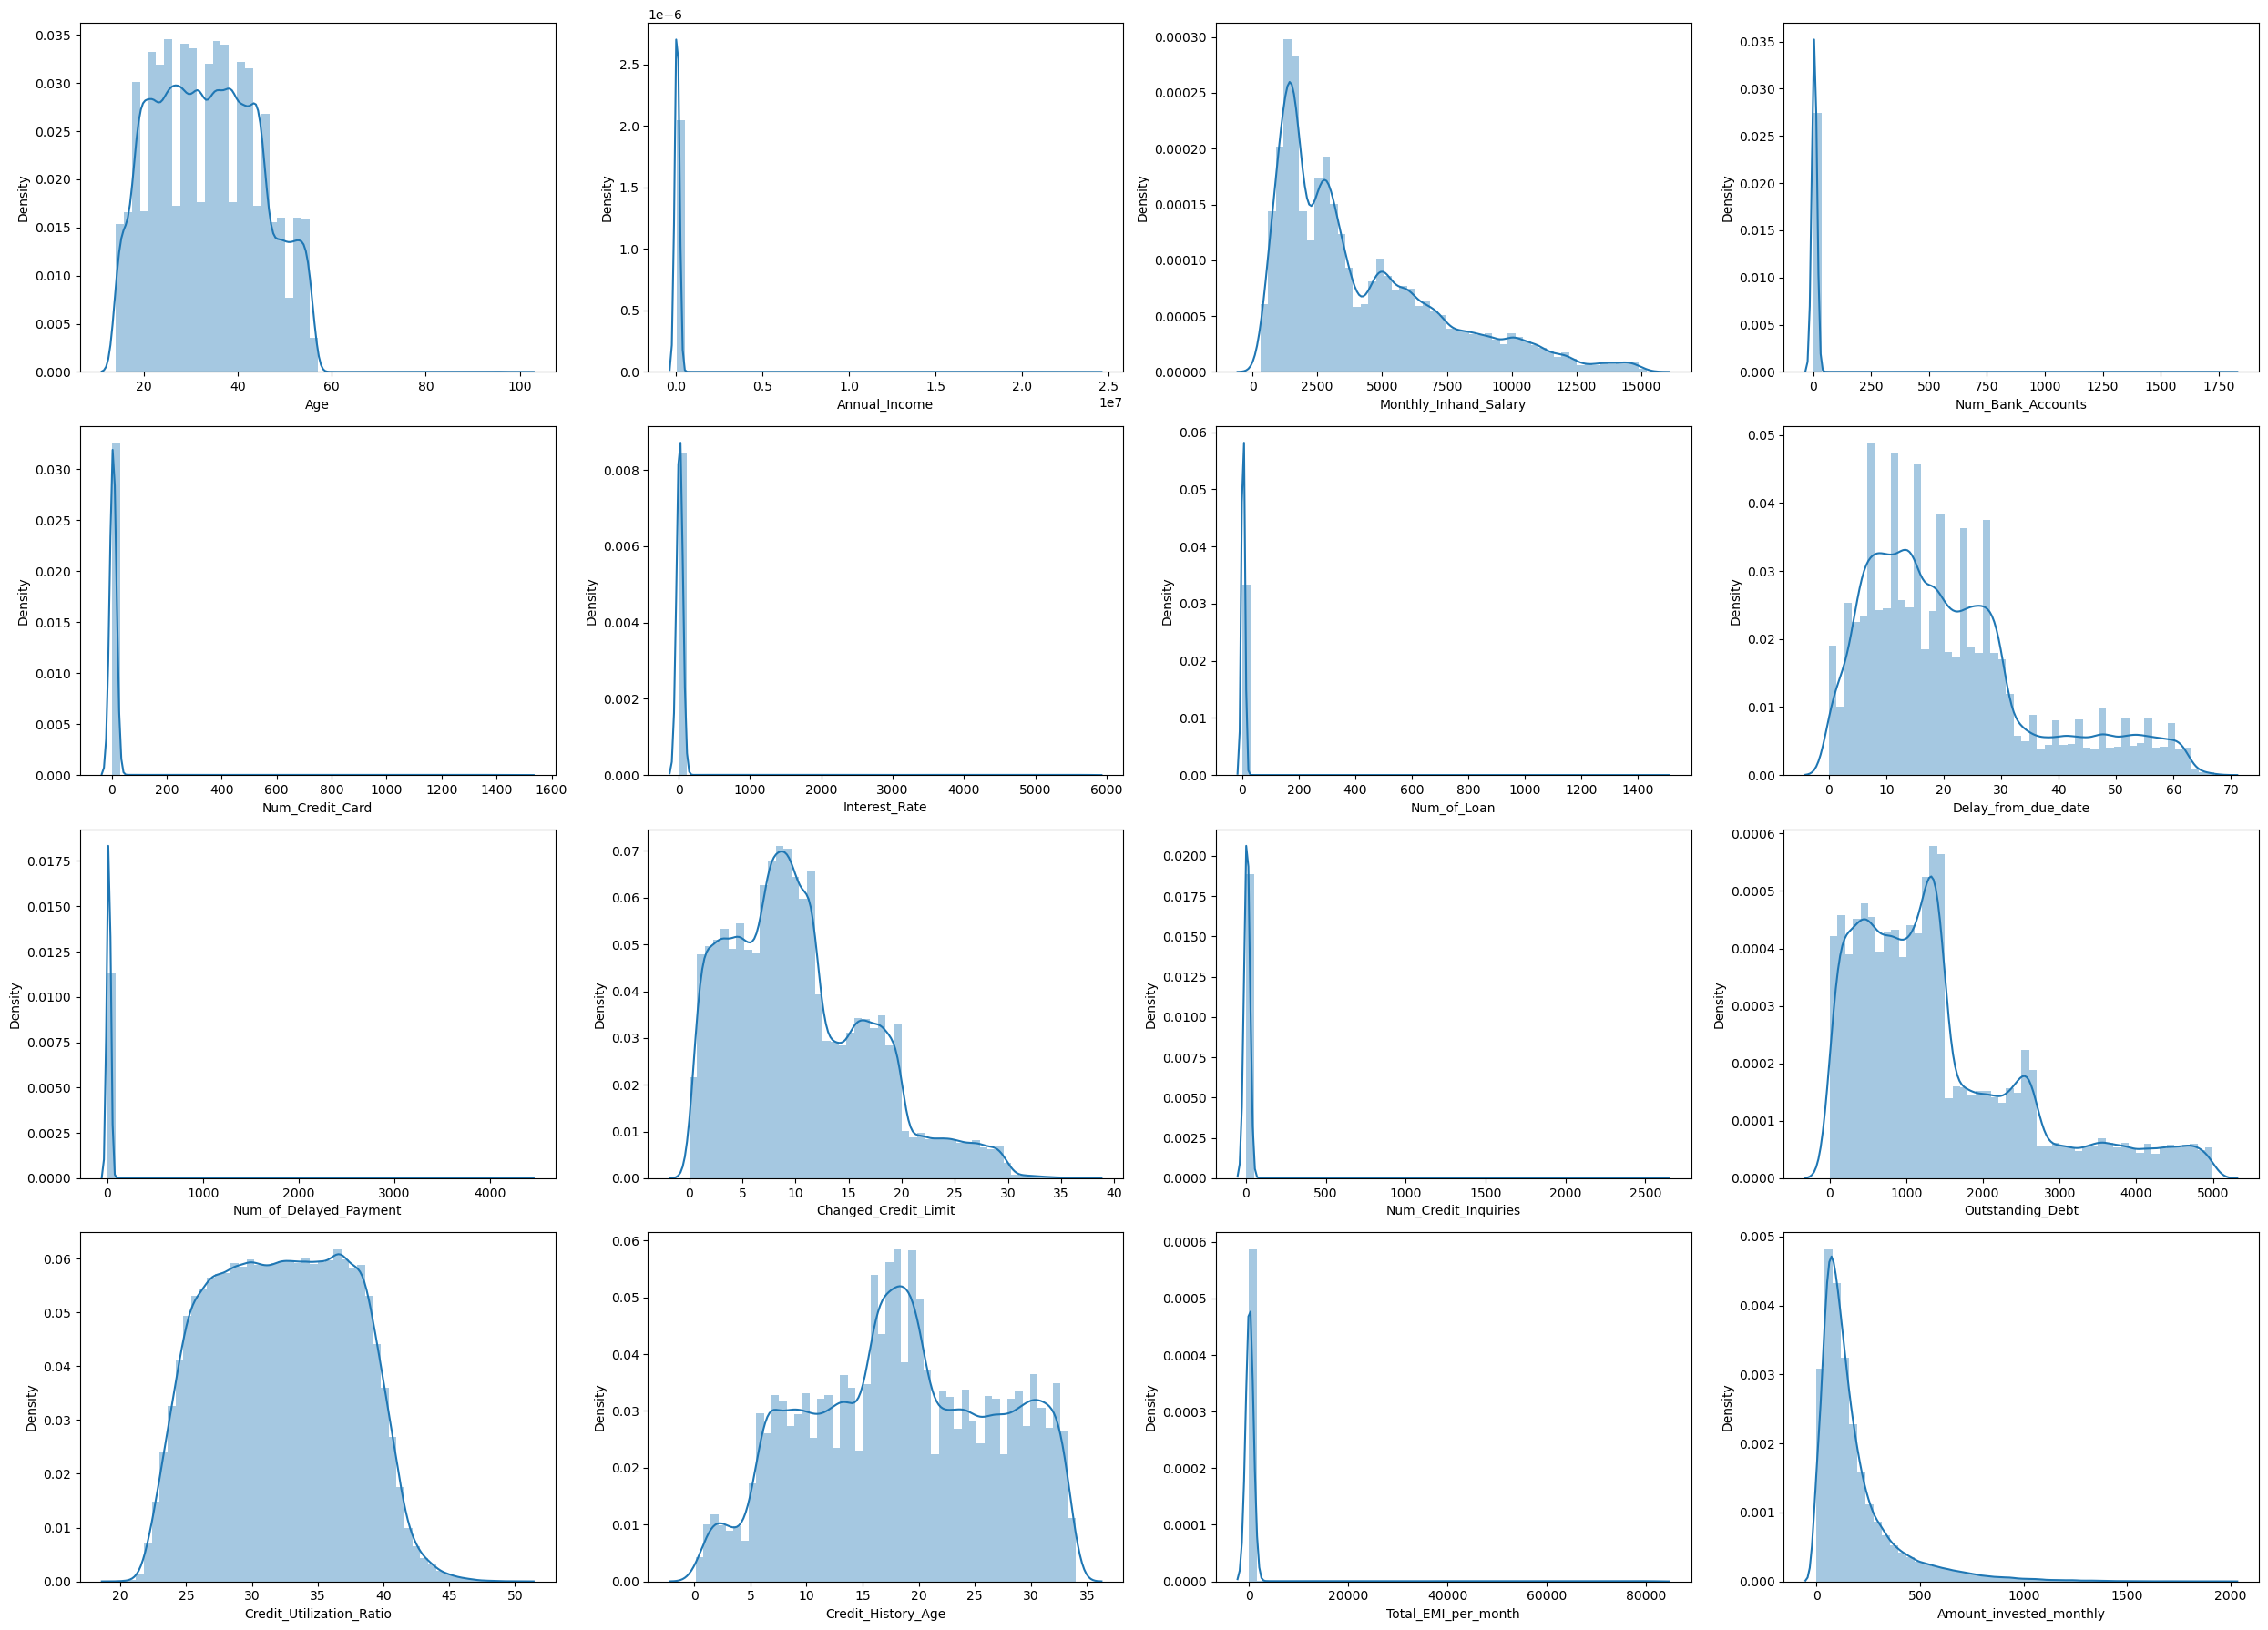

In [108]:
fig,ax=plt.subplots(4,4,figsize=(25,18))
for i,a in zip(data.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.distplot(data[i],ax=a)
    plt.tight_layout()
    fig.show() 

## Inference:-
1) Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_credit_card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Rati, Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance are Right Skew variabele

2) Monthly_in_hand_Salary have 3 bins are observed which means their are 3 groups of salary brackets, as well as Right skew.

3) Delay_from_due_date also have 3 bins are observed as well as right Skew.

4) Credit_History_Age has 4 bins are observed.

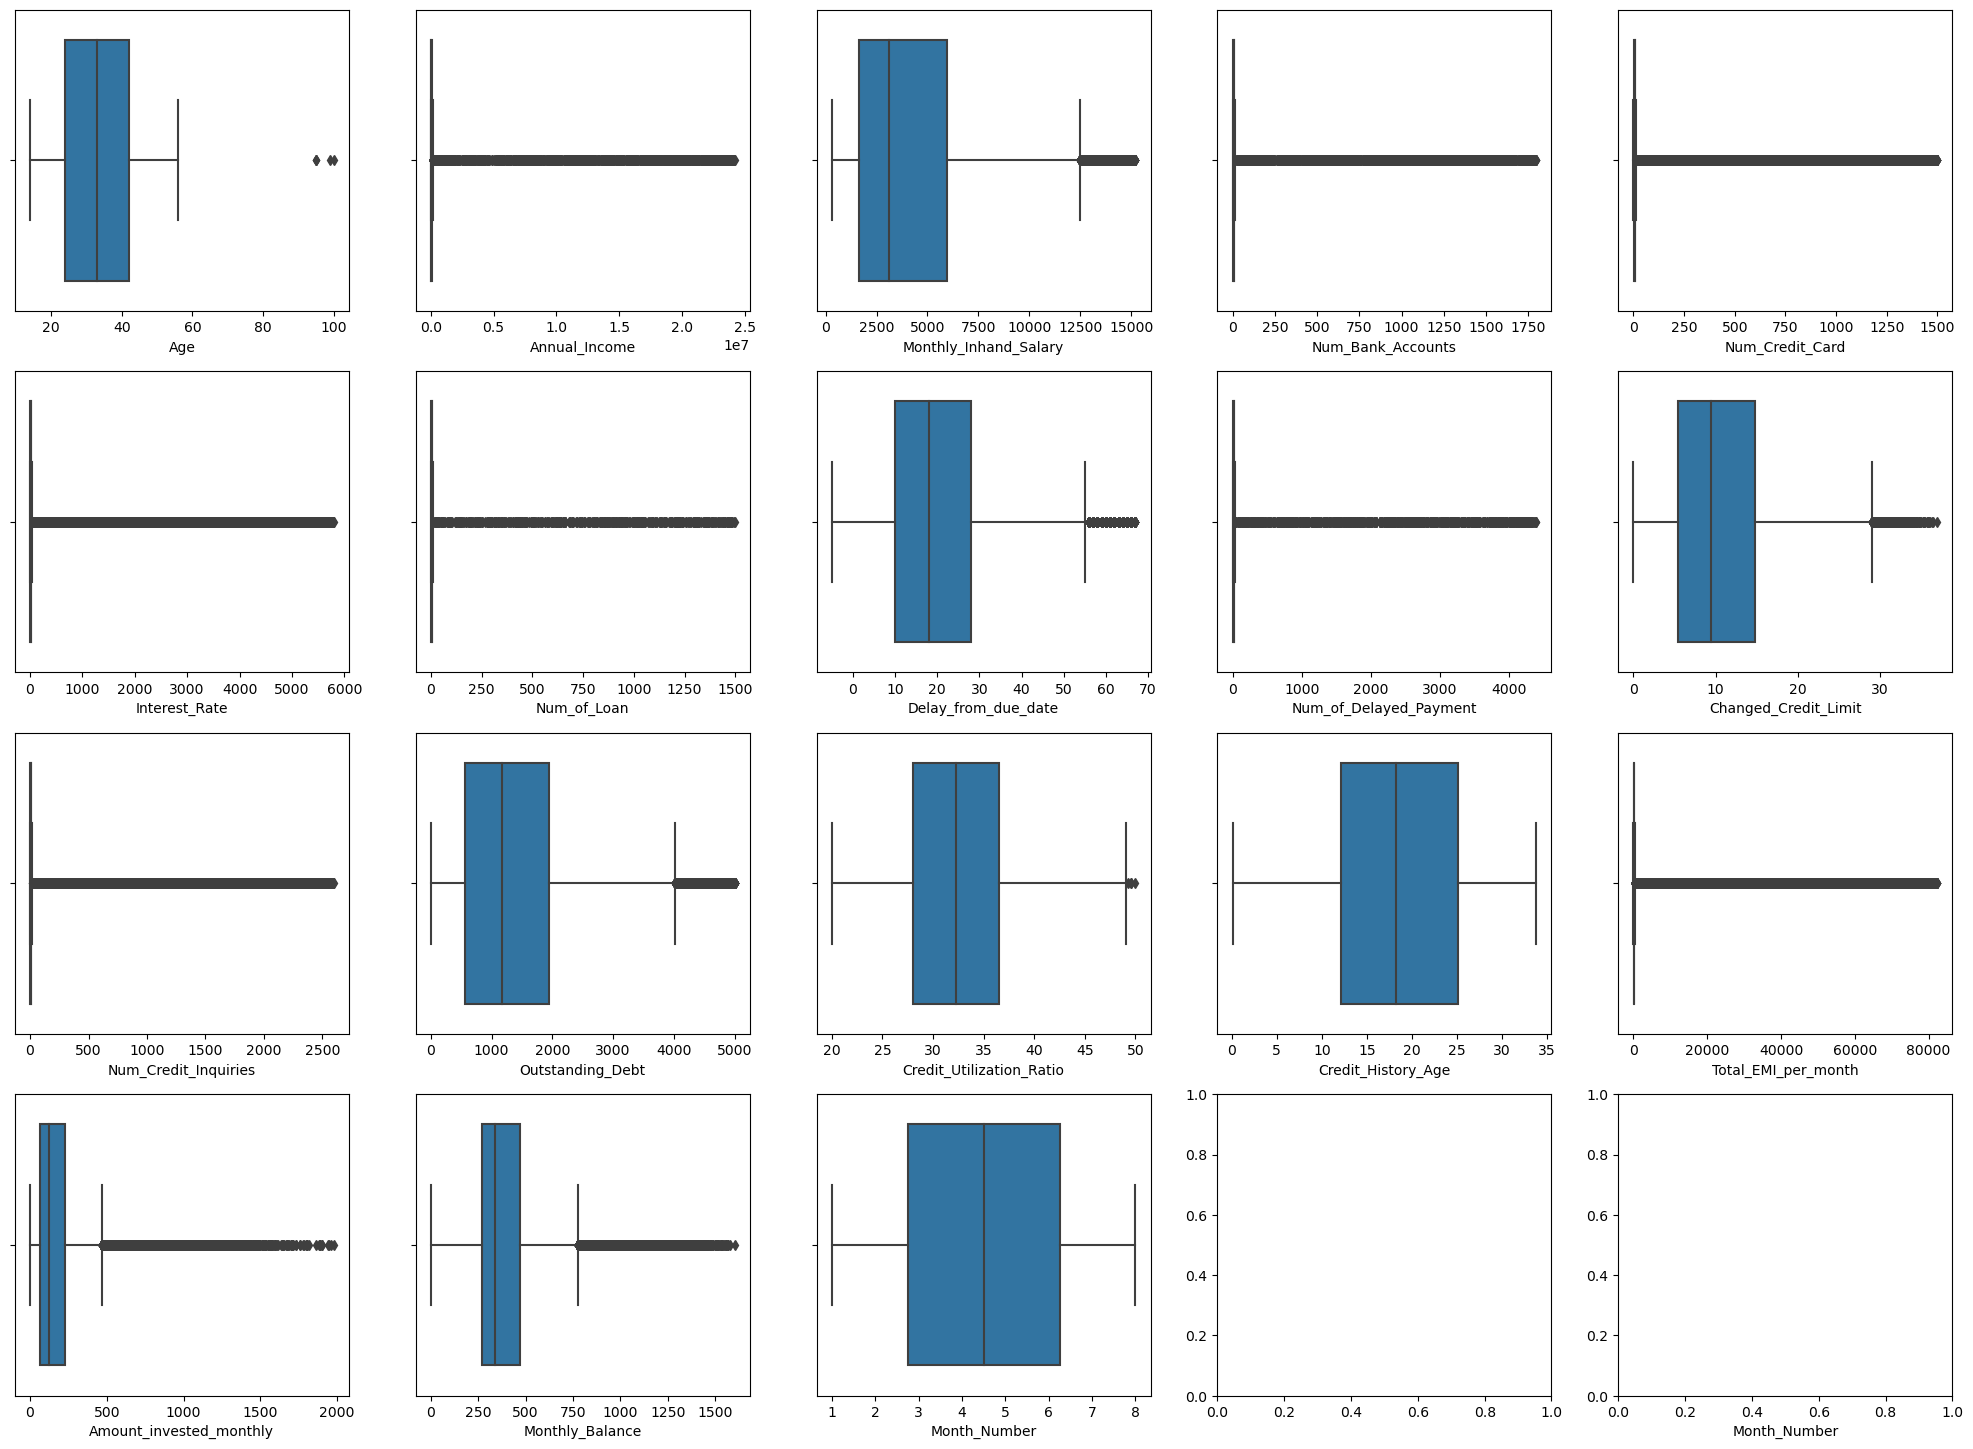

In [165]:
# Outlier detection
fig,ax = plt.subplots(4,5,figsize=(25,18))
for c,i in zip(num_data.columns,ax.flatten()):
    sns.boxplot(num_data[c], ax=i)
    plt.xlabel(c)
plt.show()

In [167]:
'''#outlier Treatment
q1=num_data.quantile(0.25)
q3=num_data.quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
data_wo=num_data[~((num_data<lower)|(num_data>upper)).any(axis=1)]
data_wo'''

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       23       19114.12            1824.843333                  3   
1       23       19114.12            1824.843333                  3   
2       23       19114.12            1824.843333                  3   
3       23       19114.12            1824.843333                  3   
4       23       19114.12            1824.843333                  3   
...    ...            ...                    ...                ...   
99994   25       39628.99            3359.415833                  4   
99995   25       39628.99            3359.415833                  4   
99996   25       39628.99            3359.415833                  4   
99998   25       39628.99            3359.415833                  4   
99999   25       39628.99            3359.415833                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                    4              3            4                    3   
1                    4              3            4                   -1   
2                    4              3            4                    3   
3                    4              3            4                    5   
4                    4              3            4                    6   
...                ...            ...          ...                  ...   
99994                6              7            2                   20   
99995                6              7            2                   23   
99996                6              7            2                   18   
99998                6              7            2                   20   
99999                6              7            2                   18   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                           7                 11.27                   4.0   
1                           4                 11.27                   4.0   
2                           7                 11.27                   4.0   
3                           4                  6.27                   4.0   
4                           4                 11.27                   4.0   
...                       ...                   ...                   ...   
99994                       6                  9.50                   3.0   
99995                       7                 11.50                   3.0   
99996                       7                 11.50                   3.0   
99998                       5                 11.50                   3.0   
99999                       6                 11.50                   3.0   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0                809.98                 26.822620                22.1   
1                809.98                 31.944960                22.5   
2                809.98                 28.609352                22.3   
3                809.98                 31.377862                22.4   
4                809.98                 24.797347                22.5   
...                 ...                       ...                 ...   
99994            502.38                 39.323569                31.5   
99995            502.38                 34.663572                31.6   
99996            502.38                 40.565631                31.7   
99998            502.38                 33.638208                31.9   
99999            502.38                 34.192463                31.1   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  \
0                49.574949                80.415295       312.494089   
1                49.574949               118.280222       284.629163   
2                49.574949                81.699521       331.209863   
3                49.574949               199.458074       223.451310   
4                49.574949                41.420153       341.489231   
...                

In [169]:
'''data=pd.concat([data_wo,cat_data],axis=1)
data'''

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                3.0   
1      23.0       19114.12            1824.843333                3.0   
2      23.0       19114.12            1824.843333                3.0   
3      23.0       19114.12            1824.843333                3.0   
4      23.0       19114.12            1824.843333                3.0   
...     ...            ...                    ...                ...   
99960   NaN            NaN                    NaN                NaN   
99970   NaN            NaN                    NaN                NaN   
99985   NaN            NaN                    NaN                NaN   
99993   NaN            NaN                    NaN                NaN   
99997   NaN            NaN                    NaN                NaN   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  4.0            3.0          4.0                  3.0   
1                  4.0            3.0          4.0                 -1.0   
2                  4.0            3.0          4.0                  3.0   
3                  4.0            3.0          4.0                  5.0   
4                  4.0            3.0          4.0                  6.0   
...                ...            ...          ...                  ...   
99960              NaN            NaN          NaN                  NaN   
99970              NaN            NaN          NaN                  NaN   
99985              NaN            NaN          NaN                  NaN   
99993              NaN            NaN          NaN                  NaN   
99997              NaN            NaN          NaN                  NaN   

       Num_of_Delayed_Payment  Changed_Credit_Limit  ...       ID  \
0                         7.0                 11.27  ...   0x1602   
1                         4.0                 11.27  ...   0x1603   
2                         7.0                 11.27  ...   0x1604   
3                         4.0                  6.27  ...   0x1605   
4                         4.0                 11.27  ...   0x1606   
...                       ...                   ...  ...      ...   
99960                     NaN                   NaN  ...  0x25fb6   
99970                     NaN                   NaN  ...  0x25fc4   
99985                     NaN                   NaN  ...  0x25fdb   
99993                     NaN                   NaN  ...  0x25fe7   
99997                     NaN                   NaN  ...  0x25feb   

       Customer_ID             Name          SSN     Occupation  \
0        CUS_0xd40    Aaron Maashoh  821-00-0265      Scientist   
1        CUS_0xd40    Aaron Maashoh  821-00-0265      Scientist   
2        CUS_0xd40    Aaron Maashoh  821-00-0265      Scientist   
3        CUS_0xd40    Aaron Maashoh  821-00-0265      Scientist   
4        CUS_0xd40    Aaron Maashoh  821-00-0265      Scientist   
...            ...              ...          ...            ...   
99960   CUS_0x372c  Lucia Mutikanik  340-85-7301         Lawyer   
99970    CUS_0xf16   Maria Sheahanb  868-70-2218  Media_Manager   
99985   CUS_0x8600   Sarah McBridec  031-35-0942      Architect   
99993   CUS_0x942c            Nicks  078-73-5990       Mechanic   
99997   CUS_0x942c            Nicks  078-73-5990       Mechanic   

                                            Type_of_Loan  Credit_Mix  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...    Standard   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...        Good   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...        Good   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...        Good   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...        Good   
...                                                  ...         ...   
99960                                      Not Specified        Good   
99970  Payday Loan, Student Loan

#### UNIVARIATE ANALYSIS for categorical variable

In [ ]:

fig,ax=plt.subplots(4,4,figsize=(40,20))
for i,a in zip(data.select_dtypes(exclude=np.number).columns,ax.flatten()):
    sns.countplot(data[i],ax=a) 
    plt.tight_layout() 
    plt.figure()

### Inference:-¶
1) In Payment_of_min_Amount 3 unique categories are observed yes is the domainating class followed by No then NM. This is the minimum amount of money that must be paid in order to avoid late payment fees or negative impacts on the borrower's credit score.

2) In 'Payment_Behaviour' 6 unique categories are notice amont them Low_spent_Small_value_payments is the Domainating class.

3) A score of 670 or higher is considered "Good" , A score between 580 and 669 is considered "Fair" or "Standard," , A score below 580 is considered "Poor" in our case standard credit score is domainating class followed by Poor credit_score

4) In "Credit_Mix" Standard is highest occurance followed by Good then bad.

5) In "Occupation" variable it is observe that Lawyer is the occupation where the maximum people are working

### Bivariate analysis of Numeric Numerical vaiable

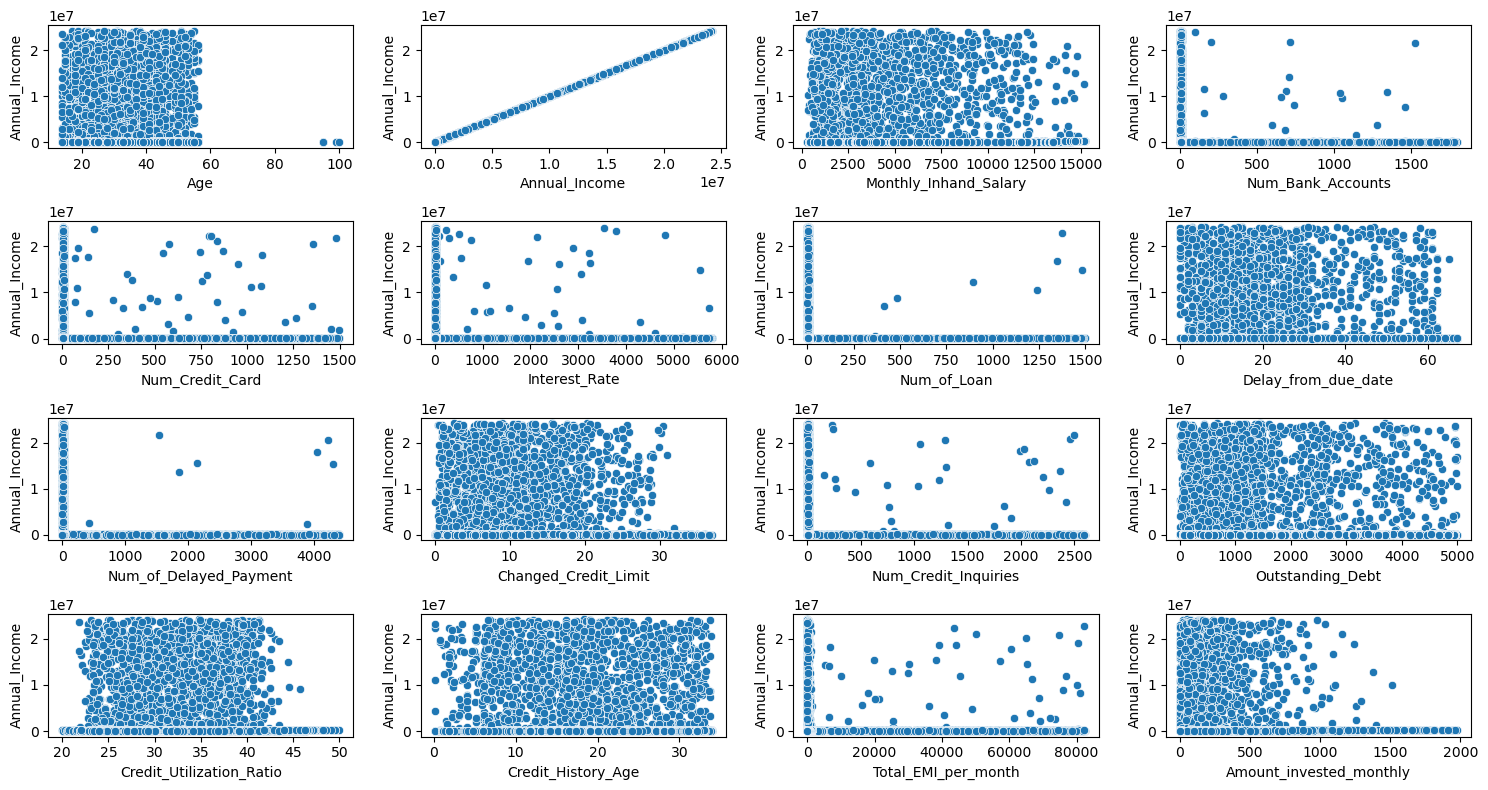

In [110]:
cols=list(data.select_dtypes(include=np.number))
fig,ax=plt.subplots(4,4,figsize=(15,8))
for i,subplots in zip(cols,ax.flatten()):
    sns.scatterplot(data[i],data['Annual_Income'],ax=subplots)
plt.tight_layout()
plt.show()

### Inference - 
1) Their is relation between Annual_Income and Num_credit_Card, Annual_Income and interest_Rate , annual_Income and Amount_Invested_Monthly

2) Their is positive co-rrelation between Annual_Income vs Total_EMI_per_Month, Num_of_Loan, Num_of_Credit_card

### Bivariate analysis of Numeric Categorical vaiable

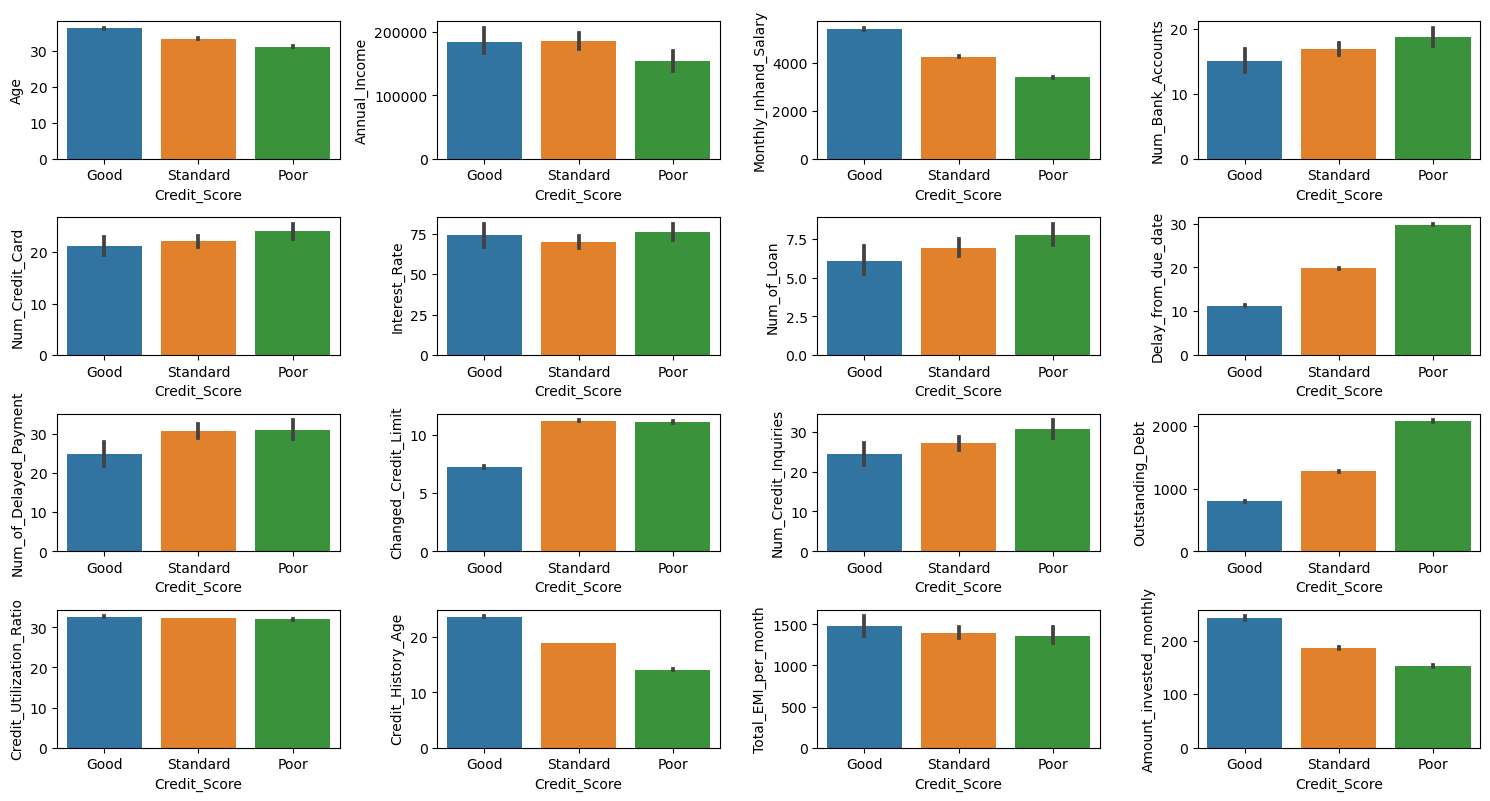

In [111]:
cols=list(data.select_dtypes(include=np.number))
fig,ax=plt.subplots(4,4,figsize=(15,8))
for i,subplots in zip(cols,ax.flatten()):
    sns.barplot(y=data[i],x=data['Credit_Score'],ax=subplots)
plt.tight_layout()
plt.show()

### Inference:-
1) The People who have higher Annual_Income They have good credit_score, The People who have more No_of_Bank_Accouts Their credit_score is poor.

2) The People who have more credit_card they have Poor Credit_score, The people who delay the Credit_card payment they have Poor Credit_score.

3) The People who Amount_of_Invesment_monthly is hight as well as monthly_Balance is high their credit_Score is Good.

### Multivariate analyses Numerical to Numerical

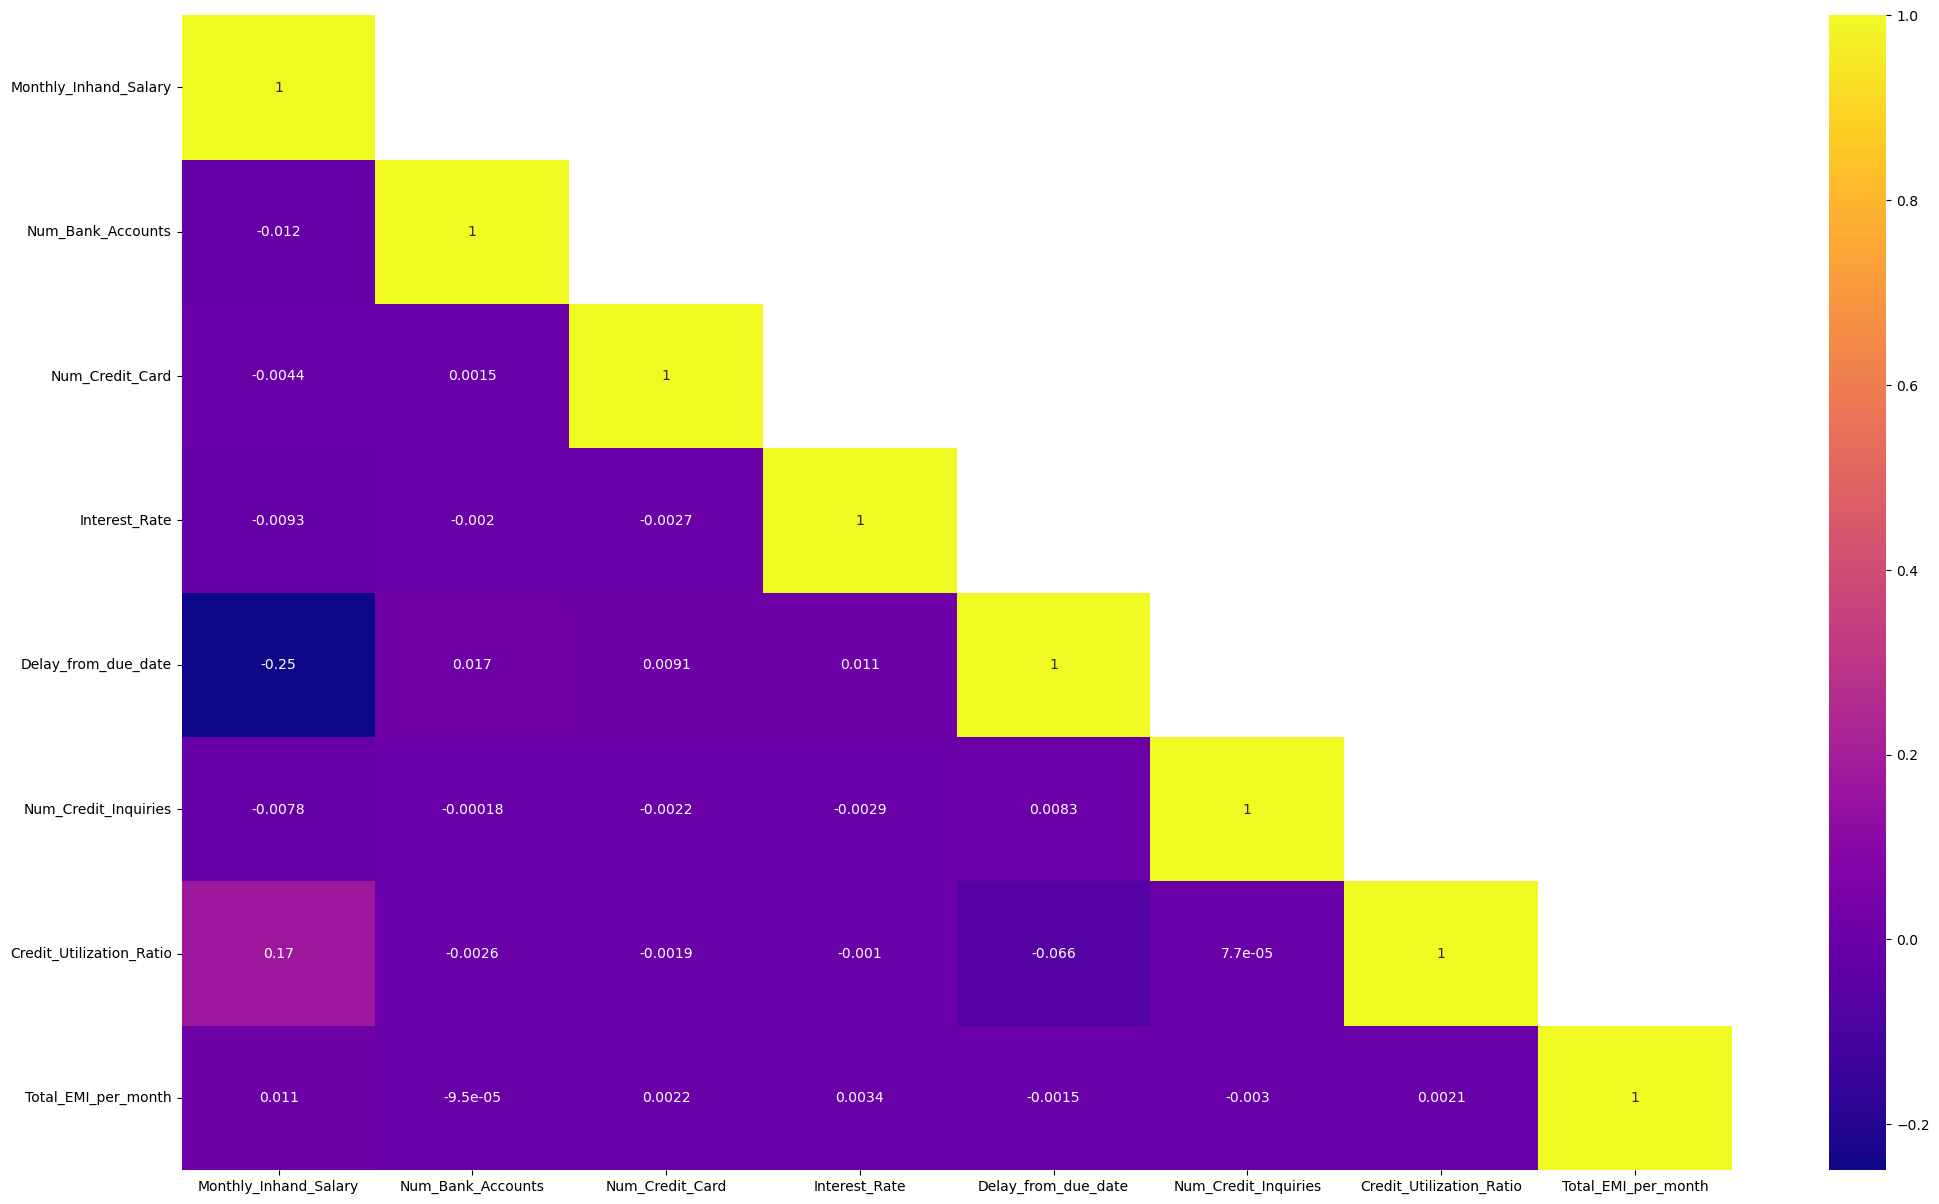

In [113]:
plt.figure(figsize=(25,15))
sns.heatmap(num_data.corr(), annot=True, cmap='plasma', mask=np.triu(num_data.corr(),+1))
plt.show()

### Inference -

tep 9: Separate your Train dataset and test data set if you combined them in the initial 
steps. (In this step only segregate train and test datasets based on the length of the train 
and test dataset)
Note: Your given test dataset is only for validating and submitting the results. Only 
Use the Train dataset to perform the train test split in the coming steps. Do not use Test to 
build the model and test the model, Since there is no target variable in the test data set you 
can not test the model performance with the test data set. Thus we only consider the 
training dataset and split that into X_train and X_test.

In [117]:
train_data = data[data['source']=='train']

In [118]:
train_data.drop('source',axis =1,inplace = True)

In [119]:
train_data

ID Customer_ID           Name  Age          SSN Occupation  \
0       0x1602   CUS_0xd40  Aaron Maashoh   23  821-00-0265  Scientist   
1       0x1603   CUS_0xd40  Aaron Maashoh   23  821-00-0265  Scientist   
2       0x1604   CUS_0xd40  Aaron Maashoh   23  821-00-0265  Scientist   
3       0x1605   CUS_0xd40  Aaron Maashoh   23  821-00-0265  Scientist   
4       0x1606   CUS_0xd40  Aaron Maashoh   23  821-00-0265  Scientist   
...        ...         ...            ...  ...          ...        ...   
99995  0x25fe9  CUS_0x942c          Nicks   25  078-73-5990   Mechanic   
99996  0x25fea  CUS_0x942c          Nicks   25  078-73-5990   Mechanic   
99997  0x25feb  CUS_0x942c          Nicks   25  078-73-5990   Mechanic   
99998  0x25fec  CUS_0x942c          Nicks   25  078-73-5990   Mechanic   
99999  0x25fed  CUS_0x942c          Nicks   25  078-73-5990   Mechanic   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0           19114.12            1824.843333                  3   
1           19114.12            1824.843333                  3   
2           19114.12            1824.843333                  3   
3           19114.12            1824.843333                  3   
4           19114.12            1824.843333                  3   
...              ...                    ...                ...   
99995       39628.99            3359.415833                  4   
99996       39628.99            3359.415833                  4   
99997       39628.99            3359.415833                  4   
99998       39628.99            3359.415833                  4   
99999       39628.99            3359.415833                  4   

       Num_Credit_Card  ...  Outstanding_Debt  Credit_Utilization_Ratio  \
0                    4  ...            809.98                 26.822620   
1                    4  ...            809.98                 31.944960   
2                    4  ...            809.98                 28.609352   
3                    4  ...            809.98                 31.377862   
4                    4  ...            809.98                 24.797347   
...                ...  ...               ...                       ...   
99995                6  ...            502.38                 34.663572   
99996                6  ...            502.38                 40.565631   
99997                6  ...            502.38                 41.255522   
99998                6  ...            502.38                 33.638208   
99999                6  ...            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                   22.1                     No            49.574949   
1                   22.5                     No            49.574949   
2                   22.3                     No            49.574949   
3                   22.4                     No            49.574949   
4                   22.5                     No            49.574949   
...                  ...                    ...                  ...   
99995               31.6                     No            35.104023   
99996               31.7                     No            35.104023   
99997               31.8                     No            35.104023   
99998               31.9                     No            35.104023   
99999               31.1                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995                60.971333   High_spent_Large_value_payments   
99996               

Step 11: Perform the Statistical analysis to prove where the independent variables have an 
effect on the Target variables.
 Example: Few statistical analyses:
1. Check whether the Annual income across all the target variables is significantly the 
same. Let's fix the alpha is 0.05. Make sure the data is normal. If not use a Non-parametric statistical test.
2. Check if there is an independence of the Occupation and Credit Score. The significant 
level is 0.05.
3. Check if there is a relationship between the Payment Behaviour and Credit Score.
4. Check Statistically that the Credit_Utilization_Ratio median values are significantly 
not different across the target variable classes. 

In [120]:
train_data.dtypes

ID                           object
Customer_ID                  object
Name                         object
Age                           int32
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment        int32
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
Month_Number                

In [122]:
num_data=train_data.select_dtypes(include=np.number)
cat_data=train_data.select_dtypes(include='object')

In [123]:
# Statstical test for numerical columns
from scipy import stats
from scipy.stats import shapiro

In [124]:
stats,p_value=stats.shapiro(num_data)
print('Test statistic:', stats)
print('P-Value:', p_value)

Test statistic: 0.009180665016174316
P-Value: 0.0


### inference -
From the above result, we can see that the p-value is less than 0.05 then reject null hypothesis, thus we can say that the data is not normally distributed.
#to check independency of variable we are using chi-square test for the independence

In [144]:
from scipy.stats import levene

In [176]:
stats,p_value=stats.levene(train_data['Annual_Income'])
print('Test statistic:', stats)
print('P-Value:', p_value)

AttributeError: 'float' object has no attribute 'levene'

In [125]:
from scipy.stats import f_oneway, kruskal

H0 - There is no significant difference between the medians of the groups
H1 - There is significant diffference between the median of the groups

In [129]:
cs_1 = train_data[train_data['Credit_Score'] == 'Good']['Annual_Income']
cs_2 = train_data[train_data['Credit_Score'] == 'Standard']['Annual_Income']
cs_3 = train_data[train_data['Credit_Score'] == 'Poor']['Annual_Income']

In [130]:
kw_statistic, p_value = kruskal(cs_1, 
                                cs_2, 
                                    cs_3)
print('Test statistic:', kw_statistic)
print('P-value:', p_value)

Test statistic: 4182.7389317802135
P-value: 0.0


### Inference -
As P value is less then 0.05 we will regect null hypothesis hence we can conclude there is significant 
difference between the medians of the groups

### Check if there is a relationship between the Payment Behaviour and Credit Score

In [128]:
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

#Ho-variable is independent
#H1-variable is not independent

In [131]:
table = pd.crosstab(train_data['Credit_Score'], train_data['Payment_Behaviour'])
observed_value = table.values
observed_value

array([[ 3562,  3882,  2205,  1947,  2620,  3612],
       [ 3321,  4981,  3234,  3052,  4392, 10018],
       [ 8396, 10554,  6411,  5819,  7521, 14473]], dtype=int64)

In [132]:
test_stats,p_value,dof,expected_value=chi2_contingency(observed=observed_value,correction=False)
print("Test statistic:", test_stats)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 1543.8471365646956
p-value: 0.0
Degrees of freedom: 10
Expected values: [[ 2723.94012  3461.66276  2112.618    1928.63304  2590.94324  5010.20284]
 [ 4430.60442  5630.54166  3436.263    3137.00364  4214.27934  8149.30794]
 [ 8124.45546 10324.79558  6301.119    5752.36332  7727.77742 14943.48922]]


### inference - 
As the p_value is < then 0.05 , reject null which means the varibles 'Payment_Behaviour' and target varible are not independent

4. Check Statistically that the Credit_Utilization_Ratio median values are significantly 
not different across the target variable classes.

In [133]:
cs_1 = train_data[train_data['Credit_Score'] == 'Good']['Credit_Utilization_Ratio']
cs_2 = train_data[train_data['Credit_Score'] == 'Standard']['Credit_Utilization_Ratio']
cs_3 = train_data[train_data['Credit_Score'] == 'Poor']['Credit_Utilization_Ratio']

In [134]:
cl1_median=np.median(cs_1)
cl2_median=np.median(cs_2)
cl3_medain=np.median(cs_3)

In [135]:
kw_statistic, p_value = kruskal(cl1_median, 
                                cl2_median, 
                                    cl3_medain)
print('Test statistic:', kw_statistic)
print('P-value:', p_value)

Test statistic: 2.0
P-value: 0.36787944117144245


### inference -
As the p value is greater then 0.05 fail to reject null hence we can say that Credit_Utilization_Ratio median values are significantly 
not different across the target variable classes.

Step 12: Encode the categorical variables with related technologies. Change the target 
variable classes as (poor to 0, Standard to 1, Good to 2).

In [121]:
train_data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ...,
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [122]:
train_data['Type_of_Loan'] = train_data['Type_of_Loan'] .str.replace('\D+','.')
train_data['Type_of_Loan']  = train_data['Type_of_Loan'] .str.rstrip('.')

In [123]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variables using label encoding
le = LabelEncoder()
train_data['Name'] = le.fit_transform(train_data['Name'])
train_data['SSN'] = le.fit_transform(train_data['SSN'])
train_data['Occupation'] = le.fit_transform(train_data['Occupation'])
train_data['Payment_Behaviour'] = le.fit_transform(train_data['Payment_Behaviour'])
train_data['Credit_Mix'] = le.fit_transform(train_data['Credit_Mix'])
train_data['Payment_of_Min_Amount'] = le.fit_transform(train_data['Payment_of_Min_Amount'])
train_data['Type_of_Loan'] = le.fit_transform(train_data['Type_of_Loan'])
# Change the target variable classes
train_data['Credit_Score'] = train_data['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

# Print the encoded and transformed dataset
train_data.head()

ID Customer_ID  Name  Age    SSN  Occupation  Annual_Income  \
0  0x1602   CUS_0xd40    84   23  10205          12       19114.12   
1  0x1603   CUS_0xd40    84   23  10205          12       19114.12   
2  0x1604   CUS_0xd40    84   23  10205          12       19114.12   
3  0x1605   CUS_0xd40    84   23  10205          12       19114.12   
4  0x1606   CUS_0xd40    84   23  10205          12       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  ...  \
0            1824.843333                  3                4  ...   
1            1824.843333                  3                4  ...   
2            1824.843333                  3                4  ...   
3            1824.843333                  3                4  ...   
4            1824.843333                  3                4  ...   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                 26.822620                22.1   
1            809.98                 31.944960                22.5   
2            809.98                 28.609352                22.3   
3            809.98                 31.377862                22.4   
4            809.98                 24.797347                22.5   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                      0            49.574949                80.415295   
1                      0            49.574949               118.280222   
2                      0            49.574949                81.699521   
3                      0            49.574949               199.458074   
4                      0            49.574949                41.420153   

   Payment_Behaviour  Monthly_Balance  Credit_Score  Month_Number  
0                  2       312.494089             2             1  
1                  3       284.629163             2             2  
2                  4       331.209863             2             3  
3                  5       223.451310             2             4  
4                  1       341.489231             2             5  

[5 rows x 28 columns]

In [124]:
train_data.dtypes

ID                           object
Customer_ID                  object
Name                          int32
Age                           int32
SSN                           int32
Occupation                    int32
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                  int32
Delay_from_due_date         float64
Num_of_Delayed_Payment        int32
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                  int64
Month_Number                

In [125]:
train_data.drop(['ID','Customer_ID'],axis=1,inplace=True)

In [126]:
train_data

Name  Age    SSN  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0        84   23  10205          12       19114.12            1824.843333   
1        84   23  10205          12       19114.12            1824.843333   
2        84   23  10205          12       19114.12            1824.843333   
3        84   23  10205          12       19114.12            1824.843333   
4        84   23  10205          12       19114.12            1824.843333   
...     ...  ...    ...         ...            ...                    ...   
99995  6528   25   1009           9       39628.99            3359.415833   
99996  6528   25   1009           9       39628.99            3359.415833   
99997  6528   25   1009           9       39628.99            3359.415833   
99998  6528   25   1009           9       39628.99            3359.415833   
99999  6528   25   1009           9       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  ...  \
0                      3                4              3            4  ...   
1                      3                4              3            4  ...   
2                      3                4              3            4  ...   
3                      3                4              3            4  ...   
4                      3                4              3            4  ...   
...                  ...              ...            ...          ...  ...   
99995                  4                6              7            2  ...   
99996                  4                6              7            2  ...   
99997                  4                6           5729            2  ...   
99998                  4                6              7            2  ...   
99999                  4                6              7            2  ...   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0                809.98                 26.822620                22.1   
1                809.98                 31.944960                22.5   
2                809.98                 28.609352                22.3   
3                809.98                 31.377862                22.4   
4                809.98                 24.797347                22.5   
...                 ...                       ...                 ...   
99995            502.38                 34.663572                31.6   
99996            502.38                 40.565631                31.7   
99997            502.38                 41.255522                31.8   
99998            502.38                 33.638208                31.9   
99999            502.38                 34.192463                31.1   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                          0            49.574949                80.415295   
1                          0            49.574949               118.280222   
2                          0            49.574949                81.699521   
3                          0            49.574949               199.458074   
4                          0            49.574949                41.420153   
...                      ...                  ...                      ...   
99995                      0            35.104023                60.971333   
99996                      0            35.104023                54.185950   
99997                      0            35.104023                24.028477   
99998                      0            35.104023               251.672582   
99999                      0            35.104023               167.163865   

       Payment_Behaviour  Monthly_Balance  Credit_Score  Month_Number  
0                      2       312.494089             2             1  
1                      3       284.629163             2             2  
2                      4       331.209863             2             3  
3                      5       223.451310  

In [ ]:
Step 13: Scale the numerical features (optional).

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
train['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [129]:
sc=StandardScaler()
train_n = ['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Utilization_Ratio',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in train_data[train_n]:
    train_data[i] = sc.fit_transform(train_data[[i]])
train_data.head()

Name  Age    SSN  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0    84   23  10205          12      -0.110031              -0.744599   
1    84   23  10205          12      -0.110031              -0.744599   
2    84   23  10205          12      -0.110031              -0.744599   
3    84   23  10205          12      -0.110031              -0.744599   
4    84   23  10205          12      -0.110031              -0.744599   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  ...  \
0                  3                4              3            4  ...   
1                  3                4              3            4  ...   
2                  3                4              3            4  ...   
3                  3                4              3            4  ...   
4                  3                4              3            4  ...   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0         -0.533485                 -1.067562            0.447408   
1         -0.533485                 -0.066489            0.495539   
2         -0.533485                 -0.718376            0.471474   
3         -0.533485                 -0.177318            0.483507   
4         -0.533485                 -1.463366            0.495539   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                      0             -0.16296                80.415295   
1                      0             -0.16296               118.280222   
2                      0             -0.16296                81.699521   
3                      0             -0.16296               199.458074   
4                      0             -0.16296                41.420153   

   Payment_Behaviour  Monthly_Balance  Credit_Score  Month_Number  
0                  2        -0.426057             2             1  
1                  3        -0.556423             2             2  
2                  4        -0.338496             2             3  
3                  5        -0.842643             2             4  
4                  1        -0.290404             2             5  

[5 rows x 26 columns]

In [130]:
df_train=train_data[[ 'Month_Number', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment','Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']]

In [131]:
float_cols = df_train.select_dtypes(include=['float'])

df_train[float_cols.columns] = abs(float_cols.round(2))

In [132]:
df_train

Month_Number  Name  Age    SSN  Occupation  Annual_Income  \
0                 1    84   23  10205          12           0.11   
1                 2    84   23  10205          12           0.11   
2                 3    84   23  10205          12           0.11   
3                 4    84   23  10205          12           0.11   
4                 5    84   23  10205          12           0.11   
...             ...   ...  ...    ...         ...            ...   
99995             4  6528   25   1009           9           0.10   
99996             5  6528   25   1009           9           0.10   
99997             6  6528   25   1009           9           0.10   
99998             7  6528   25   1009           9           0.10   
99999             8  6528   25   1009           9           0.10   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                       0.74                  3                4   
1                       0.74                  3                4   
2                       0.74                  3                4   
3                       0.74                  3                4   
4                       0.74                  3                4   
...                      ...                ...              ...   
99995                   0.26                  4                6   
99996                   0.26                  4                6   
99997                   0.26                  4                6   
99998                   0.26                  4                6   
99999                   0.26                  4                6   

       Interest_Rate  ...  Credit_Mix  Outstanding_Debt  \
0                  3  ...           2              0.53   
1                  3  ...           1              0.53   
2                  3  ...           1              0.53   
3                  3  ...           1              0.53   
4                  3  ...           1              0.53   
...              ...  ...         ...               ...   
99995              7  ...           2              0.80   
99996              7  ...           2              0.80   
99997           5729  ...           1              0.80   
99998              7  ...           1              0.80   
99999              7  ...           1              0.80   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                          1.07                0.45                      0   
1                          0.07                0.50                      0   
2                          0.72                0.47                      0   
3                          0.18                0.48                      0   
4                          1.46                0.50                      0   
...                         ...                 ...                    ...   
99995                      0.46                1.59                      0   
99996                      1.62                1.60                      0   
99997                      1.75                1.61                      0   
99998                      0.26                1.63                      0   
99999                      0.37                1.53                      0   

       Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0                     0.16                    80.42                  2   
1                     0.16                   118.28                  3   
2                     0.16                    81.70                  4   
3                     0.16                   199.46                  5   
4                     0.16                    41.42                  1   
...                    ...                      ...                ...   
99995                 0.16                    60.97                  0   
99996                 0.16                    54.19                  1   
99997                 0.16                    24.03          

Step 14: Use a train test split on the dataset called a train.

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x = df_train.drop('Credit_Score',axis = 1)
y = df_train['Credit_Score']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=100)

In [135]:
print('xtrain:',xtrain.shape)
print('xtest:',xtest.shape)
print('ytrain:',ytrain.shape)
print('ytest:',ytest.shape)

xtrain: (70000, 25)
xtest: (30000, 25)
ytrain: (70000,)
ytest: (30000,)


Step 15: Build the base model. Observe how the model is performing

In [136]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [137]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree = decision_tree_classification.fit(xtrain, ytrain)

In [138]:
ytest_pred=decision_tree.predict(xtest)
ytest_pred_prob=decision_tree.predict_proba(xtest)
print(classification_report(ytest,ytest_pred))
ytrain_pred=decision_tree.predict(xtrain)
ytrain_pred_prob=decision_tree.predict_proba(xtrain)
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      8750
           1       0.73      0.74      0.74     15909
           2       0.65      0.63      0.64      5341

    accuracy                           0.70     30000
   macro avg       0.69      0.68      0.68     30000
weighted avg       0.70      0.70      0.70     30000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20248
           1       1.00      1.00      1.00     37265
           2       1.00      1.00      1.00     12487

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000



### inference - 
The train data is getting overfit while test has accuracy 0.70

## Checking imbalancing of data

In [139]:
df_train.groupby('Credit_Score').count()

Month_Number   Name    Age    SSN  Occupation  Annual_Income  \
Credit_Score                                                                 
0                    28998  28998  28998  28998       28998          28998   
1                    53174  53174  53174  53174       53174          53174   
2                    17828  17828  17828  17828       17828          17828   

              Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
Credit_Score                                                              
0                             28998              28998            28998   
1                             53174              53174            53174   
2                             17828              17828            17828   

              Interest_Rate  ...  Num_Credit_Inquiries  Credit_Mix  \
Credit_Score                 ...                                     
0                     28998  ...                 28998       28998   
1                     53174  ...                 53174       53174   
2                     17828  ...                 17828       17828   

              Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
Credit_Score                                                                   
0                        28998                     28998               28998   
1                        53174                     53174               53174   
2                        17828                     17828               17828   

              Payment_of_Min_Amount  Total_EMI_per_month  \
Credit_Score                                               
0                             28998                28998   
1                             53174                53174   
2                             17828                17828   

              Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  
Credit_Score                                                               
0                               28998              28998            28998  
1                               53174              53174            53174  
2                               17828              17828            17828  

[3 rows x 25 columns]

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

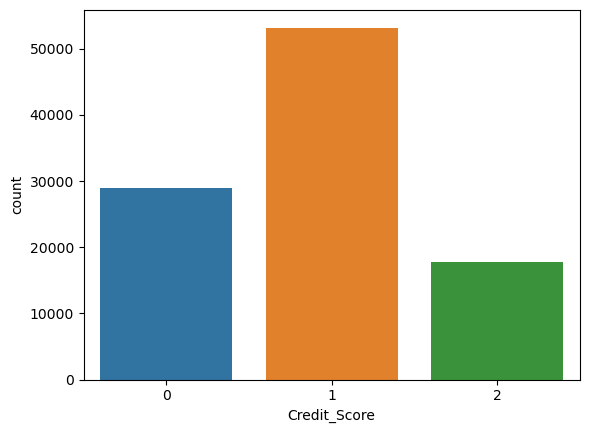

In [140]:
sns.countplot(df_train['Credit_Score'])

### inference -
data is imbalance hence we need to do SMOTE analysis to balance the data

Step 16: Build other models and choose the model which gives the best results.

In [141]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score,recall_score,f1_score

In [143]:
# create multiple models
models =  [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Neural Network', MLPClassifier()),
    ('SVM', SVC()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Light Gradient Boost', LGBMClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Linear Discriminant', LinearDiscriminantAnalysis()),
    ('Cat Boost',CatBoostClassifier())
]

# create empty dataframe to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

sm=SMOTE()
x=df_train.drop('Credit_Score',axis=1)
y=df_train['Credit_Score']
x_res,y_res=sm.fit_resample(x,y)
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.30,random_state=10)
for name, model in models:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred,average=None)
    recall = recall_score(ytest, y_pred,average=None)
    f1 = f1_score(ytest, y_pred,average=None)
    results_df = results_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)



Learning rate set to 0.100639
0:	learn: 1.0324848	total: 270ms	remaining: 4m 29s
1:	learn: 0.9804016	total: 317ms	remaining: 2m 38s
2:	learn: 0.9385332	total: 370ms	remaining: 2m 2s
3:	learn: 0.9034978	total: 421ms	remaining: 1m 44s
4:	learn: 0.8738383	total: 470ms	remaining: 1m 33s
5:	learn: 0.8494621	total: 521ms	remaining: 1m 26s
6:	learn: 0.8290427	total: 563ms	remaining: 1m 19s
7:	learn: 0.8113750	total: 610ms	remaining: 1m 15s
8:	learn: 0.7963125	total: 656ms	remaining: 1m 12s
9:	learn: 0.7835140	total: 703ms	remaining: 1m 9s
10:	learn: 0.7719320	total: 755ms	remaining: 1m 7s
11:	learn: 0.7618474	total: 797ms	remaining: 1m 5s
12:	learn: 0.7530223	total: 843ms	remaining: 1m 4s
13:	learn: 0.7451529	total: 883ms	remaining: 1m 2s
14:	learn: 0.7381175	total: 929ms	remaining: 1m
15:	learn: 0.7321567	total: 975ms	remaining: 60s
16:	learn: 0.7260326	total: 1.04s	remaining: 1m
17:	learn: 0.7205239	total: 1.09s	remaining: 59.3s
18:	learn: 0.7157157	total: 1.13s	remaining: 58.3s
19:	learn: 

163:	learn: 0.5833732	total: 7.25s	remaining: 37s
164:	learn: 0.5827018	total: 7.29s	remaining: 36.9s
165:	learn: 0.5820958	total: 7.33s	remaining: 36.8s
166:	learn: 0.5817628	total: 7.37s	remaining: 36.7s
167:	learn: 0.5813577	total: 7.4s	remaining: 36.7s
168:	learn: 0.5808413	total: 7.44s	remaining: 36.6s
169:	learn: 0.5802520	total: 7.48s	remaining: 36.5s
170:	learn: 0.5796922	total: 7.52s	remaining: 36.5s
171:	learn: 0.5790349	total: 7.56s	remaining: 36.4s
172:	learn: 0.5786648	total: 7.6s	remaining: 36.3s
173:	learn: 0.5783611	total: 7.63s	remaining: 36.2s
174:	learn: 0.5777078	total: 7.69s	remaining: 36.2s
175:	learn: 0.5775074	total: 7.73s	remaining: 36.2s
176:	learn: 0.5769908	total: 7.78s	remaining: 36.2s
177:	learn: 0.5762175	total: 7.83s	remaining: 36.2s
178:	learn: 0.5758781	total: 7.88s	remaining: 36.1s
179:	learn: 0.5753905	total: 7.92s	remaining: 36.1s
180:	learn: 0.5752373	total: 7.96s	remaining: 36s
181:	learn: 0.5743961	total: 8.01s	remaining: 36s
182:	learn: 0.573903

324:	learn: 0.5286965	total: 13.6s	remaining: 28.3s
325:	learn: 0.5285623	total: 13.7s	remaining: 28.3s
326:	learn: 0.5283588	total: 13.7s	remaining: 28.2s
327:	learn: 0.5280388	total: 13.8s	remaining: 28.2s
328:	learn: 0.5278632	total: 13.8s	remaining: 28.1s
329:	learn: 0.5273537	total: 13.8s	remaining: 28.1s
330:	learn: 0.5269982	total: 13.9s	remaining: 28s
331:	learn: 0.5268666	total: 13.9s	remaining: 28s
332:	learn: 0.5266783	total: 13.9s	remaining: 27.9s
333:	learn: 0.5264959	total: 14s	remaining: 27.9s
334:	learn: 0.5263299	total: 14s	remaining: 27.8s
335:	learn: 0.5261707	total: 14.1s	remaining: 27.8s
336:	learn: 0.5258444	total: 14.1s	remaining: 27.8s
337:	learn: 0.5257016	total: 14.1s	remaining: 27.7s
338:	learn: 0.5255106	total: 14.2s	remaining: 27.7s
339:	learn: 0.5252936	total: 14.2s	remaining: 27.6s
340:	learn: 0.5250286	total: 14.3s	remaining: 27.6s
341:	learn: 0.5247110	total: 14.3s	remaining: 27.5s
342:	learn: 0.5243839	total: 14.3s	remaining: 27.5s
343:	learn: 0.524041

487:	learn: 0.4938370	total: 19.9s	remaining: 20.9s
488:	learn: 0.4936298	total: 20s	remaining: 20.9s
489:	learn: 0.4934042	total: 20s	remaining: 20.8s
490:	learn: 0.4931646	total: 20.1s	remaining: 20.8s
491:	learn: 0.4930190	total: 20.1s	remaining: 20.8s
492:	learn: 0.4928659	total: 20.1s	remaining: 20.7s
493:	learn: 0.4925665	total: 20.2s	remaining: 20.7s
494:	learn: 0.4923477	total: 20.2s	remaining: 20.6s
495:	learn: 0.4922700	total: 20.3s	remaining: 20.6s
496:	learn: 0.4919876	total: 20.3s	remaining: 20.5s
497:	learn: 0.4918625	total: 20.3s	remaining: 20.5s
498:	learn: 0.4917362	total: 20.4s	remaining: 20.5s
499:	learn: 0.4913769	total: 20.4s	remaining: 20.4s
500:	learn: 0.4911794	total: 20.5s	remaining: 20.4s
501:	learn: 0.4909955	total: 20.5s	remaining: 20.3s
502:	learn: 0.4908718	total: 20.5s	remaining: 20.3s
503:	learn: 0.4905602	total: 20.6s	remaining: 20.3s
504:	learn: 0.4903696	total: 20.6s	remaining: 20.2s
505:	learn: 0.4901727	total: 20.7s	remaining: 20.2s
506:	learn: 0.49

650:	learn: 0.4664073	total: 26.2s	remaining: 14s
651:	learn: 0.4660412	total: 26.3s	remaining: 14s
652:	learn: 0.4658089	total: 26.3s	remaining: 14s
653:	learn: 0.4657062	total: 26.3s	remaining: 13.9s
654:	learn: 0.4655505	total: 26.4s	remaining: 13.9s
655:	learn: 0.4654760	total: 26.4s	remaining: 13.8s
656:	learn: 0.4654206	total: 26.4s	remaining: 13.8s
657:	learn: 0.4652686	total: 26.5s	remaining: 13.8s
658:	learn: 0.4651205	total: 26.5s	remaining: 13.7s
659:	learn: 0.4650757	total: 26.5s	remaining: 13.7s
660:	learn: 0.4648054	total: 26.6s	remaining: 13.6s
661:	learn: 0.4646724	total: 26.6s	remaining: 13.6s
662:	learn: 0.4645148	total: 26.7s	remaining: 13.6s
663:	learn: 0.4643712	total: 26.7s	remaining: 13.5s
664:	learn: 0.4641582	total: 26.7s	remaining: 13.5s
665:	learn: 0.4640725	total: 26.8s	remaining: 13.4s
666:	learn: 0.4639742	total: 26.8s	remaining: 13.4s
667:	learn: 0.4639391	total: 26.8s	remaining: 13.3s
668:	learn: 0.4638246	total: 26.9s	remaining: 13.3s
669:	learn: 0.4636

812:	learn: 0.4433627	total: 32.5s	remaining: 7.48s
813:	learn: 0.4432995	total: 32.6s	remaining: 7.44s
814:	learn: 0.4431820	total: 32.6s	remaining: 7.4s
815:	learn: 0.4430673	total: 32.6s	remaining: 7.36s
816:	learn: 0.4428634	total: 32.7s	remaining: 7.32s
817:	learn: 0.4427490	total: 32.7s	remaining: 7.28s
818:	learn: 0.4425582	total: 32.7s	remaining: 7.24s
819:	learn: 0.4424295	total: 32.8s	remaining: 7.19s
820:	learn: 0.4422270	total: 32.8s	remaining: 7.15s
821:	learn: 0.4421721	total: 32.8s	remaining: 7.11s
822:	learn: 0.4420434	total: 32.9s	remaining: 7.07s
823:	learn: 0.4418369	total: 32.9s	remaining: 7.03s
824:	learn: 0.4417277	total: 33s	remaining: 6.99s
825:	learn: 0.4415173	total: 33s	remaining: 6.95s
826:	learn: 0.4413783	total: 33s	remaining: 6.91s
827:	learn: 0.4412076	total: 33.1s	remaining: 6.87s
828:	learn: 0.4411313	total: 33.1s	remaining: 6.83s
829:	learn: 0.4410037	total: 33.2s	remaining: 6.79s
830:	learn: 0.4408216	total: 33.2s	remaining: 6.75s
831:	learn: 0.44059

973:	learn: 0.4229972	total: 38.8s	remaining: 1.04s
974:	learn: 0.4229163	total: 38.9s	remaining: 996ms
975:	learn: 0.4227849	total: 38.9s	remaining: 956ms
976:	learn: 0.4226824	total: 38.9s	remaining: 917ms
977:	learn: 0.4226418	total: 39s	remaining: 877ms
978:	learn: 0.4225744	total: 39s	remaining: 837ms
979:	learn: 0.4225277	total: 39s	remaining: 797ms
980:	learn: 0.4224087	total: 39.1s	remaining: 757ms
981:	learn: 0.4222201	total: 39.1s	remaining: 717ms
982:	learn: 0.4221208	total: 39.1s	remaining: 677ms
983:	learn: 0.4220943	total: 39.2s	remaining: 637ms
984:	learn: 0.4220119	total: 39.2s	remaining: 597ms
985:	learn: 0.4218588	total: 39.3s	remaining: 557ms
986:	learn: 0.4216802	total: 39.3s	remaining: 518ms
987:	learn: 0.4215617	total: 39.3s	remaining: 478ms
988:	learn: 0.4214960	total: 39.4s	remaining: 438ms
989:	learn: 0.4214454	total: 39.4s	remaining: 398ms
990:	learn: 0.4214008	total: 39.4s	remaining: 358ms
991:	learn: 0.4213358	total: 39.5s	remaining: 318ms
992:	learn: 0.4212

In [144]:
results_df.sort_values(by='Accuracy',ascending=False)

Model  Accuracy  \
2          Random Forest  0.862591   
10             Cat Boost  0.813298   
7   Light Gradient Boost  0.785904   
1          Decision Tree  0.778674   
3                    KNN  0.752784   
6               AdaBoost  0.712184   
9    Linear Discriminant  0.631903   
8            Naive Bayes  0.607581   
4         Neural Network  0.515912   
0    Logistic Regression  0.384771   
5                    SVM  0.377646   

                                            Precision  \
2   [0.8674866698982064, 0.857023294741247, 0.8625...   
10  [0.8404510401140561, 0.7785620915032679, 0.819...   
7   [0.81526948073262, 0.7568868681465633, 0.78514...   
1   [0.7873752092763688, 0.723337119777862, 0.8250...   
3   [0.7342668685121108, 0.735951811205545, 0.7844...   
6   [0.7639880102769055, 0.6691949434464405, 0.707...   
9   [0.7442407146215326, 0.5678131083711876, 0.618...   
8   [0.5845164363982849, 0.599414669837205, 0.6322...   
4   [0.4420931961829223, 0.5527638190954773, 0.671...   
0   [0.3911224624598177, 0.32931577971444465, 0.39...   
5   [0.3648540690242863, 0.35026567481402765, 0.48...   

                                               Recall  \
2   [0.889033780427223, 0.7665626949469744, 0.9334...   
10  [0.805327868852459, 0.7431066749844042, 0.8930...   
7   [0.7711748633879781, 0.7061759201497193, 0.882...   
1   [0.7884997516145057, 0.7150343106674985, 0.833...   
3   [0.8433308494783904, 0.556394260761073, 0.8602...   
6   [0.6647416790859414, 0.6274485339987523, 0.847...   
9   [0.49149279682066566, 0.4912663755458515, 0.91...   
8   [0.7618604073522106, 0.20442919525888958, 0.86...   
4   [0.8860531544957775, 0.01372426699937617, 0.64...   
0   [0.5515399900645802, 0.1107922645040549, 0.493...   
5   [0.8507824143070045, 0.10280723643169058, 0.17...   

                                                   F1  
2   [0.8781280667320903, 0.80927291886196, 0.89657...  
10  [0.822514666243856, 0.760421321417172, 0.85488...  
7   [0.7926093754986119, 0.7306525527657652, 0.830...  
1   [0.7879370792094567, 0.7191617517881792, 0.829...  
3   [0.7850289017341041, 0.6336992433123735, 0.820...  
6   [0.7109177845663436, 0.6476497102382486, 0.771...  
9   [0.5920191480608847, 0.5267734706846383, 0.739...  
8   [0.6615085997735483, 0.3048797506628832, 0.728...  
4   [0.5898718478710211, 0.02678354029705381, 0.66...  
0   [0.4576817045835158, 0.16580310880829016, 0.43...  
5   [0.5106977784404353, 0.15895828309621415, 0.25...

### Inference - 
After building several mobel and comparing it accuracy,precision and recall we can conclude that 
Random Forest is giving hisghest accuracy

Step 17: Perform Feature selection using different feature selection methods.

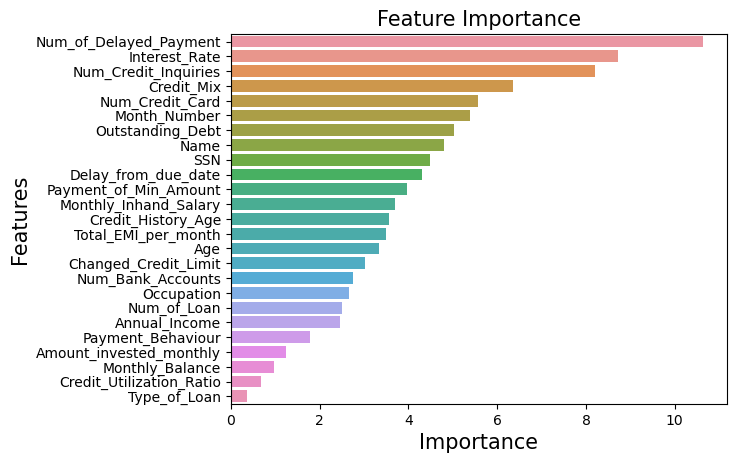

In [145]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [146]:
xtrain.columns

Index(['Month_Number', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

### Inference - 
variables like 'Outstanding_Debt','Num_of_Delayed_Payment','Num_Credit_Inquiries','Interest_Rate','Credit_Mix'
'Delay_from_due_date','Month_Number','Changed_Credit_Limit','Name','Num_Credit_Card' are consider as import features
then we have builded a model this best features

Step 19: Tune the final model using Grid search CV or Randomized CV or any other 
methods.

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [148]:
# Create a Random Forest classifier object
rf = RandomForestClassifier()

# Define the parameter grid over which to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to your data
grid_search.fit(xtrain, ytrain)

# Print the best parameters and corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8509201629875072


Step 20: Perform Cross-validation for the final model by setting the best parameters

In [153]:
from sklearn.model_selection import cross_val_score

# Create a new RandomForestClassifier object with the best hyperparameters
rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1)
rf_model=rf.fit(xtrain,ytrain)
ytrain_pred=rf_model.predict(xtrain)
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37070
           1       1.00      1.00      1.00     37144
           2       1.00      1.00      1.00     37451

    accuracy                           1.00    111665
   macro avg       1.00      1.00      1.00    111665
weighted avg       1.00      1.00      1.00    111665



In [154]:
ytest_pred=rf_model.predict(xtest)
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     16104
           1       0.86      0.77      0.81     16030
           2       0.86      0.94      0.90     15723

    accuracy                           0.86     47857
   macro avg       0.86      0.86      0.86     47857
weighted avg       0.86      0.86      0.86     47857



In [155]:
cb=CatBoostClassifier()
cb_model=cb.fit(xtrain,ytrain)
cb_train_pred=cb_model.predict(xtrain)
print(classification_report(ytrain,cb_train_pred))
cb_test_pred=cb_model.predict(xtest)
print(classification_report(ytest,cb_test_pred))

Learning rate set to 0.100639
0:	learn: 1.0324848	total: 55.6ms	remaining: 55.6s
1:	learn: 0.9804016	total: 95.1ms	remaining: 47.5s
2:	learn: 0.9385332	total: 140ms	remaining: 46.6s
3:	learn: 0.9034978	total: 187ms	remaining: 46.6s
4:	learn: 0.8738383	total: 240ms	remaining: 47.8s
5:	learn: 0.8494621	total: 292ms	remaining: 48.4s
6:	learn: 0.8290427	total: 332ms	remaining: 47s
7:	learn: 0.8113750	total: 386ms	remaining: 47.8s
8:	learn: 0.7963125	total: 437ms	remaining: 48.2s
9:	learn: 0.7835140	total: 485ms	remaining: 48s
10:	learn: 0.7719320	total: 530ms	remaining: 47.6s
11:	learn: 0.7618474	total: 573ms	remaining: 47.2s
12:	learn: 0.7530223	total: 638ms	remaining: 48.4s
13:	learn: 0.7451529	total: 697ms	remaining: 49.1s
14:	learn: 0.7381175	total: 747ms	remaining: 49s
15:	learn: 0.7321567	total: 799ms	remaining: 49.2s
16:	learn: 0.7260326	total: 856ms	remaining: 49.5s
17:	learn: 0.7205239	total: 901ms	remaining: 49.2s
18:	learn: 0.7157157	total: 951ms	remaining: 49.1s
19:	learn: 0.71

166:	learn: 0.5817628	total: 6.93s	remaining: 34.6s
167:	learn: 0.5813577	total: 6.97s	remaining: 34.5s
168:	learn: 0.5808413	total: 7.01s	remaining: 34.5s
169:	learn: 0.5802520	total: 7.04s	remaining: 34.4s
170:	learn: 0.5796922	total: 7.08s	remaining: 34.3s
171:	learn: 0.5790349	total: 7.12s	remaining: 34.3s
172:	learn: 0.5786648	total: 7.17s	remaining: 34.3s
173:	learn: 0.5783611	total: 7.2s	remaining: 34.2s
174:	learn: 0.5777078	total: 7.25s	remaining: 34.2s
175:	learn: 0.5775074	total: 7.28s	remaining: 34.1s
176:	learn: 0.5769908	total: 7.32s	remaining: 34s
177:	learn: 0.5762175	total: 7.37s	remaining: 34s
178:	learn: 0.5758781	total: 7.42s	remaining: 34s
179:	learn: 0.5753905	total: 7.45s	remaining: 33.9s
180:	learn: 0.5752373	total: 7.49s	remaining: 33.9s
181:	learn: 0.5743961	total: 7.53s	remaining: 33.8s
182:	learn: 0.5739035	total: 7.57s	remaining: 33.8s
183:	learn: 0.5735181	total: 7.6s	remaining: 33.7s
184:	learn: 0.5731282	total: 7.64s	remaining: 33.7s
185:	learn: 0.572841

327:	learn: 0.5280388	total: 13.2s	remaining: 27s
328:	learn: 0.5278632	total: 13.2s	remaining: 26.9s
329:	learn: 0.5273537	total: 13.2s	remaining: 26.9s
330:	learn: 0.5269982	total: 13.3s	remaining: 26.9s
331:	learn: 0.5268666	total: 13.3s	remaining: 26.8s
332:	learn: 0.5266783	total: 13.4s	remaining: 26.7s
333:	learn: 0.5264959	total: 13.4s	remaining: 26.7s
334:	learn: 0.5263299	total: 13.4s	remaining: 26.7s
335:	learn: 0.5261707	total: 13.5s	remaining: 26.7s
336:	learn: 0.5258444	total: 13.5s	remaining: 26.6s
337:	learn: 0.5257016	total: 13.6s	remaining: 26.6s
338:	learn: 0.5255106	total: 13.6s	remaining: 26.5s
339:	learn: 0.5252936	total: 13.6s	remaining: 26.5s
340:	learn: 0.5250286	total: 13.7s	remaining: 26.4s
341:	learn: 0.5247110	total: 13.7s	remaining: 26.4s
342:	learn: 0.5243839	total: 13.8s	remaining: 26.3s
343:	learn: 0.5240414	total: 13.8s	remaining: 26.3s
344:	learn: 0.5238177	total: 13.8s	remaining: 26.2s
345:	learn: 0.5236341	total: 13.9s	remaining: 26.2s
346:	learn: 0.

487:	learn: 0.4938370	total: 19.4s	remaining: 20.3s
488:	learn: 0.4936298	total: 19.4s	remaining: 20.3s
489:	learn: 0.4934042	total: 19.5s	remaining: 20.2s
490:	learn: 0.4931646	total: 19.5s	remaining: 20.2s
491:	learn: 0.4930190	total: 19.5s	remaining: 20.2s
492:	learn: 0.4928659	total: 19.6s	remaining: 20.1s
493:	learn: 0.4925665	total: 19.6s	remaining: 20.1s
494:	learn: 0.4923477	total: 19.7s	remaining: 20.1s
495:	learn: 0.4922700	total: 19.7s	remaining: 20s
496:	learn: 0.4919876	total: 19.8s	remaining: 20s
497:	learn: 0.4918625	total: 19.8s	remaining: 20s
498:	learn: 0.4917362	total: 19.9s	remaining: 20s
499:	learn: 0.4913769	total: 19.9s	remaining: 19.9s
500:	learn: 0.4911794	total: 20s	remaining: 19.9s
501:	learn: 0.4909955	total: 20.1s	remaining: 19.9s
502:	learn: 0.4908718	total: 20.1s	remaining: 19.9s
503:	learn: 0.4905602	total: 20.2s	remaining: 19.9s
504:	learn: 0.4903696	total: 20.2s	remaining: 19.8s
505:	learn: 0.4901727	total: 20.3s	remaining: 19.8s
506:	learn: 0.4900182	

646:	learn: 0.4668559	total: 26.3s	remaining: 14.3s
647:	learn: 0.4667849	total: 26.3s	remaining: 14.3s
648:	learn: 0.4666002	total: 26.3s	remaining: 14.2s
649:	learn: 0.4665036	total: 26.4s	remaining: 14.2s
650:	learn: 0.4664073	total: 26.4s	remaining: 14.2s
651:	learn: 0.4660412	total: 26.5s	remaining: 14.1s
652:	learn: 0.4658089	total: 26.5s	remaining: 14.1s
653:	learn: 0.4657062	total: 26.6s	remaining: 14.1s
654:	learn: 0.4655505	total: 26.6s	remaining: 14s
655:	learn: 0.4654760	total: 26.6s	remaining: 14s
656:	learn: 0.4654206	total: 26.7s	remaining: 13.9s
657:	learn: 0.4652686	total: 26.7s	remaining: 13.9s
658:	learn: 0.4651205	total: 26.8s	remaining: 13.9s
659:	learn: 0.4650757	total: 26.8s	remaining: 13.8s
660:	learn: 0.4648054	total: 26.9s	remaining: 13.8s
661:	learn: 0.4646724	total: 26.9s	remaining: 13.7s
662:	learn: 0.4645148	total: 27s	remaining: 13.7s
663:	learn: 0.4643712	total: 27s	remaining: 13.7s
664:	learn: 0.4641582	total: 27s	remaining: 13.6s
665:	learn: 0.4640725	

809:	learn: 0.4437501	total: 32.9s	remaining: 7.71s
810:	learn: 0.4436828	total: 32.9s	remaining: 7.67s
811:	learn: 0.4435312	total: 33s	remaining: 7.63s
812:	learn: 0.4433627	total: 33s	remaining: 7.59s
813:	learn: 0.4432995	total: 33s	remaining: 7.55s
814:	learn: 0.4431820	total: 33.1s	remaining: 7.51s
815:	learn: 0.4430673	total: 33.1s	remaining: 7.47s
816:	learn: 0.4428634	total: 33.2s	remaining: 7.43s
817:	learn: 0.4427490	total: 33.2s	remaining: 7.38s
818:	learn: 0.4425582	total: 33.2s	remaining: 7.34s
819:	learn: 0.4424295	total: 33.3s	remaining: 7.3s
820:	learn: 0.4422270	total: 33.3s	remaining: 7.26s
821:	learn: 0.4421721	total: 33.3s	remaining: 7.22s
822:	learn: 0.4420434	total: 33.4s	remaining: 7.18s
823:	learn: 0.4418369	total: 33.4s	remaining: 7.14s
824:	learn: 0.4417277	total: 33.5s	remaining: 7.1s
825:	learn: 0.4415173	total: 33.5s	remaining: 7.06s
826:	learn: 0.4413783	total: 33.5s	remaining: 7.02s
827:	learn: 0.4412076	total: 33.6s	remaining: 6.98s
828:	learn: 0.441131

972:	learn: 0.4230929	total: 39.2s	remaining: 1.09s
973:	learn: 0.4229972	total: 39.2s	remaining: 1.05s
974:	learn: 0.4229163	total: 39.2s	remaining: 1.01s
975:	learn: 0.4227849	total: 39.3s	remaining: 966ms
976:	learn: 0.4226824	total: 39.3s	remaining: 926ms
977:	learn: 0.4226418	total: 39.4s	remaining: 885ms
978:	learn: 0.4225744	total: 39.4s	remaining: 845ms
979:	learn: 0.4225277	total: 39.4s	remaining: 805ms
980:	learn: 0.4224087	total: 39.5s	remaining: 764ms
981:	learn: 0.4222201	total: 39.5s	remaining: 724ms
982:	learn: 0.4221208	total: 39.5s	remaining: 684ms
983:	learn: 0.4220943	total: 39.6s	remaining: 644ms
984:	learn: 0.4220119	total: 39.6s	remaining: 603ms
985:	learn: 0.4218588	total: 39.7s	remaining: 563ms
986:	learn: 0.4216802	total: 39.7s	remaining: 523ms
987:	learn: 0.4215617	total: 39.7s	remaining: 483ms
988:	learn: 0.4214960	total: 39.8s	remaining: 442ms
989:	learn: 0.4214454	total: 39.8s	remaining: 402ms
990:	learn: 0.4214008	total: 39.8s	remaining: 362ms
991:	learn: 

In [156]:
parameter={'depth':[6,8,9],'learning_rate':[0.01,0.05,0.10],'iterations':[300,500]}
grid=GridSearchCV(estimator=cb_model,param_grid=parameter,cv=3)
grid.fit(xtrain,ytrain)
print("The best parameters across All searched params:/n",grid.best_params_)

0:	learn: 1.0917670	total: 33ms	remaining: 9.88s
1:	learn: 1.0850198	total: 64.1ms	remaining: 9.56s
2:	learn: 1.0783798	total: 93.9ms	remaining: 9.3s
3:	learn: 1.0719009	total: 125ms	remaining: 9.25s
4:	learn: 1.0655535	total: 155ms	remaining: 9.15s
5:	learn: 1.0594216	total: 187ms	remaining: 9.14s
6:	learn: 1.0534571	total: 218ms	remaining: 9.13s
7:	learn: 1.0476338	total: 255ms	remaining: 9.31s
8:	learn: 1.0418962	total: 288ms	remaining: 9.31s
9:	learn: 1.0362952	total: 317ms	remaining: 9.19s
10:	learn: 1.0308022	total: 349ms	remaining: 9.17s
11:	learn: 1.0253690	total: 381ms	remaining: 9.15s
12:	learn: 1.0200714	total: 415ms	remaining: 9.16s
13:	learn: 1.0149490	total: 445ms	remaining: 9.1s
14:	learn: 1.0098939	total: 484ms	remaining: 9.2s
15:	learn: 1.0049753	total: 518ms	remaining: 9.2s
16:	learn: 1.0000618	total: 554ms	remaining: 9.22s
17:	learn: 0.9952372	total: 594ms	remaining: 9.3s
18:	learn: 0.9905088	total: 636ms	remaining: 9.4s
19:	learn: 0.9859984	total: 693ms	remaining: 9

162:	learn: 0.7343469	total: 6.13s	remaining: 5.15s
163:	learn: 0.7336663	total: 6.16s	remaining: 5.11s
164:	learn: 0.7330356	total: 6.19s	remaining: 5.06s
165:	learn: 0.7324712	total: 6.22s	remaining: 5.02s
166:	learn: 0.7318737	total: 6.26s	remaining: 4.99s
167:	learn: 0.7312573	total: 6.3s	remaining: 4.95s
168:	learn: 0.7306764	total: 6.35s	remaining: 4.92s
169:	learn: 0.7301068	total: 6.39s	remaining: 4.88s
170:	learn: 0.7295947	total: 6.42s	remaining: 4.85s
171:	learn: 0.7289911	total: 6.46s	remaining: 4.8s
172:	learn: 0.7283693	total: 6.5s	remaining: 4.77s
173:	learn: 0.7278262	total: 6.54s	remaining: 4.74s
174:	learn: 0.7273156	total: 6.58s	remaining: 4.7s
175:	learn: 0.7267584	total: 6.62s	remaining: 4.66s
176:	learn: 0.7262535	total: 6.66s	remaining: 4.63s
177:	learn: 0.7257251	total: 6.7s	remaining: 4.59s
178:	learn: 0.7252198	total: 6.74s	remaining: 4.55s
179:	learn: 0.7247129	total: 6.77s	remaining: 4.51s
180:	learn: 0.7241813	total: 6.82s	remaining: 4.48s
181:	learn: 0.723

26:	learn: 0.9571230	total: 1.3s	remaining: 13.1s
27:	learn: 0.9532104	total: 1.34s	remaining: 13s
28:	learn: 0.9493299	total: 1.38s	remaining: 12.9s
29:	learn: 0.9455666	total: 1.41s	remaining: 12.7s
30:	learn: 0.9418349	total: 1.45s	remaining: 12.6s
31:	learn: 0.9381841	total: 1.49s	remaining: 12.5s
32:	learn: 0.9345781	total: 1.54s	remaining: 12.4s
33:	learn: 0.9310967	total: 1.57s	remaining: 12.3s
34:	learn: 0.9276901	total: 1.61s	remaining: 12.2s
35:	learn: 0.9242408	total: 1.65s	remaining: 12.1s
36:	learn: 0.9209044	total: 1.69s	remaining: 12s
37:	learn: 0.9176624	total: 1.74s	remaining: 12s
38:	learn: 0.9144911	total: 1.8s	remaining: 12s
39:	learn: 0.9113593	total: 1.86s	remaining: 12.1s
40:	learn: 0.9082370	total: 1.92s	remaining: 12.1s
41:	learn: 0.9051627	total: 1.97s	remaining: 12.1s
42:	learn: 0.9021651	total: 2.02s	remaining: 12.1s
43:	learn: 0.8993836	total: 2.06s	remaining: 12s
44:	learn: 0.8964996	total: 2.1s	remaining: 11.9s
45:	learn: 0.8936504	total: 2.13s	remaining:

191:	learn: 0.7203895	total: 7.03s	remaining: 3.95s
192:	learn: 0.7198985	total: 7.06s	remaining: 3.91s
193:	learn: 0.7194396	total: 7.09s	remaining: 3.87s
194:	learn: 0.7189541	total: 7.12s	remaining: 3.83s
195:	learn: 0.7184761	total: 7.15s	remaining: 3.79s
196:	learn: 0.7180331	total: 7.18s	remaining: 3.75s
197:	learn: 0.7175833	total: 7.21s	remaining: 3.71s
198:	learn: 0.7170935	total: 7.25s	remaining: 3.68s
199:	learn: 0.7166278	total: 7.28s	remaining: 3.64s
200:	learn: 0.7161922	total: 7.31s	remaining: 3.6s
201:	learn: 0.7157789	total: 7.35s	remaining: 3.56s
202:	learn: 0.7153786	total: 7.38s	remaining: 3.53s
203:	learn: 0.7149238	total: 7.42s	remaining: 3.49s
204:	learn: 0.7144852	total: 7.45s	remaining: 3.45s
205:	learn: 0.7140094	total: 7.49s	remaining: 3.42s
206:	learn: 0.7135420	total: 7.53s	remaining: 3.38s
207:	learn: 0.7131561	total: 7.57s	remaining: 3.35s
208:	learn: 0.7127298	total: 7.6s	remaining: 3.31s
209:	learn: 0.7123296	total: 7.63s	remaining: 3.27s
210:	learn: 0.

51:	learn: 0.8764927	total: 1.89s	remaining: 9.03s
52:	learn: 0.8738814	total: 1.93s	remaining: 8.98s
53:	learn: 0.8713647	total: 1.96s	remaining: 8.92s
54:	learn: 0.8689071	total: 1.98s	remaining: 8.84s
55:	learn: 0.8665245	total: 2.02s	remaining: 8.79s
56:	learn: 0.8641026	total: 2.05s	remaining: 8.76s
57:	learn: 0.8617744	total: 2.08s	remaining: 8.7s
58:	learn: 0.8595055	total: 2.13s	remaining: 8.68s
59:	learn: 0.8572234	total: 2.16s	remaining: 8.64s
60:	learn: 0.8549421	total: 2.19s	remaining: 8.6s
61:	learn: 0.8527174	total: 2.23s	remaining: 8.55s
62:	learn: 0.8505510	total: 2.26s	remaining: 8.51s
63:	learn: 0.8483933	total: 2.3s	remaining: 8.47s
64:	learn: 0.8462377	total: 2.33s	remaining: 8.44s
65:	learn: 0.8441330	total: 2.37s	remaining: 8.41s
66:	learn: 0.8421150	total: 2.4s	remaining: 8.36s
67:	learn: 0.8402133	total: 2.44s	remaining: 8.33s
68:	learn: 0.8382164	total: 2.47s	remaining: 8.28s
69:	learn: 0.8363267	total: 2.5s	remaining: 8.23s
70:	learn: 0.8344210	total: 2.54s	re

216:	learn: 0.7078053	total: 7.56s	remaining: 2.89s
217:	learn: 0.7074396	total: 7.6s	remaining: 2.86s
218:	learn: 0.7070583	total: 7.66s	remaining: 2.83s
219:	learn: 0.7067434	total: 7.69s	remaining: 2.8s
220:	learn: 0.7063888	total: 7.73s	remaining: 2.76s
221:	learn: 0.7060392	total: 7.76s	remaining: 2.73s
222:	learn: 0.7056912	total: 7.79s	remaining: 2.69s
223:	learn: 0.7053614	total: 7.82s	remaining: 2.65s
224:	learn: 0.7049771	total: 7.85s	remaining: 2.62s
225:	learn: 0.7045887	total: 7.88s	remaining: 2.58s
226:	learn: 0.7042489	total: 7.91s	remaining: 2.54s
227:	learn: 0.7038947	total: 7.94s	remaining: 2.51s
228:	learn: 0.7035608	total: 7.97s	remaining: 2.47s
229:	learn: 0.7032395	total: 8s	remaining: 2.44s
230:	learn: 0.7029070	total: 8.04s	remaining: 2.4s
231:	learn: 0.7025904	total: 8.07s	remaining: 2.37s
232:	learn: 0.7022545	total: 8.11s	remaining: 2.33s
233:	learn: 0.7019471	total: 8.14s	remaining: 2.3s
234:	learn: 0.7015750	total: 8.18s	remaining: 2.26s
235:	learn: 0.70121

80:	learn: 0.6656483	total: 2.98s	remaining: 8.06s
81:	learn: 0.6647929	total: 3.02s	remaining: 8.03s
82:	learn: 0.6640916	total: 3.05s	remaining: 7.99s
83:	learn: 0.6634459	total: 3.09s	remaining: 7.95s
84:	learn: 0.6628234	total: 3.12s	remaining: 7.9s
85:	learn: 0.6623159	total: 3.15s	remaining: 7.85s
86:	learn: 0.6618628	total: 3.18s	remaining: 7.8s
87:	learn: 0.6611556	total: 3.22s	remaining: 7.77s
88:	learn: 0.6604533	total: 3.26s	remaining: 7.73s
89:	learn: 0.6600185	total: 3.29s	remaining: 7.68s
90:	learn: 0.6596518	total: 3.32s	remaining: 7.63s
91:	learn: 0.6592230	total: 3.35s	remaining: 7.58s
92:	learn: 0.6589249	total: 3.38s	remaining: 7.52s
93:	learn: 0.6585874	total: 3.4s	remaining: 7.46s
94:	learn: 0.6581952	total: 3.44s	remaining: 7.42s
95:	learn: 0.6579266	total: 3.47s	remaining: 7.38s
96:	learn: 0.6572211	total: 3.51s	remaining: 7.34s
97:	learn: 0.6566048	total: 3.54s	remaining: 7.3s
98:	learn: 0.6558885	total: 3.58s	remaining: 7.26s
99:	learn: 0.6555264	total: 3.61s	r

241:	learn: 0.6062386	total: 8.07s	remaining: 1.93s
242:	learn: 0.6058684	total: 8.11s	remaining: 1.9s
243:	learn: 0.6056307	total: 8.13s	remaining: 1.87s
244:	learn: 0.6051011	total: 8.16s	remaining: 1.83s
245:	learn: 0.6047799	total: 8.19s	remaining: 1.8s
246:	learn: 0.6044085	total: 8.22s	remaining: 1.76s
247:	learn: 0.6039407	total: 8.25s	remaining: 1.73s
248:	learn: 0.6037182	total: 8.29s	remaining: 1.7s
249:	learn: 0.6033826	total: 8.32s	remaining: 1.66s
250:	learn: 0.6031211	total: 8.35s	remaining: 1.63s
251:	learn: 0.6027396	total: 8.38s	remaining: 1.6s
252:	learn: 0.6025329	total: 8.42s	remaining: 1.56s
253:	learn: 0.6019120	total: 8.46s	remaining: 1.53s
254:	learn: 0.6014367	total: 8.49s	remaining: 1.5s
255:	learn: 0.6008660	total: 8.53s	remaining: 1.47s
256:	learn: 0.6004933	total: 8.56s	remaining: 1.43s
257:	learn: 0.6003699	total: 8.59s	remaining: 1.4s
258:	learn: 0.6001245	total: 8.62s	remaining: 1.36s
259:	learn: 0.5998721	total: 8.65s	remaining: 1.33s
260:	learn: 0.5995

102:	learn: 0.6562136	total: 3.41s	remaining: 6.52s
103:	learn: 0.6557151	total: 3.44s	remaining: 6.48s
104:	learn: 0.6551423	total: 3.47s	remaining: 6.44s
105:	learn: 0.6543407	total: 3.5s	remaining: 6.41s
106:	learn: 0.6540226	total: 3.53s	remaining: 6.37s
107:	learn: 0.6537618	total: 3.56s	remaining: 6.32s
108:	learn: 0.6532472	total: 3.59s	remaining: 6.29s
109:	learn: 0.6526779	total: 3.62s	remaining: 6.25s
110:	learn: 0.6522240	total: 3.66s	remaining: 6.22s
111:	learn: 0.6516582	total: 3.69s	remaining: 6.19s
112:	learn: 0.6511164	total: 3.71s	remaining: 6.14s
113:	learn: 0.6508240	total: 3.74s	remaining: 6.11s
114:	learn: 0.6504084	total: 3.77s	remaining: 6.06s
115:	learn: 0.6499511	total: 3.8s	remaining: 6.02s
116:	learn: 0.6493204	total: 3.83s	remaining: 5.99s
117:	learn: 0.6487452	total: 3.87s	remaining: 5.96s
118:	learn: 0.6480592	total: 3.9s	remaining: 5.93s
119:	learn: 0.6476702	total: 3.93s	remaining: 5.89s
120:	learn: 0.6473079	total: 3.96s	remaining: 5.86s
121:	learn: 0.6

266:	learn: 0.6008017	total: 8.34s	remaining: 1.03s
267:	learn: 0.6005231	total: 8.37s	remaining: 999ms
268:	learn: 0.6003933	total: 8.4s	remaining: 968ms
269:	learn: 0.6000228	total: 8.42s	remaining: 936ms
270:	learn: 0.5998330	total: 8.45s	remaining: 904ms
271:	learn: 0.5995380	total: 8.48s	remaining: 873ms
272:	learn: 0.5991712	total: 8.51s	remaining: 842ms
273:	learn: 0.5988140	total: 8.54s	remaining: 810ms
274:	learn: 0.5986510	total: 8.57s	remaining: 779ms
275:	learn: 0.5983688	total: 8.6s	remaining: 748ms
276:	learn: 0.5980181	total: 8.63s	remaining: 716ms
277:	learn: 0.5977322	total: 8.65s	remaining: 685ms
278:	learn: 0.5973909	total: 8.68s	remaining: 654ms
279:	learn: 0.5972159	total: 8.71s	remaining: 622ms
280:	learn: 0.5968344	total: 8.73s	remaining: 591ms
281:	learn: 0.5965813	total: 8.76s	remaining: 559ms
282:	learn: 0.5963092	total: 8.79s	remaining: 528ms
283:	learn: 0.5961872	total: 8.82s	remaining: 497ms
284:	learn: 0.5959939	total: 8.84s	remaining: 465ms
285:	learn: 0.

130:	learn: 0.6410373	total: 4.17s	remaining: 5.38s
131:	learn: 0.6405804	total: 4.21s	remaining: 5.35s
132:	learn: 0.6400204	total: 4.23s	remaining: 5.32s
133:	learn: 0.6397232	total: 4.26s	remaining: 5.28s
134:	learn: 0.6392496	total: 4.3s	remaining: 5.26s
135:	learn: 0.6389766	total: 4.33s	remaining: 5.23s
136:	learn: 0.6384428	total: 4.37s	remaining: 5.2s
137:	learn: 0.6381751	total: 4.41s	remaining: 5.17s
138:	learn: 0.6379652	total: 4.44s	remaining: 5.14s
139:	learn: 0.6377473	total: 4.47s	remaining: 5.11s
140:	learn: 0.6373109	total: 4.5s	remaining: 5.08s
141:	learn: 0.6369793	total: 4.53s	remaining: 5.04s
142:	learn: 0.6366102	total: 4.57s	remaining: 5.02s
143:	learn: 0.6361817	total: 4.61s	remaining: 4.99s
144:	learn: 0.6355932	total: 4.64s	remaining: 4.96s
145:	learn: 0.6351276	total: 4.67s	remaining: 4.93s
146:	learn: 0.6348780	total: 4.7s	remaining: 4.89s
147:	learn: 0.6345100	total: 4.74s	remaining: 4.87s
148:	learn: 0.6342932	total: 4.78s	remaining: 4.84s
149:	learn: 0.63

292:	learn: 0.5918412	total: 9.72s	remaining: 232ms
293:	learn: 0.5915085	total: 9.77s	remaining: 199ms
294:	learn: 0.5911034	total: 9.82s	remaining: 166ms
295:	learn: 0.5908433	total: 9.86s	remaining: 133ms
296:	learn: 0.5907539	total: 9.88s	remaining: 99.8ms
297:	learn: 0.5906027	total: 9.91s	remaining: 66.5ms
298:	learn: 0.5902853	total: 9.96s	remaining: 33.3ms
299:	learn: 0.5897824	total: 10s	remaining: 0us
0:	learn: 1.0332955	total: 35.9ms	remaining: 10.7s
1:	learn: 0.9810735	total: 74ms	remaining: 11s
2:	learn: 0.9386200	total: 107ms	remaining: 10.6s
3:	learn: 0.9043893	total: 140ms	remaining: 10.3s
4:	learn: 0.8753857	total: 175ms	remaining: 10.3s
5:	learn: 0.8511638	total: 209ms	remaining: 10.2s
6:	learn: 0.8311805	total: 239ms	remaining: 10s
7:	learn: 0.8132731	total: 273ms	remaining: 9.97s
8:	learn: 0.7981967	total: 313ms	remaining: 10.1s
9:	learn: 0.7855111	total: 345ms	remaining: 10s
10:	learn: 0.7741780	total: 378ms	remaining: 9.93s
11:	learn: 0.7642443	total: 408ms	remain

155:	learn: 0.5862504	total: 5.19s	remaining: 4.79s
156:	learn: 0.5859212	total: 5.23s	remaining: 4.77s
157:	learn: 0.5856094	total: 5.28s	remaining: 4.74s
158:	learn: 0.5846115	total: 5.36s	remaining: 4.76s
159:	learn: 0.5841119	total: 5.44s	remaining: 4.76s
160:	learn: 0.5836404	total: 5.49s	remaining: 4.74s
161:	learn: 0.5828825	total: 5.52s	remaining: 4.7s
162:	learn: 0.5825112	total: 5.55s	remaining: 4.66s
163:	learn: 0.5821444	total: 5.58s	remaining: 4.63s
164:	learn: 0.5817806	total: 5.6s	remaining: 4.58s
165:	learn: 0.5812097	total: 5.63s	remaining: 4.55s
166:	learn: 0.5806386	total: 5.66s	remaining: 4.51s
167:	learn: 0.5802446	total: 5.7s	remaining: 4.47s
168:	learn: 0.5797843	total: 5.73s	remaining: 4.44s
169:	learn: 0.5795638	total: 5.76s	remaining: 4.4s
170:	learn: 0.5792959	total: 5.8s	remaining: 4.38s
171:	learn: 0.5790169	total: 5.85s	remaining: 4.36s
172:	learn: 0.5785264	total: 5.91s	remaining: 4.34s
173:	learn: 0.5782223	total: 5.94s	remaining: 4.3s
174:	learn: 0.5776

14:	learn: 0.7420273	total: 511ms	remaining: 9.71s
15:	learn: 0.7358019	total: 545ms	remaining: 9.67s
16:	learn: 0.7297459	total: 576ms	remaining: 9.59s
17:	learn: 0.7244847	total: 604ms	remaining: 9.46s
18:	learn: 0.7200755	total: 631ms	remaining: 9.34s
19:	learn: 0.7157751	total: 658ms	remaining: 9.21s
20:	learn: 0.7113327	total: 687ms	remaining: 9.13s
21:	learn: 0.7077343	total: 723ms	remaining: 9.13s
22:	learn: 0.7044949	total: 754ms	remaining: 9.08s
23:	learn: 0.7014559	total: 785ms	remaining: 9.03s
24:	learn: 0.6991332	total: 813ms	remaining: 8.94s
25:	learn: 0.6960341	total: 840ms	remaining: 8.85s
26:	learn: 0.6942374	total: 864ms	remaining: 8.73s
27:	learn: 0.6923279	total: 888ms	remaining: 8.63s
28:	learn: 0.6897954	total: 918ms	remaining: 8.58s
29:	learn: 0.6871337	total: 957ms	remaining: 8.61s
30:	learn: 0.6851505	total: 984ms	remaining: 8.54s
31:	learn: 0.6833358	total: 1.01s	remaining: 8.48s
32:	learn: 0.6814685	total: 1.04s	remaining: 8.42s
33:	learn: 0.6796335	total: 1.0

174:	learn: 0.5790620	total: 5.13s	remaining: 3.66s
175:	learn: 0.5787372	total: 5.17s	remaining: 3.64s
176:	learn: 0.5783950	total: 5.19s	remaining: 3.61s
177:	learn: 0.5777738	total: 5.22s	remaining: 3.58s
178:	learn: 0.5773572	total: 5.25s	remaining: 3.55s
179:	learn: 0.5766894	total: 5.28s	remaining: 3.52s
180:	learn: 0.5764947	total: 5.3s	remaining: 3.49s
181:	learn: 0.5762449	total: 5.33s	remaining: 3.46s
182:	learn: 0.5759056	total: 5.37s	remaining: 3.44s
183:	learn: 0.5756181	total: 5.4s	remaining: 3.4s
184:	learn: 0.5751652	total: 5.43s	remaining: 3.37s
185:	learn: 0.5745671	total: 5.46s	remaining: 3.35s
186:	learn: 0.5742435	total: 5.48s	remaining: 3.31s
187:	learn: 0.5739876	total: 5.51s	remaining: 3.28s
188:	learn: 0.5735575	total: 5.54s	remaining: 3.25s
189:	learn: 0.5731955	total: 5.56s	remaining: 3.22s
190:	learn: 0.5726757	total: 5.59s	remaining: 3.19s
191:	learn: 0.5723851	total: 5.62s	remaining: 3.16s
192:	learn: 0.5717095	total: 5.65s	remaining: 3.13s
193:	learn: 0.5

33:	learn: 0.6766757	total: 1.15s	remaining: 9s
34:	learn: 0.6749434	total: 1.19s	remaining: 8.98s
35:	learn: 0.6730079	total: 1.21s	remaining: 8.9s
36:	learn: 0.6713634	total: 1.24s	remaining: 8.84s
37:	learn: 0.6700059	total: 1.27s	remaining: 8.78s
38:	learn: 0.6692546	total: 1.3s	remaining: 8.69s
39:	learn: 0.6680371	total: 1.32s	remaining: 8.62s
40:	learn: 0.6666780	total: 1.36s	remaining: 8.59s
41:	learn: 0.6655090	total: 1.39s	remaining: 8.54s
42:	learn: 0.6639115	total: 1.42s	remaining: 8.47s
43:	learn: 0.6630020	total: 1.44s	remaining: 8.4s
44:	learn: 0.6623378	total: 1.47s	remaining: 8.33s
45:	learn: 0.6613601	total: 1.5s	remaining: 8.27s
46:	learn: 0.6595390	total: 1.53s	remaining: 8.22s
47:	learn: 0.6586381	total: 1.55s	remaining: 8.16s
48:	learn: 0.6572077	total: 1.6s	remaining: 8.19s
49:	learn: 0.6564215	total: 1.63s	remaining: 8.14s
50:	learn: 0.6550046	total: 1.66s	remaining: 8.11s
51:	learn: 0.6539255	total: 1.69s	remaining: 8.07s
52:	learn: 0.6518733	total: 1.73s	remai

197:	learn: 0.5685765	total: 5.89s	remaining: 3.04s
198:	learn: 0.5683026	total: 5.92s	remaining: 3.01s
199:	learn: 0.5681338	total: 5.95s	remaining: 2.97s
200:	learn: 0.5678615	total: 5.97s	remaining: 2.94s
201:	learn: 0.5675077	total: 6s	remaining: 2.91s
202:	learn: 0.5671252	total: 6.03s	remaining: 2.88s
203:	learn: 0.5667682	total: 6.05s	remaining: 2.85s
204:	learn: 0.5665130	total: 6.08s	remaining: 2.81s
205:	learn: 0.5658215	total: 6.1s	remaining: 2.79s
206:	learn: 0.5655749	total: 6.13s	remaining: 2.76s
207:	learn: 0.5652744	total: 6.16s	remaining: 2.73s
208:	learn: 0.5648879	total: 6.2s	remaining: 2.7s
209:	learn: 0.5645863	total: 6.22s	remaining: 2.67s
210:	learn: 0.5641732	total: 6.25s	remaining: 2.64s
211:	learn: 0.5639716	total: 6.27s	remaining: 2.6s
212:	learn: 0.5636624	total: 6.3s	remaining: 2.57s
213:	learn: 0.5634490	total: 6.32s	remaining: 2.54s
214:	learn: 0.5631520	total: 6.35s	remaining: 2.51s
215:	learn: 0.5628891	total: 6.38s	remaining: 2.48s
216:	learn: 0.562307

59:	learn: 0.8574612	total: 2.02s	remaining: 14.8s
60:	learn: 0.8552239	total: 2.06s	remaining: 14.8s
61:	learn: 0.8530015	total: 2.09s	remaining: 14.8s
62:	learn: 0.8507951	total: 2.13s	remaining: 14.8s
63:	learn: 0.8486109	total: 2.16s	remaining: 14.7s
64:	learn: 0.8464580	total: 2.2s	remaining: 14.7s
65:	learn: 0.8444141	total: 2.24s	remaining: 14.7s
66:	learn: 0.8424526	total: 2.27s	remaining: 14.7s
67:	learn: 0.8405610	total: 2.31s	remaining: 14.7s
68:	learn: 0.8385836	total: 2.34s	remaining: 14.6s
69:	learn: 0.8366981	total: 2.38s	remaining: 14.6s
70:	learn: 0.8348337	total: 2.41s	remaining: 14.6s
71:	learn: 0.8329690	total: 2.44s	remaining: 14.5s
72:	learn: 0.8311230	total: 2.48s	remaining: 14.5s
73:	learn: 0.8292905	total: 2.51s	remaining: 14.5s
74:	learn: 0.8274892	total: 2.54s	remaining: 14.4s
75:	learn: 0.8257470	total: 2.58s	remaining: 14.4s
76:	learn: 0.8239735	total: 2.61s	remaining: 14.3s
77:	learn: 0.8222878	total: 2.64s	remaining: 14.3s
78:	learn: 0.8205860	total: 2.68

224:	learn: 0.7051312	total: 7.37s	remaining: 9.01s
225:	learn: 0.7047622	total: 7.4s	remaining: 8.97s
226:	learn: 0.7044052	total: 7.43s	remaining: 8.93s
227:	learn: 0.7040578	total: 7.46s	remaining: 8.9s
228:	learn: 0.7036830	total: 7.5s	remaining: 8.87s
229:	learn: 0.7033120	total: 7.53s	remaining: 8.84s
230:	learn: 0.7029630	total: 7.56s	remaining: 8.8s
231:	learn: 0.7026096	total: 7.59s	remaining: 8.77s
232:	learn: 0.7023220	total: 7.62s	remaining: 8.73s
233:	learn: 0.7020170	total: 7.65s	remaining: 8.7s
234:	learn: 0.7016924	total: 7.68s	remaining: 8.66s
235:	learn: 0.7013650	total: 7.71s	remaining: 8.62s
236:	learn: 0.7011111	total: 7.73s	remaining: 8.58s
237:	learn: 0.7008307	total: 7.76s	remaining: 8.54s
238:	learn: 0.7005126	total: 7.79s	remaining: 8.51s
239:	learn: 0.7001346	total: 7.83s	remaining: 8.49s
240:	learn: 0.6998050	total: 7.87s	remaining: 8.45s
241:	learn: 0.6995035	total: 7.9s	remaining: 8.42s
242:	learn: 0.6991726	total: 7.93s	remaining: 8.38s
243:	learn: 0.6988

388:	learn: 0.6687921	total: 12.2s	remaining: 3.49s
389:	learn: 0.6686275	total: 12.3s	remaining: 3.46s
390:	learn: 0.6684914	total: 12.3s	remaining: 3.43s
391:	learn: 0.6683027	total: 12.3s	remaining: 3.4s
392:	learn: 0.6681845	total: 12.4s	remaining: 3.37s
393:	learn: 0.6680869	total: 12.4s	remaining: 3.33s
394:	learn: 0.6679666	total: 12.4s	remaining: 3.3s
395:	learn: 0.6678360	total: 12.5s	remaining: 3.27s
396:	learn: 0.6676478	total: 12.5s	remaining: 3.24s
397:	learn: 0.6675182	total: 12.5s	remaining: 3.21s
398:	learn: 0.6673633	total: 12.5s	remaining: 3.17s
399:	learn: 0.6672406	total: 12.6s	remaining: 3.14s
400:	learn: 0.6671141	total: 12.6s	remaining: 3.11s
401:	learn: 0.6669127	total: 12.6s	remaining: 3.08s
402:	learn: 0.6668224	total: 12.6s	remaining: 3.04s
403:	learn: 0.6666853	total: 12.7s	remaining: 3.01s
404:	learn: 0.6665720	total: 12.7s	remaining: 2.98s
405:	learn: 0.6663735	total: 12.7s	remaining: 2.95s
406:	learn: 0.6662321	total: 12.8s	remaining: 2.92s
407:	learn: 0.

53:	learn: 0.8723685	total: 1.82s	remaining: 15s
54:	learn: 0.8699418	total: 1.85s	remaining: 15s
55:	learn: 0.8675702	total: 1.89s	remaining: 14.9s
56:	learn: 0.8652326	total: 1.92s	remaining: 14.9s
57:	learn: 0.8629103	total: 1.95s	remaining: 14.9s
58:	learn: 0.8606292	total: 1.98s	remaining: 14.8s
59:	learn: 0.8583247	total: 2.02s	remaining: 14.8s
60:	learn: 0.8560936	total: 2.06s	remaining: 14.8s
61:	learn: 0.8538505	total: 2.09s	remaining: 14.8s
62:	learn: 0.8516555	total: 2.13s	remaining: 14.8s
63:	learn: 0.8494685	total: 2.16s	remaining: 14.7s
64:	learn: 0.8473242	total: 2.2s	remaining: 14.7s
65:	learn: 0.8452354	total: 2.23s	remaining: 14.7s
66:	learn: 0.8432928	total: 2.26s	remaining: 14.6s
67:	learn: 0.8414023	total: 2.3s	remaining: 14.6s
68:	learn: 0.8394057	total: 2.34s	remaining: 14.6s
69:	learn: 0.8374864	total: 2.37s	remaining: 14.6s
70:	learn: 0.8356600	total: 2.4s	remaining: 14.5s
71:	learn: 0.8337946	total: 2.43s	remaining: 14.5s
72:	learn: 0.8320008	total: 2.46s	rema

218:	learn: 0.7088649	total: 7.24s	remaining: 9.29s
219:	learn: 0.7085073	total: 7.27s	remaining: 9.26s
220:	learn: 0.7081455	total: 7.3s	remaining: 9.22s
221:	learn: 0.7078479	total: 7.33s	remaining: 9.18s
222:	learn: 0.7074793	total: 7.36s	remaining: 9.14s
223:	learn: 0.7071197	total: 7.38s	remaining: 9.1s
224:	learn: 0.7067711	total: 7.41s	remaining: 9.06s
225:	learn: 0.7063977	total: 7.45s	remaining: 9.03s
226:	learn: 0.7060204	total: 7.48s	remaining: 8.99s
227:	learn: 0.7056661	total: 7.51s	remaining: 8.96s
228:	learn: 0.7053017	total: 7.54s	remaining: 8.92s
229:	learn: 0.7049471	total: 7.56s	remaining: 8.88s
230:	learn: 0.7045862	total: 7.59s	remaining: 8.84s
231:	learn: 0.7042538	total: 7.62s	remaining: 8.8s
232:	learn: 0.7039205	total: 7.64s	remaining: 8.76s
233:	learn: 0.7036043	total: 7.68s	remaining: 8.73s
234:	learn: 0.7032809	total: 7.71s	remaining: 8.7s
235:	learn: 0.7029541	total: 7.74s	remaining: 8.66s
236:	learn: 0.7026295	total: 7.77s	remaining: 8.62s
237:	learn: 0.70

382:	learn: 0.6718901	total: 12.1s	remaining: 3.69s
383:	learn: 0.6717506	total: 12.1s	remaining: 3.66s
384:	learn: 0.6716297	total: 12.2s	remaining: 3.63s
385:	learn: 0.6714501	total: 12.2s	remaining: 3.6s
386:	learn: 0.6713028	total: 12.2s	remaining: 3.57s
387:	learn: 0.6711341	total: 12.2s	remaining: 3.53s
388:	learn: 0.6710229	total: 12.3s	remaining: 3.5s
389:	learn: 0.6709292	total: 12.3s	remaining: 3.47s
390:	learn: 0.6708076	total: 12.3s	remaining: 3.44s
391:	learn: 0.6706737	total: 12.4s	remaining: 3.41s
392:	learn: 0.6705179	total: 12.4s	remaining: 3.37s
393:	learn: 0.6704332	total: 12.4s	remaining: 3.34s
394:	learn: 0.6702475	total: 12.4s	remaining: 3.31s
395:	learn: 0.6701473	total: 12.5s	remaining: 3.28s
396:	learn: 0.6700379	total: 12.5s	remaining: 3.25s
397:	learn: 0.6699312	total: 12.5s	remaining: 3.21s
398:	learn: 0.6697752	total: 12.6s	remaining: 3.18s
399:	learn: 0.6696717	total: 12.6s	remaining: 3.15s
400:	learn: 0.6695465	total: 12.6s	remaining: 3.12s
401:	learn: 0.

48:	learn: 0.8845086	total: 1.65s	remaining: 15.2s
49:	learn: 0.8817264	total: 1.68s	remaining: 15.1s
50:	learn: 0.8790786	total: 1.71s	remaining: 15.1s
51:	learn: 0.8764927	total: 1.74s	remaining: 15s
52:	learn: 0.8738814	total: 1.77s	remaining: 15s
53:	learn: 0.8713647	total: 1.8s	remaining: 14.9s
54:	learn: 0.8689071	total: 1.83s	remaining: 14.8s
55:	learn: 0.8665245	total: 1.87s	remaining: 14.8s
56:	learn: 0.8641026	total: 1.91s	remaining: 14.8s
57:	learn: 0.8617744	total: 1.94s	remaining: 14.8s
58:	learn: 0.8595055	total: 1.97s	remaining: 14.7s
59:	learn: 0.8572234	total: 2s	remaining: 14.7s
60:	learn: 0.8549421	total: 2.03s	remaining: 14.6s
61:	learn: 0.8527174	total: 2.07s	remaining: 14.6s
62:	learn: 0.8505510	total: 2.1s	remaining: 14.6s
63:	learn: 0.8483933	total: 2.14s	remaining: 14.6s
64:	learn: 0.8462377	total: 2.17s	remaining: 14.6s
65:	learn: 0.8441330	total: 2.21s	remaining: 14.5s
66:	learn: 0.8421150	total: 2.24s	remaining: 14.5s
67:	learn: 0.8402133	total: 2.28s	remain

209:	learn: 0.7106301	total: 6.97s	remaining: 9.63s
210:	learn: 0.7102292	total: 7s	remaining: 9.59s
211:	learn: 0.7098361	total: 7.03s	remaining: 9.55s
212:	learn: 0.7093845	total: 7.06s	remaining: 9.52s
213:	learn: 0.7090030	total: 7.1s	remaining: 9.48s
214:	learn: 0.7086003	total: 7.13s	remaining: 9.45s
215:	learn: 0.7081770	total: 7.16s	remaining: 9.41s
216:	learn: 0.7078053	total: 7.19s	remaining: 9.37s
217:	learn: 0.7074396	total: 7.21s	remaining: 9.33s
218:	learn: 0.7070583	total: 7.25s	remaining: 9.3s
219:	learn: 0.7067434	total: 7.28s	remaining: 9.26s
220:	learn: 0.7063888	total: 7.3s	remaining: 9.22s
221:	learn: 0.7060392	total: 7.33s	remaining: 9.18s
222:	learn: 0.7056912	total: 7.36s	remaining: 9.14s
223:	learn: 0.7053614	total: 7.39s	remaining: 9.11s
224:	learn: 0.7049771	total: 7.42s	remaining: 9.07s
225:	learn: 0.7045887	total: 7.46s	remaining: 9.04s
226:	learn: 0.7042489	total: 7.49s	remaining: 9.01s
227:	learn: 0.7038947	total: 7.52s	remaining: 8.97s
228:	learn: 0.7035

368:	learn: 0.6720199	total: 11.9s	remaining: 4.21s
369:	learn: 0.6719059	total: 11.9s	remaining: 4.18s
370:	learn: 0.6717233	total: 11.9s	remaining: 4.14s
371:	learn: 0.6715204	total: 11.9s	remaining: 4.11s
372:	learn: 0.6713385	total: 12s	remaining: 4.08s
373:	learn: 0.6711966	total: 12s	remaining: 4.04s
374:	learn: 0.6710678	total: 12s	remaining: 4.01s
375:	learn: 0.6709265	total: 12.1s	remaining: 3.98s
376:	learn: 0.6707887	total: 12.1s	remaining: 3.94s
377:	learn: 0.6706734	total: 12.1s	remaining: 3.91s
378:	learn: 0.6704970	total: 12.2s	remaining: 3.88s
379:	learn: 0.6703349	total: 12.2s	remaining: 3.85s
380:	learn: 0.6702167	total: 12.2s	remaining: 3.81s
381:	learn: 0.6700908	total: 12.2s	remaining: 3.78s
382:	learn: 0.6699389	total: 12.3s	remaining: 3.75s
383:	learn: 0.6698152	total: 12.3s	remaining: 3.71s
384:	learn: 0.6696697	total: 12.3s	remaining: 3.68s
385:	learn: 0.6694961	total: 12.4s	remaining: 3.65s
386:	learn: 0.6693430	total: 12.4s	remaining: 3.62s
387:	learn: 0.6692

34:	learn: 0.7252173	total: 1.19s	remaining: 15.8s
35:	learn: 0.7225355	total: 1.22s	remaining: 15.8s
36:	learn: 0.7201250	total: 1.25s	remaining: 15.7s
37:	learn: 0.7178110	total: 1.28s	remaining: 15.6s
38:	learn: 0.7155217	total: 1.31s	remaining: 15.5s
39:	learn: 0.7132687	total: 1.34s	remaining: 15.5s
40:	learn: 0.7110592	total: 1.38s	remaining: 15.4s
41:	learn: 0.7091031	total: 1.41s	remaining: 15.3s
42:	learn: 0.7072091	total: 1.44s	remaining: 15.3s
43:	learn: 0.7054255	total: 1.46s	remaining: 15.2s
44:	learn: 0.7038052	total: 1.49s	remaining: 15.1s
45:	learn: 0.7020947	total: 1.52s	remaining: 15s
46:	learn: 0.7002318	total: 1.55s	remaining: 14.9s
47:	learn: 0.6987659	total: 1.57s	remaining: 14.8s
48:	learn: 0.6971358	total: 1.6s	remaining: 14.8s
49:	learn: 0.6957556	total: 1.64s	remaining: 14.8s
50:	learn: 0.6941007	total: 1.67s	remaining: 14.7s
51:	learn: 0.6926599	total: 1.7s	remaining: 14.6s
52:	learn: 0.6914259	total: 1.73s	remaining: 14.6s
53:	learn: 0.6901459	total: 1.76s	r

199:	learn: 0.6179280	total: 5.93s	remaining: 8.9s
200:	learn: 0.6177051	total: 5.96s	remaining: 8.87s
201:	learn: 0.6174845	total: 5.99s	remaining: 8.83s
202:	learn: 0.6172574	total: 6.01s	remaining: 8.79s
203:	learn: 0.6169802	total: 6.04s	remaining: 8.76s
204:	learn: 0.6167435	total: 6.06s	remaining: 8.72s
205:	learn: 0.6162788	total: 6.09s	remaining: 8.69s
206:	learn: 0.6160750	total: 6.12s	remaining: 8.66s
207:	learn: 0.6157662	total: 6.14s	remaining: 8.62s
208:	learn: 0.6155004	total: 6.17s	remaining: 8.6s
209:	learn: 0.6152699	total: 6.2s	remaining: 8.56s
210:	learn: 0.6151209	total: 6.22s	remaining: 8.52s
211:	learn: 0.6149020	total: 6.25s	remaining: 8.49s
212:	learn: 0.6145260	total: 6.28s	remaining: 8.46s
213:	learn: 0.6140924	total: 6.31s	remaining: 8.43s
214:	learn: 0.6138470	total: 6.34s	remaining: 8.4s
215:	learn: 0.6135850	total: 6.37s	remaining: 8.37s
216:	learn: 0.6133402	total: 6.4s	remaining: 8.35s
217:	learn: 0.6131345	total: 6.43s	remaining: 8.32s
218:	learn: 0.612

364:	learn: 0.5736557	total: 10.7s	remaining: 3.94s
365:	learn: 0.5735027	total: 10.7s	remaining: 3.91s
366:	learn: 0.5732269	total: 10.7s	remaining: 3.88s
367:	learn: 0.5731159	total: 10.7s	remaining: 3.85s
368:	learn: 0.5729130	total: 10.8s	remaining: 3.82s
369:	learn: 0.5726711	total: 10.8s	remaining: 3.8s
370:	learn: 0.5725837	total: 10.8s	remaining: 3.77s
371:	learn: 0.5723430	total: 10.9s	remaining: 3.74s
372:	learn: 0.5722184	total: 10.9s	remaining: 3.71s
373:	learn: 0.5720436	total: 11s	remaining: 3.69s
374:	learn: 0.5718366	total: 11s	remaining: 3.67s
375:	learn: 0.5715699	total: 11s	remaining: 3.64s
376:	learn: 0.5712979	total: 11.1s	remaining: 3.61s
377:	learn: 0.5708953	total: 11.1s	remaining: 3.59s
378:	learn: 0.5707840	total: 11.1s	remaining: 3.56s
379:	learn: 0.5706135	total: 11.2s	remaining: 3.53s
380:	learn: 0.5703813	total: 11.2s	remaining: 3.5s
381:	learn: 0.5702474	total: 11.2s	remaining: 3.47s
382:	learn: 0.5699238	total: 11.3s	remaining: 3.44s
383:	learn: 0.569758

23:	learn: 0.7670345	total: 816ms	remaining: 16.2s
24:	learn: 0.7621404	total: 847ms	remaining: 16.1s
25:	learn: 0.7576525	total: 878ms	remaining: 16s
26:	learn: 0.7535086	total: 906ms	remaining: 15.9s
27:	learn: 0.7494825	total: 940ms	remaining: 15.8s
28:	learn: 0.7458722	total: 970ms	remaining: 15.8s
29:	learn: 0.7424244	total: 1s	remaining: 15.7s
30:	learn: 0.7391732	total: 1.03s	remaining: 15.6s
31:	learn: 0.7356713	total: 1.07s	remaining: 15.6s
32:	learn: 0.7329822	total: 1.1s	remaining: 15.5s
33:	learn: 0.7301595	total: 1.13s	remaining: 15.5s
34:	learn: 0.7276404	total: 1.16s	remaining: 15.4s
35:	learn: 0.7247920	total: 1.19s	remaining: 15.3s
36:	learn: 0.7224283	total: 1.22s	remaining: 15.3s
37:	learn: 0.7198444	total: 1.25s	remaining: 15.2s
38:	learn: 0.7176184	total: 1.28s	remaining: 15.2s
39:	learn: 0.7155190	total: 1.31s	remaining: 15.1s
40:	learn: 0.7133871	total: 1.34s	remaining: 15s
41:	learn: 0.7113701	total: 1.37s	remaining: 15s
42:	learn: 0.7094705	total: 1.4s	remainin

186:	learn: 0.6238093	total: 5.57s	remaining: 9.32s
187:	learn: 0.6233674	total: 5.6s	remaining: 9.29s
188:	learn: 0.6231144	total: 5.63s	remaining: 9.26s
189:	learn: 0.6228594	total: 5.65s	remaining: 9.22s
190:	learn: 0.6226178	total: 5.68s	remaining: 9.19s
191:	learn: 0.6220324	total: 5.71s	remaining: 9.16s
192:	learn: 0.6217382	total: 5.74s	remaining: 9.13s
193:	learn: 0.6214124	total: 5.77s	remaining: 9.1s
194:	learn: 0.6212134	total: 5.8s	remaining: 9.08s
195:	learn: 0.6208509	total: 5.83s	remaining: 9.05s
196:	learn: 0.6205968	total: 5.87s	remaining: 9.02s
197:	learn: 0.6203346	total: 5.89s	remaining: 8.99s
198:	learn: 0.6199711	total: 5.92s	remaining: 8.96s
199:	learn: 0.6197447	total: 5.95s	remaining: 8.93s
200:	learn: 0.6195149	total: 5.98s	remaining: 8.9s
201:	learn: 0.6193654	total: 6.01s	remaining: 8.87s
202:	learn: 0.6189554	total: 6.04s	remaining: 8.85s
203:	learn: 0.6186545	total: 6.08s	remaining: 8.82s
204:	learn: 0.6182793	total: 6.1s	remaining: 8.78s
205:	learn: 0.618

351:	learn: 0.5792844	total: 10.3s	remaining: 4.33s
352:	learn: 0.5789651	total: 10.3s	remaining: 4.31s
353:	learn: 0.5788034	total: 10.4s	remaining: 4.28s
354:	learn: 0.5785842	total: 10.4s	remaining: 4.25s
355:	learn: 0.5784218	total: 10.4s	remaining: 4.22s
356:	learn: 0.5781427	total: 10.5s	remaining: 4.19s
357:	learn: 0.5779022	total: 10.5s	remaining: 4.16s
358:	learn: 0.5777467	total: 10.5s	remaining: 4.13s
359:	learn: 0.5776268	total: 10.5s	remaining: 4.1s
360:	learn: 0.5774821	total: 10.6s	remaining: 4.07s
361:	learn: 0.5771858	total: 10.6s	remaining: 4.04s
362:	learn: 0.5769654	total: 10.6s	remaining: 4.01s
363:	learn: 0.5767637	total: 10.7s	remaining: 3.98s
364:	learn: 0.5766095	total: 10.7s	remaining: 3.96s
365:	learn: 0.5764982	total: 10.8s	remaining: 3.94s
366:	learn: 0.5763526	total: 10.8s	remaining: 3.91s
367:	learn: 0.5761701	total: 10.8s	remaining: 3.89s
368:	learn: 0.5756824	total: 10.9s	remaining: 3.87s
369:	learn: 0.5755101	total: 10.9s	remaining: 3.84s
370:	learn: 0

12:	learn: 0.8431016	total: 499ms	remaining: 18.7s
13:	learn: 0.8332983	total: 541ms	remaining: 18.8s
14:	learn: 0.8242659	total: 577ms	remaining: 18.6s
15:	learn: 0.8155752	total: 609ms	remaining: 18.4s
16:	learn: 0.8075705	total: 646ms	remaining: 18.3s
17:	learn: 0.8002393	total: 684ms	remaining: 18.3s
18:	learn: 0.7933225	total: 731ms	remaining: 18.5s
19:	learn: 0.7869260	total: 774ms	remaining: 18.6s
20:	learn: 0.7809065	total: 827ms	remaining: 18.9s
21:	learn: 0.7755070	total: 890ms	remaining: 19.3s
22:	learn: 0.7702448	total: 951ms	remaining: 19.7s
23:	learn: 0.7651613	total: 1.01s	remaining: 20.1s
24:	learn: 0.7605525	total: 1.05s	remaining: 20s
25:	learn: 0.7561544	total: 1.09s	remaining: 19.8s
26:	learn: 0.7517579	total: 1.12s	remaining: 19.7s
27:	learn: 0.7479050	total: 1.15s	remaining: 19.5s
28:	learn: 0.7441773	total: 1.19s	remaining: 19.4s
29:	learn: 0.7405896	total: 1.23s	remaining: 19.2s
30:	learn: 0.7373534	total: 1.25s	remaining: 19s
31:	learn: 0.7338080	total: 1.29s	r

176:	learn: 0.6236243	total: 5.92s	remaining: 10.8s
177:	learn: 0.6233576	total: 5.95s	remaining: 10.8s
178:	learn: 0.6230119	total: 5.98s	remaining: 10.7s
179:	learn: 0.6226758	total: 6.02s	remaining: 10.7s
180:	learn: 0.6223542	total: 6.05s	remaining: 10.7s
181:	learn: 0.6220714	total: 6.07s	remaining: 10.6s
182:	learn: 0.6218941	total: 6.1s	remaining: 10.6s
183:	learn: 0.6215398	total: 6.13s	remaining: 10.5s
184:	learn: 0.6212874	total: 6.16s	remaining: 10.5s
185:	learn: 0.6210393	total: 6.19s	remaining: 10.5s
186:	learn: 0.6207158	total: 6.22s	remaining: 10.4s
187:	learn: 0.6205873	total: 6.25s	remaining: 10.4s
188:	learn: 0.6202045	total: 6.28s	remaining: 10.3s
189:	learn: 0.6199323	total: 6.3s	remaining: 10.3s
190:	learn: 0.6197357	total: 6.33s	remaining: 10.2s
191:	learn: 0.6194150	total: 6.36s	remaining: 10.2s
192:	learn: 0.6191807	total: 6.4s	remaining: 10.2s
193:	learn: 0.6188526	total: 6.43s	remaining: 10.1s
194:	learn: 0.6187044	total: 6.46s	remaining: 10.1s
195:	learn: 0.6

342:	learn: 0.5789180	total: 11.1s	remaining: 5.07s
343:	learn: 0.5786606	total: 11.1s	remaining: 5.04s
344:	learn: 0.5783420	total: 11.1s	remaining: 5.01s
345:	learn: 0.5781614	total: 11.2s	remaining: 4.97s
346:	learn: 0.5779376	total: 11.2s	remaining: 4.95s
347:	learn: 0.5776990	total: 11.3s	remaining: 4.92s
348:	learn: 0.5775138	total: 11.3s	remaining: 4.88s
349:	learn: 0.5772690	total: 11.3s	remaining: 4.85s
350:	learn: 0.5771800	total: 11.4s	remaining: 4.82s
351:	learn: 0.5770725	total: 11.4s	remaining: 4.79s
352:	learn: 0.5767763	total: 11.4s	remaining: 4.76s
353:	learn: 0.5765546	total: 11.5s	remaining: 4.72s
354:	learn: 0.5763741	total: 11.5s	remaining: 4.69s
355:	learn: 0.5761707	total: 11.5s	remaining: 4.66s
356:	learn: 0.5758918	total: 11.6s	remaining: 4.63s
357:	learn: 0.5757750	total: 11.6s	remaining: 4.59s
358:	learn: 0.5755851	total: 11.6s	remaining: 4.56s
359:	learn: 0.5753193	total: 11.7s	remaining: 4.53s
360:	learn: 0.5750688	total: 11.7s	remaining: 4.5s
361:	learn: 0

6:	learn: 0.8311805	total: 238ms	remaining: 16.8s
7:	learn: 0.8132731	total: 296ms	remaining: 18.2s
8:	learn: 0.7981967	total: 349ms	remaining: 19s
9:	learn: 0.7855111	total: 406ms	remaining: 19.9s
10:	learn: 0.7741780	total: 460ms	remaining: 20.4s
11:	learn: 0.7642443	total: 503ms	remaining: 20.4s
12:	learn: 0.7552836	total: 545ms	remaining: 20.4s
13:	learn: 0.7469371	total: 597ms	remaining: 20.7s
14:	learn: 0.7400920	total: 641ms	remaining: 20.7s
15:	learn: 0.7336765	total: 695ms	remaining: 21s
16:	learn: 0.7280075	total: 748ms	remaining: 21.3s
17:	learn: 0.7227637	total: 812ms	remaining: 21.7s
18:	learn: 0.7177954	total: 863ms	remaining: 21.8s
19:	learn: 0.7134285	total: 920ms	remaining: 22.1s
20:	learn: 0.7095103	total: 964ms	remaining: 22s
21:	learn: 0.7057221	total: 1s	remaining: 21.7s
22:	learn: 0.7024614	total: 1.03s	remaining: 21.4s
23:	learn: 0.6991044	total: 1.07s	remaining: 21.3s
24:	learn: 0.6961342	total: 1.1s	remaining: 21s
25:	learn: 0.6930085	total: 1.13s	remaining: 20

168:	learn: 0.5797843	total: 6.25s	remaining: 12.3s
169:	learn: 0.5795638	total: 6.3s	remaining: 12.2s
170:	learn: 0.5792959	total: 6.34s	remaining: 12.2s
171:	learn: 0.5790169	total: 6.37s	remaining: 12.1s
172:	learn: 0.5785264	total: 6.4s	remaining: 12.1s
173:	learn: 0.5782223	total: 6.44s	remaining: 12.1s
174:	learn: 0.5776207	total: 6.47s	remaining: 12s
175:	learn: 0.5766815	total: 6.51s	remaining: 12s
176:	learn: 0.5760604	total: 6.54s	remaining: 11.9s
177:	learn: 0.5756559	total: 6.56s	remaining: 11.9s
178:	learn: 0.5751936	total: 6.59s	remaining: 11.8s
179:	learn: 0.5745509	total: 6.62s	remaining: 11.8s
180:	learn: 0.5739927	total: 6.64s	remaining: 11.7s
181:	learn: 0.5737588	total: 6.67s	remaining: 11.7s
182:	learn: 0.5734804	total: 6.7s	remaining: 11.6s
183:	learn: 0.5731822	total: 6.72s	remaining: 11.5s
184:	learn: 0.5728287	total: 6.75s	remaining: 11.5s
185:	learn: 0.5724466	total: 6.78s	remaining: 11.4s
186:	learn: 0.5718104	total: 6.81s	remaining: 11.4s
187:	learn: 0.57158

332:	learn: 0.5256829	total: 12.1s	remaining: 6.06s
333:	learn: 0.5251120	total: 12.1s	remaining: 6.03s
334:	learn: 0.5247467	total: 12.2s	remaining: 5.99s
335:	learn: 0.5245294	total: 12.2s	remaining: 5.94s
336:	learn: 0.5239206	total: 12.2s	remaining: 5.91s
337:	learn: 0.5236650	total: 12.2s	remaining: 5.87s
338:	learn: 0.5233861	total: 12.3s	remaining: 5.83s
339:	learn: 0.5229252	total: 12.3s	remaining: 5.79s
340:	learn: 0.5226015	total: 12.3s	remaining: 5.76s
341:	learn: 0.5224287	total: 12.4s	remaining: 5.72s
342:	learn: 0.5221589	total: 12.4s	remaining: 5.68s
343:	learn: 0.5217223	total: 12.4s	remaining: 5.64s
344:	learn: 0.5216372	total: 12.5s	remaining: 5.6s
345:	learn: 0.5214454	total: 12.5s	remaining: 5.56s
346:	learn: 0.5211808	total: 12.5s	remaining: 5.52s
347:	learn: 0.5208228	total: 12.6s	remaining: 5.48s
348:	learn: 0.5205928	total: 12.6s	remaining: 5.44s
349:	learn: 0.5203728	total: 12.6s	remaining: 5.4s
350:	learn: 0.5201791	total: 12.6s	remaining: 5.36s
351:	learn: 0.

497:	learn: 0.4882583	total: 16.8s	remaining: 67.4ms
498:	learn: 0.4880257	total: 16.8s	remaining: 33.7ms
499:	learn: 0.4878970	total: 16.8s	remaining: 0us
0:	learn: 1.0355473	total: 37.8ms	remaining: 18.9s
1:	learn: 0.9832923	total: 68.2ms	remaining: 17s
2:	learn: 0.9403096	total: 100ms	remaining: 16.6s
3:	learn: 0.9053326	total: 134ms	remaining: 16.7s
4:	learn: 0.8765012	total: 165ms	remaining: 16.4s
5:	learn: 0.8520480	total: 202ms	remaining: 16.6s
6:	learn: 0.8318889	total: 235ms	remaining: 16.5s
7:	learn: 0.8141565	total: 279ms	remaining: 17.2s
8:	learn: 0.7991781	total: 327ms	remaining: 17.8s
9:	learn: 0.7861027	total: 372ms	remaining: 18.2s
10:	learn: 0.7748078	total: 411ms	remaining: 18.3s
11:	learn: 0.7653680	total: 450ms	remaining: 18.3s
12:	learn: 0.7564476	total: 490ms	remaining: 18.3s
13:	learn: 0.7485789	total: 526ms	remaining: 18.2s
14:	learn: 0.7420273	total: 565ms	remaining: 18.3s
15:	learn: 0.7358019	total: 598ms	remaining: 18.1s
16:	learn: 0.7297459	total: 632ms	rema

158:	learn: 0.5871175	total: 6.26s	remaining: 13.4s
159:	learn: 0.5863315	total: 6.3s	remaining: 13.4s
160:	learn: 0.5856222	total: 6.34s	remaining: 13.4s
161:	learn: 0.5852290	total: 6.38s	remaining: 13.3s
162:	learn: 0.5849101	total: 6.43s	remaining: 13.3s
163:	learn: 0.5846701	total: 6.47s	remaining: 13.3s
164:	learn: 0.5840902	total: 6.51s	remaining: 13.2s
165:	learn: 0.5835916	total: 6.56s	remaining: 13.2s
166:	learn: 0.5831144	total: 6.6s	remaining: 13.2s
167:	learn: 0.5825059	total: 6.64s	remaining: 13.1s
168:	learn: 0.5818665	total: 6.7s	remaining: 13.1s
169:	learn: 0.5811671	total: 6.74s	remaining: 13.1s
170:	learn: 0.5807859	total: 6.78s	remaining: 13.1s
171:	learn: 0.5801912	total: 6.83s	remaining: 13s
172:	learn: 0.5798551	total: 6.87s	remaining: 13s
173:	learn: 0.5795853	total: 6.91s	remaining: 12.9s
174:	learn: 0.5790620	total: 6.95s	remaining: 12.9s
175:	learn: 0.5787372	total: 6.99s	remaining: 12.9s
176:	learn: 0.5783950	total: 7.02s	remaining: 12.8s
177:	learn: 0.57777

319:	learn: 0.5302797	total: 12.8s	remaining: 7.21s
320:	learn: 0.5300132	total: 12.9s	remaining: 7.18s
321:	learn: 0.5296919	total: 12.9s	remaining: 7.14s
322:	learn: 0.5295356	total: 13s	remaining: 7.1s
323:	learn: 0.5292303	total: 13s	remaining: 7.06s
324:	learn: 0.5289517	total: 13s	remaining: 7.01s
325:	learn: 0.5287761	total: 13.1s	remaining: 6.97s
326:	learn: 0.5285600	total: 13.1s	remaining: 6.93s
327:	learn: 0.5283725	total: 13.1s	remaining: 6.88s
328:	learn: 0.5282555	total: 13.2s	remaining: 6.84s
329:	learn: 0.5279575	total: 13.2s	remaining: 6.8s
330:	learn: 0.5277710	total: 13.3s	remaining: 6.77s
331:	learn: 0.5274521	total: 13.3s	remaining: 6.73s
332:	learn: 0.5271916	total: 13.3s	remaining: 6.69s
333:	learn: 0.5266900	total: 13.4s	remaining: 6.64s
334:	learn: 0.5261256	total: 13.4s	remaining: 6.6s
335:	learn: 0.5258572	total: 13.4s	remaining: 6.55s
336:	learn: 0.5255986	total: 13.5s	remaining: 6.51s
337:	learn: 0.5254281	total: 13.5s	remaining: 6.46s
338:	learn: 0.5250638

479:	learn: 0.4940337	total: 18.6s	remaining: 776ms
480:	learn: 0.4938364	total: 18.7s	remaining: 738ms
481:	learn: 0.4936806	total: 18.7s	remaining: 699ms
482:	learn: 0.4935333	total: 18.7s	remaining: 660ms
483:	learn: 0.4933265	total: 18.8s	remaining: 621ms
484:	learn: 0.4931234	total: 18.8s	remaining: 581ms
485:	learn: 0.4929450	total: 18.8s	remaining: 542ms
486:	learn: 0.4927692	total: 18.9s	remaining: 504ms
487:	learn: 0.4926310	total: 18.9s	remaining: 465ms
488:	learn: 0.4924662	total: 18.9s	remaining: 426ms
489:	learn: 0.4923276	total: 19s	remaining: 387ms
490:	learn: 0.4920177	total: 19s	remaining: 349ms
491:	learn: 0.4919415	total: 19s	remaining: 310ms
492:	learn: 0.4918319	total: 19.1s	remaining: 271ms
493:	learn: 0.4915949	total: 19.1s	remaining: 232ms
494:	learn: 0.4913642	total: 19.1s	remaining: 193ms
495:	learn: 0.4910543	total: 19.2s	remaining: 155ms
496:	learn: 0.4909080	total: 19.2s	remaining: 116ms
497:	learn: 0.4907850	total: 19.2s	remaining: 77.3ms
498:	learn: 0.490

143:	learn: 0.5942635	total: 5.32s	remaining: 13.2s
144:	learn: 0.5934369	total: 5.36s	remaining: 13.1s
145:	learn: 0.5929857	total: 5.4s	remaining: 13.1s
146:	learn: 0.5925094	total: 5.44s	remaining: 13.1s
147:	learn: 0.5919366	total: 5.47s	remaining: 13s
148:	learn: 0.5914810	total: 5.51s	remaining: 13s
149:	learn: 0.5910463	total: 5.55s	remaining: 13s
150:	learn: 0.5902663	total: 5.59s	remaining: 12.9s
151:	learn: 0.5899930	total: 5.62s	remaining: 12.9s
152:	learn: 0.5891256	total: 5.65s	remaining: 12.8s
153:	learn: 0.5881280	total: 5.69s	remaining: 12.8s
154:	learn: 0.5876396	total: 5.72s	remaining: 12.7s
155:	learn: 0.5873285	total: 5.76s	remaining: 12.7s
156:	learn: 0.5866501	total: 5.81s	remaining: 12.7s
157:	learn: 0.5864213	total: 5.84s	remaining: 12.6s
158:	learn: 0.5856115	total: 5.89s	remaining: 12.6s
159:	learn: 0.5849182	total: 5.92s	remaining: 12.6s
160:	learn: 0.5846504	total: 5.96s	remaining: 12.5s
161:	learn: 0.5842202	total: 5.99s	remaining: 12.5s
162:	learn: 0.58349

302:	learn: 0.5363725	total: 10.7s	remaining: 6.98s
303:	learn: 0.5361797	total: 10.8s	remaining: 6.95s
304:	learn: 0.5357696	total: 10.8s	remaining: 6.92s
305:	learn: 0.5355160	total: 10.9s	remaining: 6.89s
306:	learn: 0.5351859	total: 10.9s	remaining: 6.85s
307:	learn: 0.5349255	total: 10.9s	remaining: 6.81s
308:	learn: 0.5347458	total: 11s	remaining: 6.77s
309:	learn: 0.5345215	total: 11s	remaining: 6.74s
310:	learn: 0.5342996	total: 11s	remaining: 6.7s
311:	learn: 0.5339370	total: 11.1s	remaining: 6.66s
312:	learn: 0.5337482	total: 11.1s	remaining: 6.62s
313:	learn: 0.5334672	total: 11.1s	remaining: 6.59s
314:	learn: 0.5332419	total: 11.2s	remaining: 6.55s
315:	learn: 0.5330519	total: 11.2s	remaining: 6.52s
316:	learn: 0.5327813	total: 11.2s	remaining: 6.48s
317:	learn: 0.5325535	total: 11.3s	remaining: 6.44s
318:	learn: 0.5322686	total: 11.3s	remaining: 6.4s
319:	learn: 0.5320322	total: 11.3s	remaining: 6.36s
320:	learn: 0.5317936	total: 11.3s	remaining: 6.33s
321:	learn: 0.531560

462:	learn: 0.4986259	total: 15.7s	remaining: 1.26s
463:	learn: 0.4984252	total: 15.8s	remaining: 1.22s
464:	learn: 0.4981378	total: 15.8s	remaining: 1.19s
465:	learn: 0.4979388	total: 15.8s	remaining: 1.15s
466:	learn: 0.4976958	total: 15.8s	remaining: 1.12s
467:	learn: 0.4975200	total: 15.9s	remaining: 1.08s
468:	learn: 0.4972851	total: 15.9s	remaining: 1.05s
469:	learn: 0.4970641	total: 15.9s	remaining: 1.02s
470:	learn: 0.4968213	total: 16s	remaining: 982ms
471:	learn: 0.4966405	total: 16s	remaining: 948ms
472:	learn: 0.4964563	total: 16s	remaining: 914ms
473:	learn: 0.4962702	total: 16s	remaining: 880ms
474:	learn: 0.4960331	total: 16.1s	remaining: 846ms
475:	learn: 0.4958026	total: 16.1s	remaining: 812ms
476:	learn: 0.4956303	total: 16.1s	remaining: 778ms
477:	learn: 0.4954636	total: 16.2s	remaining: 744ms
478:	learn: 0.4951837	total: 16.2s	remaining: 710ms
479:	learn: 0.4949334	total: 16.2s	remaining: 676ms
480:	learn: 0.4946058	total: 16.3s	remaining: 642ms
481:	learn: 0.494399

123:	learn: 0.7477415	total: 12.2s	remaining: 17.3s
124:	learn: 0.7467393	total: 12.3s	remaining: 17.3s
125:	learn: 0.7457747	total: 12.5s	remaining: 17.2s
126:	learn: 0.7447807	total: 12.6s	remaining: 17.2s
127:	learn: 0.7437930	total: 12.7s	remaining: 17.1s
128:	learn: 0.7428497	total: 12.8s	remaining: 17s
129:	learn: 0.7418841	total: 12.9s	remaining: 16.9s
130:	learn: 0.7409139	total: 13.1s	remaining: 16.9s
131:	learn: 0.7399900	total: 13.2s	remaining: 16.9s
132:	learn: 0.7390834	total: 13.4s	remaining: 16.8s
133:	learn: 0.7381516	total: 13.5s	remaining: 16.7s
134:	learn: 0.7372452	total: 13.6s	remaining: 16.6s
135:	learn: 0.7363316	total: 13.7s	remaining: 16.5s
136:	learn: 0.7354446	total: 13.8s	remaining: 16.4s
137:	learn: 0.7345541	total: 13.9s	remaining: 16.4s
138:	learn: 0.7336689	total: 14.1s	remaining: 16.3s
139:	learn: 0.7328277	total: 14.2s	remaining: 16.2s
140:	learn: 0.7319877	total: 14.3s	remaining: 16.1s
141:	learn: 0.7311851	total: 14.4s	remaining: 16s
142:	learn: 0.73

282:	learn: 0.6665092	total: 27.5s	remaining: 1.65s
283:	learn: 0.6662184	total: 27.6s	remaining: 1.55s
284:	learn: 0.6660079	total: 27.7s	remaining: 1.46s
285:	learn: 0.6657692	total: 27.8s	remaining: 1.36s
286:	learn: 0.6655148	total: 27.8s	remaining: 1.26s
287:	learn: 0.6653195	total: 27.9s	remaining: 1.16s
288:	learn: 0.6651176	total: 28s	remaining: 1.07s
289:	learn: 0.6648536	total: 28.1s	remaining: 970ms
290:	learn: 0.6646054	total: 28.2s	remaining: 873ms
291:	learn: 0.6643937	total: 28.3s	remaining: 776ms
292:	learn: 0.6641295	total: 28.4s	remaining: 679ms
293:	learn: 0.6638568	total: 28.5s	remaining: 581ms
294:	learn: 0.6636190	total: 28.6s	remaining: 484ms
295:	learn: 0.6633574	total: 28.7s	remaining: 387ms
296:	learn: 0.6631499	total: 28.8s	remaining: 290ms
297:	learn: 0.6628619	total: 28.9s	remaining: 194ms
298:	learn: 0.6626585	total: 28.9s	remaining: 96.8ms
299:	learn: 0.6624429	total: 29s	remaining: 0us
0:	learn: 1.0916782	total: 88.9ms	remaining: 26.6s
1:	learn: 1.084857

144:	learn: 0.7297088	total: 13.3s	remaining: 14.2s
145:	learn: 0.7289548	total: 13.4s	remaining: 14.1s
146:	learn: 0.7282062	total: 13.5s	remaining: 14s
147:	learn: 0.7275124	total: 13.6s	remaining: 14s
148:	learn: 0.7268141	total: 13.7s	remaining: 13.9s
149:	learn: 0.7260574	total: 13.8s	remaining: 13.8s
150:	learn: 0.7252684	total: 13.9s	remaining: 13.7s
151:	learn: 0.7245242	total: 13.9s	remaining: 13.6s
152:	learn: 0.7238278	total: 14s	remaining: 13.5s
153:	learn: 0.7231360	total: 14.1s	remaining: 13.4s
154:	learn: 0.7224366	total: 14.2s	remaining: 13.3s
155:	learn: 0.7217241	total: 14.3s	remaining: 13.2s
156:	learn: 0.7210090	total: 14.4s	remaining: 13.1s
157:	learn: 0.7203120	total: 14.5s	remaining: 13s
158:	learn: 0.7196871	total: 14.6s	remaining: 12.9s
159:	learn: 0.7189934	total: 14.7s	remaining: 12.8s
160:	learn: 0.7183413	total: 14.8s	remaining: 12.7s
161:	learn: 0.7176650	total: 14.9s	remaining: 12.7s
162:	learn: 0.7170524	total: 15s	remaining: 12.6s
163:	learn: 0.7164127	

3:	learn: 1.0711021	total: 349ms	remaining: 25.8s
4:	learn: 1.0646760	total: 439ms	remaining: 25.9s
5:	learn: 1.0583795	total: 523ms	remaining: 25.6s
6:	learn: 1.0523891	total: 621ms	remaining: 26s
7:	learn: 1.0463941	total: 709ms	remaining: 25.9s
8:	learn: 1.0404103	total: 822ms	remaining: 26.6s
9:	learn: 1.0345411	total: 947ms	remaining: 27.5s
10:	learn: 1.0287439	total: 1.06s	remaining: 27.8s
11:	learn: 1.0231129	total: 1.17s	remaining: 28.1s
12:	learn: 1.0175221	total: 1.27s	remaining: 28.1s
13:	learn: 1.0120638	total: 1.37s	remaining: 28.1s
14:	learn: 1.0067132	total: 1.47s	remaining: 28s
15:	learn: 1.0017361	total: 1.57s	remaining: 27.9s
16:	learn: 0.9966656	total: 1.67s	remaining: 27.7s
17:	learn: 0.9916650	total: 1.75s	remaining: 27.5s
18:	learn: 0.9867363	total: 1.85s	remaining: 27.4s
19:	learn: 0.9820144	total: 1.94s	remaining: 27.1s
20:	learn: 0.9773113	total: 2.02s	remaining: 26.9s
21:	learn: 0.9726547	total: 2.12s	remaining: 26.7s
22:	learn: 0.9680788	total: 2.2s	remaining

165:	learn: 0.7134713	total: 15.4s	remaining: 12.4s
166:	learn: 0.7127997	total: 15.5s	remaining: 12.3s
167:	learn: 0.7121420	total: 15.5s	remaining: 12.2s
168:	learn: 0.7115263	total: 15.6s	remaining: 12.1s
169:	learn: 0.7108954	total: 15.7s	remaining: 12s
170:	learn: 0.7103142	total: 15.8s	remaining: 11.9s
171:	learn: 0.7097002	total: 15.9s	remaining: 11.8s
172:	learn: 0.7091096	total: 16s	remaining: 11.7s
173:	learn: 0.7085430	total: 16.1s	remaining: 11.7s
174:	learn: 0.7079320	total: 16.2s	remaining: 11.6s
175:	learn: 0.7073362	total: 16.3s	remaining: 11.5s
176:	learn: 0.7067718	total: 16.4s	remaining: 11.4s
177:	learn: 0.7061702	total: 16.4s	remaining: 11.3s
178:	learn: 0.7055754	total: 16.5s	remaining: 11.2s
179:	learn: 0.7050498	total: 16.6s	remaining: 11.1s
180:	learn: 0.7044922	total: 16.7s	remaining: 11s
181:	learn: 0.7039697	total: 16.8s	remaining: 10.9s
182:	learn: 0.7034225	total: 16.9s	remaining: 10.8s
183:	learn: 0.7028731	total: 17s	remaining: 10.7s
184:	learn: 0.702346

27:	learn: 0.7312775	total: 2.53s	remaining: 24.6s
28:	learn: 0.7273220	total: 2.62s	remaining: 24.5s
29:	learn: 0.7231684	total: 2.7s	remaining: 24.3s
30:	learn: 0.7195479	total: 2.8s	remaining: 24.3s
31:	learn: 0.7158460	total: 2.88s	remaining: 24.1s
32:	learn: 0.7124636	total: 2.98s	remaining: 24.1s
33:	learn: 0.7094544	total: 3.08s	remaining: 24.1s
34:	learn: 0.7066613	total: 3.17s	remaining: 24s
35:	learn: 0.7041149	total: 3.25s	remaining: 23.9s
36:	learn: 0.7012299	total: 3.35s	remaining: 23.8s
37:	learn: 0.6987870	total: 3.44s	remaining: 23.7s
38:	learn: 0.6963762	total: 3.53s	remaining: 23.6s
39:	learn: 0.6940770	total: 3.63s	remaining: 23.6s
40:	learn: 0.6919147	total: 3.72s	remaining: 23.5s
41:	learn: 0.6896986	total: 3.81s	remaining: 23.4s
42:	learn: 0.6874998	total: 3.91s	remaining: 23.4s
43:	learn: 0.6853842	total: 4s	remaining: 23.3s
44:	learn: 0.6834904	total: 4.08s	remaining: 23.1s
45:	learn: 0.6814799	total: 4.17s	remaining: 23.1s
46:	learn: 0.6794548	total: 4.26s	rema

189:	learn: 0.5887721	total: 17.7s	remaining: 10.2s
190:	learn: 0.5882468	total: 17.8s	remaining: 10.2s
191:	learn: 0.5878245	total: 17.9s	remaining: 10.1s
192:	learn: 0.5873320	total: 18s	remaining: 9.96s
193:	learn: 0.5869863	total: 18.1s	remaining: 9.87s
194:	learn: 0.5864853	total: 18.1s	remaining: 9.77s
195:	learn: 0.5858157	total: 18.2s	remaining: 9.68s
196:	learn: 0.5854386	total: 18.3s	remaining: 9.58s
197:	learn: 0.5851411	total: 18.4s	remaining: 9.48s
198:	learn: 0.5846992	total: 18.5s	remaining: 9.39s
199:	learn: 0.5844858	total: 18.6s	remaining: 9.29s
200:	learn: 0.5841777	total: 18.7s	remaining: 9.19s
201:	learn: 0.5837478	total: 18.8s	remaining: 9.1s
202:	learn: 0.5833898	total: 18.8s	remaining: 9s
203:	learn: 0.5830260	total: 18.9s	remaining: 8.91s
204:	learn: 0.5826820	total: 19s	remaining: 8.82s
205:	learn: 0.5822620	total: 19.1s	remaining: 8.72s
206:	learn: 0.5818245	total: 19.2s	remaining: 8.63s
207:	learn: 0.5815060	total: 19.3s	remaining: 8.54s
208:	learn: 0.581071

51:	learn: 0.6737317	total: 4.77s	remaining: 22.7s
52:	learn: 0.6725674	total: 4.85s	remaining: 22.6s
53:	learn: 0.6711919	total: 4.94s	remaining: 22.5s
54:	learn: 0.6697309	total: 5.03s	remaining: 22.4s
55:	learn: 0.6683910	total: 5.12s	remaining: 22.3s
56:	learn: 0.6671188	total: 5.2s	remaining: 22.2s
57:	learn: 0.6656970	total: 5.3s	remaining: 22.1s
58:	learn: 0.6645660	total: 5.39s	remaining: 22s
59:	learn: 0.6635688	total: 5.48s	remaining: 21.9s
60:	learn: 0.6622445	total: 5.58s	remaining: 21.9s
61:	learn: 0.6615053	total: 5.67s	remaining: 21.8s
62:	learn: 0.6605260	total: 5.76s	remaining: 21.7s
63:	learn: 0.6592242	total: 5.85s	remaining: 21.6s
64:	learn: 0.6582497	total: 5.94s	remaining: 21.5s
65:	learn: 0.6571243	total: 6.04s	remaining: 21.4s
66:	learn: 0.6562443	total: 6.13s	remaining: 21.3s
67:	learn: 0.6552056	total: 6.22s	remaining: 21.2s
68:	learn: 0.6540917	total: 6.31s	remaining: 21.1s
69:	learn: 0.6534415	total: 6.4s	remaining: 21s
70:	learn: 0.6525686	total: 6.49s	rema

211:	learn: 0.5805663	total: 20.6s	remaining: 8.55s
212:	learn: 0.5801766	total: 20.7s	remaining: 8.45s
213:	learn: 0.5797794	total: 20.8s	remaining: 8.36s
214:	learn: 0.5795400	total: 21s	remaining: 8.29s
215:	learn: 0.5792291	total: 21.1s	remaining: 8.19s
216:	learn: 0.5788249	total: 21.2s	remaining: 8.1s
217:	learn: 0.5782748	total: 21.3s	remaining: 8.01s
218:	learn: 0.5778150	total: 21.4s	remaining: 7.91s
219:	learn: 0.5772828	total: 21.5s	remaining: 7.81s
220:	learn: 0.5767572	total: 21.6s	remaining: 7.71s
221:	learn: 0.5765259	total: 21.7s	remaining: 7.62s
222:	learn: 0.5762948	total: 21.8s	remaining: 7.52s
223:	learn: 0.5758857	total: 21.9s	remaining: 7.42s
224:	learn: 0.5755378	total: 22s	remaining: 7.32s
225:	learn: 0.5748844	total: 22.1s	remaining: 7.22s
226:	learn: 0.5745424	total: 22.2s	remaining: 7.13s
227:	learn: 0.5742221	total: 22.2s	remaining: 7.02s
228:	learn: 0.5739813	total: 22.3s	remaining: 6.92s
229:	learn: 0.5735704	total: 22.4s	remaining: 6.82s
230:	learn: 0.572

72:	learn: 0.6501098	total: 6.72s	remaining: 20.9s
73:	learn: 0.6494852	total: 6.81s	remaining: 20.8s
74:	learn: 0.6486291	total: 6.9s	remaining: 20.7s
75:	learn: 0.6479559	total: 7.01s	remaining: 20.7s
76:	learn: 0.6466374	total: 7.1s	remaining: 20.6s
77:	learn: 0.6459338	total: 7.19s	remaining: 20.5s
78:	learn: 0.6454327	total: 7.28s	remaining: 20.4s
79:	learn: 0.6448037	total: 7.37s	remaining: 20.3s
80:	learn: 0.6437268	total: 7.46s	remaining: 20.2s
81:	learn: 0.6425953	total: 7.55s	remaining: 20.1s
82:	learn: 0.6419540	total: 7.63s	remaining: 20s
83:	learn: 0.6413674	total: 7.72s	remaining: 19.8s
84:	learn: 0.6405544	total: 7.81s	remaining: 19.8s
85:	learn: 0.6398413	total: 7.9s	remaining: 19.7s
86:	learn: 0.6390189	total: 7.98s	remaining: 19.5s
87:	learn: 0.6382379	total: 8.08s	remaining: 19.5s
88:	learn: 0.6377515	total: 8.2s	remaining: 19.5s
89:	learn: 0.6373933	total: 8.31s	remaining: 19.4s
90:	learn: 0.6368465	total: 8.41s	remaining: 19.3s
91:	learn: 0.6360383	total: 8.51s	rem

232:	learn: 0.5723138	total: 21.6s	remaining: 6.21s
233:	learn: 0.5719118	total: 21.7s	remaining: 6.12s
234:	learn: 0.5716102	total: 21.8s	remaining: 6.02s
235:	learn: 0.5711397	total: 21.9s	remaining: 5.93s
236:	learn: 0.5707312	total: 22s	remaining: 5.83s
237:	learn: 0.5703768	total: 22s	remaining: 5.74s
238:	learn: 0.5699262	total: 22.1s	remaining: 5.65s
239:	learn: 0.5696155	total: 22.2s	remaining: 5.55s
240:	learn: 0.5692246	total: 22.3s	remaining: 5.46s
241:	learn: 0.5690180	total: 22.4s	remaining: 5.37s
242:	learn: 0.5686169	total: 22.5s	remaining: 5.28s
243:	learn: 0.5683777	total: 22.6s	remaining: 5.18s
244:	learn: 0.5679641	total: 22.7s	remaining: 5.09s
245:	learn: 0.5677430	total: 22.8s	remaining: 5s
246:	learn: 0.5673022	total: 22.9s	remaining: 4.9s
247:	learn: 0.5669210	total: 23s	remaining: 4.81s
248:	learn: 0.5665813	total: 23s	remaining: 4.72s
249:	learn: 0.5660141	total: 23.1s	remaining: 4.63s
250:	learn: 0.5654049	total: 23.2s	remaining: 4.54s
251:	learn: 0.5648913	to

93:	learn: 0.5893476	total: 9.34s	remaining: 20.5s
94:	learn: 0.5886985	total: 9.43s	remaining: 20.3s
95:	learn: 0.5879852	total: 9.51s	remaining: 20.2s
96:	learn: 0.5870027	total: 9.61s	remaining: 20.1s
97:	learn: 0.5857620	total: 9.7s	remaining: 20s
98:	learn: 0.5851209	total: 9.78s	remaining: 19.9s
99:	learn: 0.5845826	total: 9.88s	remaining: 19.8s
100:	learn: 0.5839857	total: 9.97s	remaining: 19.6s
101:	learn: 0.5832695	total: 10.1s	remaining: 19.5s
102:	learn: 0.5824576	total: 10.2s	remaining: 19.4s
103:	learn: 0.5814839	total: 10.2s	remaining: 19.3s
104:	learn: 0.5807677	total: 10.3s	remaining: 19.2s
105:	learn: 0.5801689	total: 10.4s	remaining: 19.1s
106:	learn: 0.5794482	total: 10.5s	remaining: 19s
107:	learn: 0.5786506	total: 10.6s	remaining: 18.9s
108:	learn: 0.5778724	total: 10.7s	remaining: 18.8s
109:	learn: 0.5768958	total: 10.8s	remaining: 18.7s
110:	learn: 0.5761259	total: 10.9s	remaining: 18.5s
111:	learn: 0.5753533	total: 11s	remaining: 18.4s
112:	learn: 0.5742707	tota

252:	learn: 0.4858377	total: 24.1s	remaining: 4.48s
253:	learn: 0.4851778	total: 24.2s	remaining: 4.39s
254:	learn: 0.4847617	total: 24.3s	remaining: 4.29s
255:	learn: 0.4843035	total: 24.4s	remaining: 4.2s
256:	learn: 0.4838066	total: 24.5s	remaining: 4.1s
257:	learn: 0.4833369	total: 24.6s	remaining: 4s
258:	learn: 0.4828297	total: 24.7s	remaining: 3.91s
259:	learn: 0.4822711	total: 24.8s	remaining: 3.81s
260:	learn: 0.4817593	total: 24.9s	remaining: 3.72s
261:	learn: 0.4812898	total: 25s	remaining: 3.62s
262:	learn: 0.4806220	total: 25.1s	remaining: 3.53s
263:	learn: 0.4798690	total: 25.2s	remaining: 3.43s
264:	learn: 0.4795327	total: 25.3s	remaining: 3.34s
265:	learn: 0.4792007	total: 25.4s	remaining: 3.24s
266:	learn: 0.4787301	total: 25.4s	remaining: 3.14s
267:	learn: 0.4781601	total: 25.5s	remaining: 3.05s
268:	learn: 0.4777708	total: 25.6s	remaining: 2.95s
269:	learn: 0.4773555	total: 25.7s	remaining: 2.86s
270:	learn: 0.4767345	total: 25.8s	remaining: 2.76s
271:	learn: 0.47622

114:	learn: 0.5745074	total: 10.8s	remaining: 17.4s
115:	learn: 0.5739019	total: 10.9s	remaining: 17.3s
116:	learn: 0.5733665	total: 11s	remaining: 17.2s
117:	learn: 0.5721218	total: 11.1s	remaining: 17.1s
118:	learn: 0.5715109	total: 11.2s	remaining: 17s
119:	learn: 0.5710640	total: 11.2s	remaining: 16.9s
120:	learn: 0.5703302	total: 11.3s	remaining: 16.8s
121:	learn: 0.5694052	total: 11.4s	remaining: 16.7s
122:	learn: 0.5685278	total: 11.5s	remaining: 16.6s
123:	learn: 0.5673373	total: 11.6s	remaining: 16.5s
124:	learn: 0.5666853	total: 11.7s	remaining: 16.4s
125:	learn: 0.5653880	total: 11.8s	remaining: 16.3s
126:	learn: 0.5647903	total: 11.9s	remaining: 16.2s
127:	learn: 0.5641110	total: 12s	remaining: 16.1s
128:	learn: 0.5637104	total: 12.1s	remaining: 16s
129:	learn: 0.5629256	total: 12.2s	remaining: 15.9s
130:	learn: 0.5624756	total: 12.3s	remaining: 15.8s
131:	learn: 0.5620137	total: 12.4s	remaining: 15.7s
132:	learn: 0.5612811	total: 12.5s	remaining: 15.7s
133:	learn: 0.560310

273:	learn: 0.4775904	total: 25.7s	remaining: 2.43s
274:	learn: 0.4771475	total: 25.7s	remaining: 2.34s
275:	learn: 0.4764128	total: 25.8s	remaining: 2.25s
276:	learn: 0.4759955	total: 25.9s	remaining: 2.15s
277:	learn: 0.4754590	total: 26s	remaining: 2.06s
278:	learn: 0.4750376	total: 26.1s	remaining: 1.97s
279:	learn: 0.4745718	total: 26.2s	remaining: 1.87s
280:	learn: 0.4738026	total: 26.3s	remaining: 1.78s
281:	learn: 0.4734470	total: 26.4s	remaining: 1.69s
282:	learn: 0.4729920	total: 26.5s	remaining: 1.59s
283:	learn: 0.4726022	total: 26.6s	remaining: 1.5s
284:	learn: 0.4720594	total: 26.7s	remaining: 1.4s
285:	learn: 0.4718691	total: 26.8s	remaining: 1.31s
286:	learn: 0.4714887	total: 26.9s	remaining: 1.22s
287:	learn: 0.4711346	total: 27s	remaining: 1.12s
288:	learn: 0.4706831	total: 27.1s	remaining: 1.03s
289:	learn: 0.4704115	total: 27.1s	remaining: 936ms
290:	learn: 0.4697961	total: 27.2s	remaining: 842ms
291:	learn: 0.4692707	total: 27.3s	remaining: 749ms
292:	learn: 0.4688

134:	learn: 0.5589876	total: 12.8s	remaining: 15.6s
135:	learn: 0.5581774	total: 12.9s	remaining: 15.5s
136:	learn: 0.5577219	total: 12.9s	remaining: 15.4s
137:	learn: 0.5570656	total: 13s	remaining: 15.3s
138:	learn: 0.5562065	total: 13.1s	remaining: 15.2s
139:	learn: 0.5555616	total: 13.2s	remaining: 15.1s
140:	learn: 0.5547137	total: 13.3s	remaining: 15s
141:	learn: 0.5539835	total: 13.4s	remaining: 14.9s
142:	learn: 0.5534768	total: 13.5s	remaining: 14.8s
143:	learn: 0.5530582	total: 13.6s	remaining: 14.8s
144:	learn: 0.5524442	total: 13.7s	remaining: 14.7s
145:	learn: 0.5518617	total: 13.8s	remaining: 14.6s
146:	learn: 0.5513858	total: 13.9s	remaining: 14.5s
147:	learn: 0.5507777	total: 14s	remaining: 14.4s
148:	learn: 0.5503051	total: 14.1s	remaining: 14.3s
149:	learn: 0.5493439	total: 14.2s	remaining: 14.2s
150:	learn: 0.5487510	total: 14.3s	remaining: 14.1s
151:	learn: 0.5482412	total: 14.4s	remaining: 14s
152:	learn: 0.5474855	total: 14.5s	remaining: 13.9s
153:	learn: 0.546910

294:	learn: 0.4704723	total: 29.2s	remaining: 495ms
295:	learn: 0.4701281	total: 29.3s	remaining: 396ms
296:	learn: 0.4696905	total: 29.4s	remaining: 297ms
297:	learn: 0.4689809	total: 29.5s	remaining: 198ms
298:	learn: 0.4687685	total: 29.6s	remaining: 99.1ms
299:	learn: 0.4683986	total: 29.7s	remaining: 0us
0:	learn: 1.0914891	total: 92.3ms	remaining: 46.1s
1:	learn: 1.0846111	total: 203ms	remaining: 50.7s
2:	learn: 1.0778797	total: 309ms	remaining: 51.2s
3:	learn: 1.0710748	total: 413ms	remaining: 51.2s
4:	learn: 1.0647102	total: 506ms	remaining: 50.1s
5:	learn: 1.0583539	total: 600ms	remaining: 49.4s
6:	learn: 1.0521622	total: 691ms	remaining: 48.6s
7:	learn: 1.0462123	total: 780ms	remaining: 48s
8:	learn: 1.0402212	total: 874ms	remaining: 47.7s
9:	learn: 1.0342898	total: 977ms	remaining: 47.9s
10:	learn: 1.0284539	total: 1.08s	remaining: 47.9s
11:	learn: 1.0228302	total: 1.18s	remaining: 47.9s
12:	learn: 1.0172331	total: 1.28s	remaining: 47.8s
13:	learn: 1.0118096	total: 1.38s	rem

156:	learn: 0.7198820	total: 16.1s	remaining: 35.1s
157:	learn: 0.7191796	total: 16.2s	remaining: 35s
158:	learn: 0.7185492	total: 16.3s	remaining: 34.9s
159:	learn: 0.7178662	total: 16.4s	remaining: 34.8s
160:	learn: 0.7171914	total: 16.5s	remaining: 34.7s
161:	learn: 0.7164817	total: 16.6s	remaining: 34.7s
162:	learn: 0.7158709	total: 16.7s	remaining: 34.6s
163:	learn: 0.7152044	total: 16.8s	remaining: 34.5s
164:	learn: 0.7145359	total: 16.9s	remaining: 34.4s
165:	learn: 0.7139048	total: 17s	remaining: 34.3s
166:	learn: 0.7132553	total: 17.2s	remaining: 34.2s
167:	learn: 0.7126116	total: 17.3s	remaining: 34.2s
168:	learn: 0.7120287	total: 17.4s	remaining: 34.1s
169:	learn: 0.7114236	total: 17.6s	remaining: 34.1s
170:	learn: 0.7107687	total: 17.7s	remaining: 34s
171:	learn: 0.7101232	total: 17.8s	remaining: 33.9s
172:	learn: 0.7095082	total: 17.9s	remaining: 33.9s
173:	learn: 0.7088951	total: 18s	remaining: 33.8s
174:	learn: 0.7083130	total: 18.1s	remaining: 33.7s
175:	learn: 0.707703

315:	learn: 0.6588741	total: 33.8s	remaining: 19.7s
316:	learn: 0.6586885	total: 33.9s	remaining: 19.6s
317:	learn: 0.6584509	total: 34s	remaining: 19.4s
318:	learn: 0.6582660	total: 34.1s	remaining: 19.3s
319:	learn: 0.6580427	total: 34.2s	remaining: 19.2s
320:	learn: 0.6577873	total: 34.3s	remaining: 19.1s
321:	learn: 0.6575767	total: 34.4s	remaining: 19s
322:	learn: 0.6573932	total: 34.5s	remaining: 18.9s
323:	learn: 0.6571909	total: 34.6s	remaining: 18.8s
324:	learn: 0.6570305	total: 34.7s	remaining: 18.7s
325:	learn: 0.6568081	total: 34.8s	remaining: 18.6s
326:	learn: 0.6566133	total: 34.9s	remaining: 18.5s
327:	learn: 0.6563847	total: 35s	remaining: 18.3s
328:	learn: 0.6561378	total: 35.1s	remaining: 18.2s
329:	learn: 0.6559991	total: 35.2s	remaining: 18.1s
330:	learn: 0.6558015	total: 35.3s	remaining: 18s
331:	learn: 0.6556290	total: 35.4s	remaining: 17.9s
332:	learn: 0.6554412	total: 35.5s	remaining: 17.8s
333:	learn: 0.6551798	total: 35.6s	remaining: 17.7s
334:	learn: 0.654991

475:	learn: 0.6334509	total: 49.8s	remaining: 2.51s
476:	learn: 0.6333363	total: 49.9s	remaining: 2.41s
477:	learn: 0.6331918	total: 50s	remaining: 2.3s
478:	learn: 0.6329952	total: 50.2s	remaining: 2.2s
479:	learn: 0.6328418	total: 50.3s	remaining: 2.1s
480:	learn: 0.6327260	total: 50.4s	remaining: 1.99s
481:	learn: 0.6326169	total: 50.5s	remaining: 1.89s
482:	learn: 0.6324654	total: 50.6s	remaining: 1.78s
483:	learn: 0.6323491	total: 50.7s	remaining: 1.68s
484:	learn: 0.6322453	total: 50.8s	remaining: 1.57s
485:	learn: 0.6320556	total: 50.9s	remaining: 1.47s
486:	learn: 0.6319449	total: 51s	remaining: 1.36s
487:	learn: 0.6317668	total: 51.1s	remaining: 1.26s
488:	learn: 0.6316376	total: 51.2s	remaining: 1.15s
489:	learn: 0.6315396	total: 51.3s	remaining: 1.05s
490:	learn: 0.6314470	total: 51.4s	remaining: 942ms
491:	learn: 0.6312970	total: 51.5s	remaining: 837ms
492:	learn: 0.6311368	total: 51.6s	remaining: 733ms
493:	learn: 0.6309465	total: 51.7s	remaining: 628ms
494:	learn: 0.63085

137:	learn: 0.7354724	total: 14.6s	remaining: 38.3s
138:	learn: 0.7345986	total: 14.7s	remaining: 38.2s
139:	learn: 0.7337638	total: 14.8s	remaining: 38.1s
140:	learn: 0.7329041	total: 14.9s	remaining: 38s
141:	learn: 0.7321144	total: 15s	remaining: 37.9s
142:	learn: 0.7312925	total: 15.1s	remaining: 37.8s
143:	learn: 0.7304750	total: 15.2s	remaining: 37.7s
144:	learn: 0.7297088	total: 15.4s	remaining: 37.6s
145:	learn: 0.7289548	total: 15.5s	remaining: 37.5s
146:	learn: 0.7282062	total: 15.6s	remaining: 37.4s
147:	learn: 0.7275124	total: 15.7s	remaining: 37.3s
148:	learn: 0.7268141	total: 15.8s	remaining: 37.2s
149:	learn: 0.7260574	total: 15.9s	remaining: 37.1s
150:	learn: 0.7252684	total: 16s	remaining: 37s
151:	learn: 0.7245242	total: 16.1s	remaining: 36.9s
152:	learn: 0.7238278	total: 16.2s	remaining: 36.8s
153:	learn: 0.7231360	total: 16.3s	remaining: 36.6s
154:	learn: 0.7224366	total: 16.4s	remaining: 36.5s
155:	learn: 0.7217241	total: 16.5s	remaining: 36.4s
156:	learn: 0.721009

298:	learn: 0.6642478	total: 31.1s	remaining: 20.9s
299:	learn: 0.6639911	total: 31.2s	remaining: 20.8s
300:	learn: 0.6637743	total: 31.3s	remaining: 20.7s
301:	learn: 0.6635772	total: 31.4s	remaining: 20.6s
302:	learn: 0.6633773	total: 31.5s	remaining: 20.5s
303:	learn: 0.6631485	total: 31.6s	remaining: 20.4s
304:	learn: 0.6629432	total: 31.7s	remaining: 20.2s
305:	learn: 0.6627014	total: 31.8s	remaining: 20.1s
306:	learn: 0.6624891	total: 31.9s	remaining: 20s
307:	learn: 0.6623057	total: 32s	remaining: 19.9s
308:	learn: 0.6621316	total: 32.1s	remaining: 19.8s
309:	learn: 0.6619472	total: 32.2s	remaining: 19.7s
310:	learn: 0.6617398	total: 32.3s	remaining: 19.6s
311:	learn: 0.6614983	total: 32.3s	remaining: 19.5s
312:	learn: 0.6612656	total: 32.4s	remaining: 19.4s
313:	learn: 0.6610809	total: 32.5s	remaining: 19.3s
314:	learn: 0.6609010	total: 32.6s	remaining: 19.2s
315:	learn: 0.6607559	total: 32.7s	remaining: 19s
316:	learn: 0.6605887	total: 32.8s	remaining: 18.9s
317:	learn: 0.6603

457:	learn: 0.6376174	total: 46.8s	remaining: 4.29s
458:	learn: 0.6375104	total: 46.9s	remaining: 4.19s
459:	learn: 0.6373931	total: 47s	remaining: 4.09s
460:	learn: 0.6372834	total: 47.1s	remaining: 3.98s
461:	learn: 0.6371251	total: 47.2s	remaining: 3.88s
462:	learn: 0.6369843	total: 47.3s	remaining: 3.78s
463:	learn: 0.6368471	total: 47.4s	remaining: 3.68s
464:	learn: 0.6367186	total: 47.5s	remaining: 3.58s
465:	learn: 0.6365863	total: 47.6s	remaining: 3.47s
466:	learn: 0.6363988	total: 47.7s	remaining: 3.37s
467:	learn: 0.6362598	total: 47.8s	remaining: 3.27s
468:	learn: 0.6361425	total: 47.9s	remaining: 3.17s
469:	learn: 0.6359965	total: 48s	remaining: 3.06s
470:	learn: 0.6358226	total: 48.1s	remaining: 2.96s
471:	learn: 0.6357109	total: 48.2s	remaining: 2.86s
472:	learn: 0.6356058	total: 48.3s	remaining: 2.75s
473:	learn: 0.6354385	total: 48.4s	remaining: 2.65s
474:	learn: 0.6353201	total: 48.5s	remaining: 2.55s
475:	learn: 0.6351682	total: 48.6s	remaining: 2.45s
476:	learn: 0.63

120:	learn: 0.7502186	total: 12.3s	remaining: 38.6s
121:	learn: 0.7492056	total: 12.4s	remaining: 38.5s
122:	learn: 0.7481853	total: 12.5s	remaining: 38.4s
123:	learn: 0.7471745	total: 12.6s	remaining: 38.3s
124:	learn: 0.7461291	total: 12.7s	remaining: 38.2s
125:	learn: 0.7451327	total: 12.8s	remaining: 38s
126:	learn: 0.7441338	total: 12.9s	remaining: 37.9s
127:	learn: 0.7431359	total: 13s	remaining: 37.8s
128:	learn: 0.7421555	total: 13.1s	remaining: 37.7s
129:	learn: 0.7411996	total: 13.2s	remaining: 37.6s
130:	learn: 0.7402955	total: 13.3s	remaining: 37.5s
131:	learn: 0.7393520	total: 13.4s	remaining: 37.3s
132:	learn: 0.7384596	total: 13.5s	remaining: 37.2s
133:	learn: 0.7375843	total: 13.6s	remaining: 37.1s
134:	learn: 0.7366796	total: 13.7s	remaining: 37s
135:	learn: 0.7357575	total: 13.8s	remaining: 36.9s
136:	learn: 0.7348740	total: 13.9s	remaining: 36.8s
137:	learn: 0.7340597	total: 14s	remaining: 36.8s
138:	learn: 0.7332843	total: 14.1s	remaining: 36.7s
139:	learn: 0.732471

281:	learn: 0.6669545	total: 29.5s	remaining: 22.8s
282:	learn: 0.6667368	total: 29.6s	remaining: 22.7s
283:	learn: 0.6665204	total: 29.7s	remaining: 22.6s
284:	learn: 0.6662983	total: 29.8s	remaining: 22.5s
285:	learn: 0.6660276	total: 29.9s	remaining: 22.4s
286:	learn: 0.6657357	total: 30s	remaining: 22.3s
287:	learn: 0.6654746	total: 30.1s	remaining: 22.2s
288:	learn: 0.6652309	total: 30.2s	remaining: 22.1s
289:	learn: 0.6650068	total: 30.4s	remaining: 22s
290:	learn: 0.6647569	total: 30.5s	remaining: 21.9s
291:	learn: 0.6645729	total: 30.6s	remaining: 21.8s
292:	learn: 0.6643335	total: 30.7s	remaining: 21.7s
293:	learn: 0.6640782	total: 30.9s	remaining: 21.6s
294:	learn: 0.6638882	total: 31s	remaining: 21.5s
295:	learn: 0.6636066	total: 31.1s	remaining: 21.4s
296:	learn: 0.6633044	total: 31.3s	remaining: 21.4s
297:	learn: 0.6630585	total: 31.4s	remaining: 21.3s
298:	learn: 0.6628572	total: 31.6s	remaining: 21.2s
299:	learn: 0.6626329	total: 31.7s	remaining: 21.1s
300:	learn: 0.6624

442:	learn: 0.6385250	total: 47.4s	remaining: 6.1s
443:	learn: 0.6384381	total: 47.5s	remaining: 5.99s
444:	learn: 0.6382613	total: 47.6s	remaining: 5.88s
445:	learn: 0.6381657	total: 47.7s	remaining: 5.77s
446:	learn: 0.6380329	total: 47.8s	remaining: 5.66s
447:	learn: 0.6379310	total: 47.9s	remaining: 5.56s
448:	learn: 0.6378404	total: 48s	remaining: 5.45s
449:	learn: 0.6376916	total: 48.1s	remaining: 5.34s
450:	learn: 0.6375688	total: 48.2s	remaining: 5.24s
451:	learn: 0.6374158	total: 48.3s	remaining: 5.13s
452:	learn: 0.6372734	total: 48.4s	remaining: 5.02s
453:	learn: 0.6370861	total: 48.5s	remaining: 4.91s
454:	learn: 0.6369456	total: 48.6s	remaining: 4.8s
455:	learn: 0.6368534	total: 48.7s	remaining: 4.7s
456:	learn: 0.6367436	total: 48.8s	remaining: 4.59s
457:	learn: 0.6366243	total: 48.9s	remaining: 4.48s
458:	learn: 0.6365477	total: 49s	remaining: 4.38s
459:	learn: 0.6364561	total: 49.1s	remaining: 4.27s
460:	learn: 0.6363027	total: 49.2s	remaining: 4.16s
461:	learn: 0.63613

105:	learn: 0.6269344	total: 11s	remaining: 40.7s
106:	learn: 0.6262361	total: 11.1s	remaining: 40.6s
107:	learn: 0.6256505	total: 11.2s	remaining: 40.5s
108:	learn: 0.6251805	total: 11.3s	remaining: 40.4s
109:	learn: 0.6244471	total: 11.4s	remaining: 40.3s
110:	learn: 0.6237913	total: 11.5s	remaining: 40.2s
111:	learn: 0.6232508	total: 11.6s	remaining: 40.1s
112:	learn: 0.6226627	total: 11.7s	remaining: 40s
113:	learn: 0.6222795	total: 11.8s	remaining: 39.9s
114:	learn: 0.6216116	total: 11.9s	remaining: 39.8s
115:	learn: 0.6212287	total: 12s	remaining: 39.7s
116:	learn: 0.6206944	total: 12.1s	remaining: 39.5s
117:	learn: 0.6200441	total: 12.2s	remaining: 39.4s
118:	learn: 0.6194261	total: 12.3s	remaining: 39.3s
119:	learn: 0.6190426	total: 12.4s	remaining: 39.2s
120:	learn: 0.6185192	total: 12.5s	remaining: 39s
121:	learn: 0.6180044	total: 12.6s	remaining: 38.9s
122:	learn: 0.6174522	total: 12.7s	remaining: 38.8s
123:	learn: 0.6167848	total: 12.8s	remaining: 38.7s
124:	learn: 0.616378

264:	learn: 0.5596016	total: 26.8s	remaining: 23.8s
265:	learn: 0.5591789	total: 26.9s	remaining: 23.7s
266:	learn: 0.5588869	total: 27s	remaining: 23.6s
267:	learn: 0.5583430	total: 27.1s	remaining: 23.5s
268:	learn: 0.5578334	total: 27.2s	remaining: 23.4s
269:	learn: 0.5576659	total: 27.3s	remaining: 23.3s
270:	learn: 0.5573645	total: 27.4s	remaining: 23.1s
271:	learn: 0.5570246	total: 27.5s	remaining: 23s
272:	learn: 0.5567395	total: 27.6s	remaining: 22.9s
273:	learn: 0.5564618	total: 27.7s	remaining: 22.8s
274:	learn: 0.5561216	total: 27.8s	remaining: 22.7s
275:	learn: 0.5558604	total: 27.8s	remaining: 22.6s
276:	learn: 0.5557113	total: 27.9s	remaining: 22.5s
277:	learn: 0.5553772	total: 28s	remaining: 22.4s
278:	learn: 0.5550957	total: 28.1s	remaining: 22.3s
279:	learn: 0.5548540	total: 28.2s	remaining: 22.2s
280:	learn: 0.5546137	total: 28.3s	remaining: 22.1s
281:	learn: 0.5542725	total: 28.4s	remaining: 21.9s
282:	learn: 0.5537450	total: 28.5s	remaining: 21.8s
283:	learn: 0.5535

424:	learn: 0.5103086	total: 42.1s	remaining: 7.43s
425:	learn: 0.5100890	total: 42.2s	remaining: 7.33s
426:	learn: 0.5098461	total: 42.3s	remaining: 7.22s
427:	learn: 0.5096401	total: 42.4s	remaining: 7.13s
428:	learn: 0.5094368	total: 42.5s	remaining: 7.03s
429:	learn: 0.5091697	total: 42.5s	remaining: 6.93s
430:	learn: 0.5089763	total: 42.6s	remaining: 6.83s
431:	learn: 0.5086772	total: 42.7s	remaining: 6.73s
432:	learn: 0.5083919	total: 42.8s	remaining: 6.63s
433:	learn: 0.5082505	total: 42.9s	remaining: 6.53s
434:	learn: 0.5079166	total: 43s	remaining: 6.43s
435:	learn: 0.5077270	total: 43.1s	remaining: 6.33s
436:	learn: 0.5074506	total: 43.2s	remaining: 6.23s
437:	learn: 0.5073037	total: 43.3s	remaining: 6.13s
438:	learn: 0.5070493	total: 43.4s	remaining: 6.03s
439:	learn: 0.5066430	total: 43.5s	remaining: 5.93s
440:	learn: 0.5064066	total: 43.6s	remaining: 5.83s
441:	learn: 0.5061276	total: 43.7s	remaining: 5.73s
442:	learn: 0.5059020	total: 43.8s	remaining: 5.63s
443:	learn: 0.

87:	learn: 0.6399752	total: 8.54s	remaining: 40s
88:	learn: 0.6392991	total: 8.63s	remaining: 39.9s
89:	learn: 0.6386118	total: 8.72s	remaining: 39.7s
90:	learn: 0.6380722	total: 8.81s	remaining: 39.6s
91:	learn: 0.6374032	total: 8.91s	remaining: 39.5s
92:	learn: 0.6366141	total: 9s	remaining: 39.4s
93:	learn: 0.6359437	total: 9.1s	remaining: 39.3s
94:	learn: 0.6354363	total: 9.2s	remaining: 39.2s
95:	learn: 0.6347837	total: 9.29s	remaining: 39.1s
96:	learn: 0.6343302	total: 9.4s	remaining: 39s
97:	learn: 0.6337148	total: 9.49s	remaining: 38.9s
98:	learn: 0.6330670	total: 9.59s	remaining: 38.8s
99:	learn: 0.6324130	total: 9.69s	remaining: 38.8s
100:	learn: 0.6318757	total: 9.79s	remaining: 38.7s
101:	learn: 0.6314990	total: 9.88s	remaining: 38.6s
102:	learn: 0.6307356	total: 9.98s	remaining: 38.5s
103:	learn: 0.6299661	total: 10.1s	remaining: 38.4s
104:	learn: 0.6294454	total: 10.2s	remaining: 38.3s
105:	learn: 0.6288361	total: 10.3s	remaining: 38.2s
106:	learn: 0.6281524	total: 10.4s	

247:	learn: 0.5670128	total: 23.9s	remaining: 24.3s
248:	learn: 0.5665941	total: 24s	remaining: 24.2s
249:	learn: 0.5661914	total: 24.1s	remaining: 24.1s
250:	learn: 0.5656443	total: 24.2s	remaining: 24s
251:	learn: 0.5652220	total: 24.3s	remaining: 23.9s
252:	learn: 0.5648353	total: 24.4s	remaining: 23.8s
253:	learn: 0.5643371	total: 24.5s	remaining: 23.8s
254:	learn: 0.5636331	total: 24.6s	remaining: 23.6s
255:	learn: 0.5633051	total: 24.7s	remaining: 23.5s
256:	learn: 0.5630853	total: 24.8s	remaining: 23.4s
257:	learn: 0.5627209	total: 24.9s	remaining: 23.3s
258:	learn: 0.5624229	total: 25s	remaining: 23.2s
259:	learn: 0.5620814	total: 25.1s	remaining: 23.1s
260:	learn: 0.5616724	total: 25.2s	remaining: 23.1s
261:	learn: 0.5611885	total: 25.3s	remaining: 23s
262:	learn: 0.5608720	total: 25.4s	remaining: 22.9s
263:	learn: 0.5602313	total: 25.5s	remaining: 22.8s
264:	learn: 0.5599060	total: 25.6s	remaining: 22.7s
265:	learn: 0.5595089	total: 25.7s	remaining: 22.6s
266:	learn: 0.559280

407:	learn: 0.5136765	total: 39.6s	remaining: 8.92s
408:	learn: 0.5134793	total: 39.7s	remaining: 8.83s
409:	learn: 0.5132709	total: 39.8s	remaining: 8.73s
410:	learn: 0.5127815	total: 39.9s	remaining: 8.64s
411:	learn: 0.5124169	total: 40s	remaining: 8.55s
412:	learn: 0.5122971	total: 40.1s	remaining: 8.45s
413:	learn: 0.5120814	total: 40.2s	remaining: 8.35s
414:	learn: 0.5118016	total: 40.3s	remaining: 8.25s
415:	learn: 0.5112798	total: 40.4s	remaining: 8.15s
416:	learn: 0.5108286	total: 40.5s	remaining: 8.06s
417:	learn: 0.5104607	total: 40.6s	remaining: 7.96s
418:	learn: 0.5102092	total: 40.7s	remaining: 7.86s
419:	learn: 0.5097937	total: 40.8s	remaining: 7.76s
420:	learn: 0.5093822	total: 40.9s	remaining: 7.67s
421:	learn: 0.5091077	total: 41s	remaining: 7.58s
422:	learn: 0.5088834	total: 41.1s	remaining: 7.49s
423:	learn: 0.5087240	total: 41.2s	remaining: 7.39s
424:	learn: 0.5084527	total: 41.4s	remaining: 7.3s
425:	learn: 0.5082609	total: 41.5s	remaining: 7.2s
426:	learn: 0.5079

67:	learn: 0.6541334	total: 7.75s	remaining: 49.2s
68:	learn: 0.6531546	total: 7.86s	remaining: 49.1s
69:	learn: 0.6521663	total: 7.96s	remaining: 48.9s
70:	learn: 0.6513972	total: 8.08s	remaining: 48.9s
71:	learn: 0.6507551	total: 8.19s	remaining: 48.7s
72:	learn: 0.6501098	total: 8.29s	remaining: 48.5s
73:	learn: 0.6494852	total: 8.4s	remaining: 48.4s
74:	learn: 0.6486291	total: 8.5s	remaining: 48.2s
75:	learn: 0.6479559	total: 8.59s	remaining: 47.9s
76:	learn: 0.6466374	total: 8.69s	remaining: 47.7s
77:	learn: 0.6459338	total: 8.79s	remaining: 47.6s
78:	learn: 0.6454327	total: 8.89s	remaining: 47.4s
79:	learn: 0.6448037	total: 8.99s	remaining: 47.2s
80:	learn: 0.6437268	total: 9.09s	remaining: 47s
81:	learn: 0.6425953	total: 9.19s	remaining: 46.8s
82:	learn: 0.6419540	total: 9.3s	remaining: 46.7s
83:	learn: 0.6413674	total: 9.41s	remaining: 46.6s
84:	learn: 0.6405544	total: 9.51s	remaining: 46.4s
85:	learn: 0.6398413	total: 9.65s	remaining: 46.5s
86:	learn: 0.6390189	total: 9.77s	re

228:	learn: 0.5738356	total: 24.6s	remaining: 29.1s
229:	learn: 0.5735786	total: 24.7s	remaining: 29s
230:	learn: 0.5731431	total: 24.8s	remaining: 28.8s
231:	learn: 0.5727124	total: 24.9s	remaining: 28.7s
232:	learn: 0.5723138	total: 25s	remaining: 28.6s
233:	learn: 0.5719118	total: 25.1s	remaining: 28.5s
234:	learn: 0.5716102	total: 25.1s	remaining: 28.4s
235:	learn: 0.5711397	total: 25.3s	remaining: 28.2s
236:	learn: 0.5707312	total: 25.4s	remaining: 28.1s
237:	learn: 0.5703768	total: 25.5s	remaining: 28s
238:	learn: 0.5699262	total: 25.6s	remaining: 27.9s
239:	learn: 0.5696155	total: 25.7s	remaining: 27.8s
240:	learn: 0.5692246	total: 25.8s	remaining: 27.7s
241:	learn: 0.5690180	total: 25.9s	remaining: 27.6s
242:	learn: 0.5686169	total: 26s	remaining: 27.5s
243:	learn: 0.5683777	total: 26.1s	remaining: 27.4s
244:	learn: 0.5679641	total: 26.2s	remaining: 27.2s
245:	learn: 0.5677430	total: 26.3s	remaining: 27.1s
246:	learn: 0.5673022	total: 26.4s	remaining: 27s
247:	learn: 0.5669210	

387:	learn: 0.5194494	total: 40.3s	remaining: 11.6s
388:	learn: 0.5189474	total: 40.4s	remaining: 11.5s
389:	learn: 0.5187189	total: 40.5s	remaining: 11.4s
390:	learn: 0.5184748	total: 40.6s	remaining: 11.3s
391:	learn: 0.5182909	total: 40.7s	remaining: 11.2s
392:	learn: 0.5180795	total: 40.8s	remaining: 11.1s
393:	learn: 0.5176197	total: 40.9s	remaining: 11s
394:	learn: 0.5174321	total: 40.9s	remaining: 10.9s
395:	learn: 0.5171699	total: 41s	remaining: 10.8s
396:	learn: 0.5169904	total: 41.1s	remaining: 10.7s
397:	learn: 0.5168056	total: 41.2s	remaining: 10.6s
398:	learn: 0.5165569	total: 41.3s	remaining: 10.5s
399:	learn: 0.5162255	total: 41.4s	remaining: 10.4s
400:	learn: 0.5159212	total: 41.5s	remaining: 10.3s
401:	learn: 0.5157534	total: 41.6s	remaining: 10.1s
402:	learn: 0.5151651	total: 41.7s	remaining: 10s
403:	learn: 0.5149252	total: 41.8s	remaining: 9.94s
404:	learn: 0.5147116	total: 41.9s	remaining: 9.83s
405:	learn: 0.5145103	total: 42s	remaining: 9.73s
406:	learn: 0.514144

48:	learn: 0.6315687	total: 4.72s	remaining: 43.4s
49:	learn: 0.6304997	total: 4.81s	remaining: 43.3s
50:	learn: 0.6289997	total: 4.92s	remaining: 43.3s
51:	learn: 0.6278755	total: 5.01s	remaining: 43.2s
52:	learn: 0.6269465	total: 5.1s	remaining: 43s
53:	learn: 0.6255982	total: 5.19s	remaining: 42.9s
54:	learn: 0.6244274	total: 5.28s	remaining: 42.7s
55:	learn: 0.6234622	total: 5.37s	remaining: 42.6s
56:	learn: 0.6227386	total: 5.46s	remaining: 42.5s
57:	learn: 0.6216826	total: 5.56s	remaining: 42.4s
58:	learn: 0.6207105	total: 5.65s	remaining: 42.2s
59:	learn: 0.6199726	total: 5.74s	remaining: 42.1s
60:	learn: 0.6188940	total: 5.84s	remaining: 42s
61:	learn: 0.6178867	total: 5.95s	remaining: 42s
62:	learn: 0.6165983	total: 6.05s	remaining: 42s
63:	learn: 0.6153822	total: 6.15s	remaining: 41.9s
64:	learn: 0.6144612	total: 6.26s	remaining: 41.9s
65:	learn: 0.6133409	total: 6.36s	remaining: 41.8s
66:	learn: 0.6123321	total: 6.46s	remaining: 41.8s
67:	learn: 0.6111504	total: 6.57s	remain

208:	learn: 0.5088974	total: 20.3s	remaining: 28.3s
209:	learn: 0.5082520	total: 20.4s	remaining: 28.2s
210:	learn: 0.5077123	total: 20.5s	remaining: 28.1s
211:	learn: 0.5071836	total: 20.6s	remaining: 28s
212:	learn: 0.5065907	total: 20.7s	remaining: 27.9s
213:	learn: 0.5061642	total: 20.8s	remaining: 27.8s
214:	learn: 0.5054316	total: 20.9s	remaining: 27.7s
215:	learn: 0.5049306	total: 21s	remaining: 27.6s
216:	learn: 0.5043448	total: 21.1s	remaining: 27.5s
217:	learn: 0.5038547	total: 21.2s	remaining: 27.4s
218:	learn: 0.5033528	total: 21.3s	remaining: 27.3s
219:	learn: 0.5027614	total: 21.4s	remaining: 27.3s
220:	learn: 0.5023438	total: 21.5s	remaining: 27.2s
221:	learn: 0.5015499	total: 21.6s	remaining: 27.1s
222:	learn: 0.5009795	total: 21.7s	remaining: 27s
223:	learn: 0.5006202	total: 21.9s	remaining: 27s
224:	learn: 0.5000455	total: 22s	remaining: 26.9s
225:	learn: 0.4995369	total: 22.1s	remaining: 26.8s
226:	learn: 0.4990273	total: 22.2s	remaining: 26.7s
227:	learn: 0.4984231	

367:	learn: 0.4387522	total: 36.2s	remaining: 13s
368:	learn: 0.4383500	total: 36.3s	remaining: 12.9s
369:	learn: 0.4379714	total: 36.4s	remaining: 12.8s
370:	learn: 0.4372559	total: 36.5s	remaining: 12.7s
371:	learn: 0.4369747	total: 36.6s	remaining: 12.6s
372:	learn: 0.4365715	total: 36.7s	remaining: 12.5s
373:	learn: 0.4362943	total: 36.8s	remaining: 12.4s
374:	learn: 0.4357441	total: 36.9s	remaining: 12.3s
375:	learn: 0.4354505	total: 37s	remaining: 12.2s
376:	learn: 0.4351918	total: 37.1s	remaining: 12.1s
377:	learn: 0.4349038	total: 37.2s	remaining: 12s
378:	learn: 0.4345729	total: 37.3s	remaining: 11.9s
379:	learn: 0.4341940	total: 37.4s	remaining: 11.8s
380:	learn: 0.4337153	total: 37.5s	remaining: 11.7s
381:	learn: 0.4331446	total: 37.6s	remaining: 11.6s
382:	learn: 0.4326989	total: 37.7s	remaining: 11.5s
383:	learn: 0.4324911	total: 37.8s	remaining: 11.4s
384:	learn: 0.4318423	total: 37.9s	remaining: 11.3s
385:	learn: 0.4312609	total: 38s	remaining: 11.2s
386:	learn: 0.431100

27:	learn: 0.6669451	total: 2.88s	remaining: 48.6s
28:	learn: 0.6641859	total: 2.98s	remaining: 48.5s
29:	learn: 0.6621700	total: 3.08s	remaining: 48.3s
30:	learn: 0.6602506	total: 3.18s	remaining: 48.1s
31:	learn: 0.6581864	total: 3.27s	remaining: 47.9s
32:	learn: 0.6559044	total: 3.37s	remaining: 47.7s
33:	learn: 0.6540455	total: 3.46s	remaining: 47.4s
34:	learn: 0.6524454	total: 3.56s	remaining: 47.3s
35:	learn: 0.6504750	total: 3.65s	remaining: 47s
36:	learn: 0.6489980	total: 3.75s	remaining: 46.9s
37:	learn: 0.6473578	total: 3.84s	remaining: 46.7s
38:	learn: 0.6458672	total: 3.94s	remaining: 46.6s
39:	learn: 0.6444217	total: 4.03s	remaining: 46.4s
40:	learn: 0.6430863	total: 4.12s	remaining: 46.2s
41:	learn: 0.6416345	total: 4.22s	remaining: 46.1s
42:	learn: 0.6403969	total: 4.32s	remaining: 45.9s
43:	learn: 0.6387478	total: 4.41s	remaining: 45.7s
44:	learn: 0.6378251	total: 4.51s	remaining: 45.7s
45:	learn: 0.6368527	total: 4.61s	remaining: 45.5s
46:	learn: 0.6357452	total: 4.72s

189:	learn: 0.5232706	total: 18.8s	remaining: 30.7s
190:	learn: 0.5226620	total: 18.9s	remaining: 30.6s
191:	learn: 0.5218881	total: 19s	remaining: 30.5s
192:	learn: 0.5213649	total: 19.1s	remaining: 30.4s
193:	learn: 0.5204785	total: 19.2s	remaining: 30.4s
194:	learn: 0.5201204	total: 19.3s	remaining: 30.3s
195:	learn: 0.5194824	total: 19.4s	remaining: 30.2s
196:	learn: 0.5190124	total: 19.5s	remaining: 30.1s
197:	learn: 0.5183705	total: 19.6s	remaining: 30s
198:	learn: 0.5176600	total: 19.7s	remaining: 29.9s
199:	learn: 0.5171251	total: 19.8s	remaining: 29.8s
200:	learn: 0.5167167	total: 19.9s	remaining: 29.7s
201:	learn: 0.5161764	total: 20s	remaining: 29.6s
202:	learn: 0.5154272	total: 20.1s	remaining: 29.5s
203:	learn: 0.5147922	total: 20.2s	remaining: 29.4s
204:	learn: 0.5144033	total: 20.4s	remaining: 29.3s
205:	learn: 0.5139875	total: 20.4s	remaining: 29.2s
206:	learn: 0.5134487	total: 20.5s	remaining: 29.1s
207:	learn: 0.5128088	total: 20.6s	remaining: 29s
208:	learn: 0.512315

348:	learn: 0.4479733	total: 34.3s	remaining: 14.8s
349:	learn: 0.4475125	total: 34.4s	remaining: 14.7s
350:	learn: 0.4470626	total: 34.5s	remaining: 14.6s
351:	learn: 0.4468104	total: 34.6s	remaining: 14.6s
352:	learn: 0.4466145	total: 34.7s	remaining: 14.5s
353:	learn: 0.4460835	total: 34.8s	remaining: 14.4s
354:	learn: 0.4456344	total: 34.9s	remaining: 14.3s
355:	learn: 0.4452292	total: 35s	remaining: 14.2s
356:	learn: 0.4446924	total: 35.1s	remaining: 14.1s
357:	learn: 0.4443115	total: 35.2s	remaining: 14s
358:	learn: 0.4439797	total: 35.3s	remaining: 13.9s
359:	learn: 0.4437330	total: 35.4s	remaining: 13.8s
360:	learn: 0.4435113	total: 35.5s	remaining: 13.7s
361:	learn: 0.4432135	total: 35.6s	remaining: 13.6s
362:	learn: 0.4428595	total: 35.7s	remaining: 13.5s
363:	learn: 0.4423819	total: 35.8s	remaining: 13.4s
364:	learn: 0.4418187	total: 35.9s	remaining: 13.3s
365:	learn: 0.4414081	total: 36s	remaining: 13.2s
366:	learn: 0.4411228	total: 36.1s	remaining: 13.1s
367:	learn: 0.4408

8:	learn: 0.7849187	total: 898ms	remaining: 49s
9:	learn: 0.7711714	total: 993ms	remaining: 48.7s
10:	learn: 0.7590818	total: 1.09s	remaining: 48.5s
11:	learn: 0.7479202	total: 1.19s	remaining: 48.3s
12:	learn: 0.7379893	total: 1.29s	remaining: 48.3s
13:	learn: 0.7290109	total: 1.39s	remaining: 48.3s
14:	learn: 0.7217555	total: 1.49s	remaining: 48.3s
15:	learn: 0.7148770	total: 1.59s	remaining: 48.2s
16:	learn: 0.7082747	total: 1.7s	remaining: 48.3s
17:	learn: 0.7028642	total: 1.8s	remaining: 48.3s
18:	learn: 0.6980770	total: 1.91s	remaining: 48.2s
19:	learn: 0.6933024	total: 2.01s	remaining: 48.3s
20:	learn: 0.6892478	total: 2.11s	remaining: 48.2s
21:	learn: 0.6854486	total: 2.22s	remaining: 48.3s
22:	learn: 0.6818180	total: 2.32s	remaining: 48.2s
23:	learn: 0.6784876	total: 2.42s	remaining: 48.1s
24:	learn: 0.6751165	total: 2.53s	remaining: 48.1s
25:	learn: 0.6721115	total: 2.63s	remaining: 47.9s
26:	learn: 0.6687616	total: 2.72s	remaining: 47.7s
27:	learn: 0.6661073	total: 2.82s	rem

170:	learn: 0.5359568	total: 17.5s	remaining: 33.6s
171:	learn: 0.5355862	total: 17.6s	remaining: 33.5s
172:	learn: 0.5347016	total: 17.7s	remaining: 33.4s
173:	learn: 0.5342294	total: 17.8s	remaining: 33.4s
174:	learn: 0.5331978	total: 17.9s	remaining: 33.3s
175:	learn: 0.5325894	total: 18s	remaining: 33.2s
176:	learn: 0.5318826	total: 18.1s	remaining: 33.1s
177:	learn: 0.5313334	total: 18.2s	remaining: 33s
178:	learn: 0.5303460	total: 18.3s	remaining: 32.9s
179:	learn: 0.5296246	total: 18.4s	remaining: 32.8s
180:	learn: 0.5292510	total: 18.6s	remaining: 32.7s
181:	learn: 0.5281784	total: 18.7s	remaining: 32.6s
182:	learn: 0.5278002	total: 18.8s	remaining: 32.5s
183:	learn: 0.5270258	total: 18.9s	remaining: 32.4s
184:	learn: 0.5260992	total: 19s	remaining: 32.3s
185:	learn: 0.5256692	total: 19.1s	remaining: 32.2s
186:	learn: 0.5253071	total: 19.2s	remaining: 32.1s
187:	learn: 0.5245042	total: 19.3s	remaining: 32s
188:	learn: 0.5238112	total: 19.4s	remaining: 31.9s
189:	learn: 0.522983

329:	learn: 0.4549227	total: 33.8s	remaining: 17.4s
330:	learn: 0.4543032	total: 33.9s	remaining: 17.3s
331:	learn: 0.4537395	total: 34s	remaining: 17.2s
332:	learn: 0.4535585	total: 34.1s	remaining: 17.1s
333:	learn: 0.4531953	total: 34.2s	remaining: 17s
334:	learn: 0.4524532	total: 34.4s	remaining: 16.9s
335:	learn: 0.4520778	total: 34.5s	remaining: 16.8s
336:	learn: 0.4516601	total: 34.6s	remaining: 16.7s
337:	learn: 0.4514162	total: 34.7s	remaining: 16.6s
338:	learn: 0.4510740	total: 34.8s	remaining: 16.5s
339:	learn: 0.4508370	total: 34.9s	remaining: 16.4s
340:	learn: 0.4504271	total: 35s	remaining: 16.3s
341:	learn: 0.4501003	total: 35.1s	remaining: 16.2s
342:	learn: 0.4496238	total: 35.2s	remaining: 16.1s
343:	learn: 0.4489549	total: 35.3s	remaining: 16s
344:	learn: 0.4484581	total: 35.3s	remaining: 15.9s
345:	learn: 0.4480314	total: 35.5s	remaining: 15.8s
346:	learn: 0.4478360	total: 35.6s	remaining: 15.7s
347:	learn: 0.4475735	total: 35.7s	remaining: 15.6s
348:	learn: 0.447189

489:	learn: 0.3998739	total: 51.3s	remaining: 1.05s
490:	learn: 0.3995715	total: 51.4s	remaining: 943ms
491:	learn: 0.3992173	total: 51.5s	remaining: 838ms
492:	learn: 0.3990969	total: 51.6s	remaining: 733ms
493:	learn: 0.3988411	total: 51.8s	remaining: 629ms
494:	learn: 0.3985486	total: 51.9s	remaining: 524ms
495:	learn: 0.3983578	total: 52s	remaining: 419ms
496:	learn: 0.3980283	total: 52.1s	remaining: 315ms
497:	learn: 0.3977816	total: 52.2s	remaining: 210ms
498:	learn: 0.3973582	total: 52.4s	remaining: 105ms
499:	learn: 0.3970240	total: 52.5s	remaining: 0us
0:	learn: 1.0913552	total: 171ms	remaining: 51.1s
1:	learn: 1.0843862	total: 336ms	remaining: 50s
2:	learn: 1.0773631	total: 508ms	remaining: 50.3s
3:	learn: 1.0706545	total: 685ms	remaining: 50.7s
4:	learn: 1.0639067	total: 849ms	remaining: 50.1s
5:	learn: 1.0575758	total: 1.01s	remaining: 49.5s
6:	learn: 1.0512966	total: 1.18s	remaining: 49.6s
7:	learn: 1.0451351	total: 1.36s	remaining: 49.6s
8:	learn: 1.0390532	total: 1.53s	r

151:	learn: 0.7157807	total: 25s	remaining: 24.3s
152:	learn: 0.7149809	total: 25.2s	remaining: 24.2s
153:	learn: 0.7142641	total: 25.3s	remaining: 24s
154:	learn: 0.7135189	total: 25.5s	remaining: 23.8s
155:	learn: 0.7127723	total: 25.6s	remaining: 23.7s
156:	learn: 0.7120282	total: 25.8s	remaining: 23.5s
157:	learn: 0.7112930	total: 25.9s	remaining: 23.3s
158:	learn: 0.7106218	total: 26.1s	remaining: 23.1s
159:	learn: 0.7098993	total: 26.2s	remaining: 23s
160:	learn: 0.7092074	total: 26.4s	remaining: 22.8s
161:	learn: 0.7085209	total: 26.5s	remaining: 22.6s
162:	learn: 0.7078625	total: 26.7s	remaining: 22.4s
163:	learn: 0.7072115	total: 26.8s	remaining: 22.3s
164:	learn: 0.7064874	total: 27s	remaining: 22.1s
165:	learn: 0.7057940	total: 27.2s	remaining: 21.9s
166:	learn: 0.7051533	total: 27.3s	remaining: 21.8s
167:	learn: 0.7044402	total: 27.5s	remaining: 21.6s
168:	learn: 0.7038029	total: 27.6s	remaining: 21.4s
169:	learn: 0.7031424	total: 27.8s	remaining: 21.3s
170:	learn: 0.702495

12:	learn: 1.0167200	total: 1.93s	remaining: 42.7s
13:	learn: 1.0113196	total: 2.09s	remaining: 42.8s
14:	learn: 1.0061543	total: 2.25s	remaining: 42.7s
15:	learn: 1.0009059	total: 2.41s	remaining: 42.7s
16:	learn: 0.9958043	total: 2.56s	remaining: 42.7s
17:	learn: 0.9907527	total: 2.71s	remaining: 42.5s
18:	learn: 0.9856979	total: 2.87s	remaining: 42.4s
19:	learn: 0.9809442	total: 3.02s	remaining: 42.2s
20:	learn: 0.9762649	total: 3.16s	remaining: 42s
21:	learn: 0.9717028	total: 3.32s	remaining: 41.9s
22:	learn: 0.9671690	total: 3.46s	remaining: 41.6s
23:	learn: 0.9627077	total: 3.61s	remaining: 41.5s
24:	learn: 0.9583547	total: 3.76s	remaining: 41.3s
25:	learn: 0.9540213	total: 3.91s	remaining: 41.3s
26:	learn: 0.9497750	total: 4.08s	remaining: 41.2s
27:	learn: 0.9456465	total: 4.23s	remaining: 41.1s
28:	learn: 0.9416739	total: 4.38s	remaining: 41s
29:	learn: 0.9377536	total: 4.54s	remaining: 40.9s
30:	learn: 0.9339298	total: 4.69s	remaining: 40.7s
31:	learn: 0.9300813	total: 4.85s	r

174:	learn: 0.7014569	total: 27s	remaining: 19.3s
175:	learn: 0.7008454	total: 27.1s	remaining: 19.1s
176:	learn: 0.7002686	total: 27.3s	remaining: 19s
177:	learn: 0.6996889	total: 27.4s	remaining: 18.8s
178:	learn: 0.6990790	total: 27.6s	remaining: 18.7s
179:	learn: 0.6985026	total: 27.8s	remaining: 18.5s
180:	learn: 0.6979763	total: 27.9s	remaining: 18.4s
181:	learn: 0.6974505	total: 28.1s	remaining: 18.2s
182:	learn: 0.6968906	total: 28.3s	remaining: 18.1s
183:	learn: 0.6963646	total: 28.4s	remaining: 17.9s
184:	learn: 0.6957701	total: 28.5s	remaining: 17.7s
185:	learn: 0.6952277	total: 28.7s	remaining: 17.6s
186:	learn: 0.6947297	total: 28.8s	remaining: 17.4s
187:	learn: 0.6941926	total: 29s	remaining: 17.3s
188:	learn: 0.6935788	total: 29.2s	remaining: 17.1s
189:	learn: 0.6930921	total: 29.3s	remaining: 17s
190:	learn: 0.6925800	total: 29.5s	remaining: 16.8s
191:	learn: 0.6920368	total: 29.6s	remaining: 16.7s
192:	learn: 0.6915111	total: 29.8s	remaining: 16.5s
193:	learn: 0.691002

34:	learn: 0.9181173	total: 5.33s	remaining: 40.4s
35:	learn: 0.9146677	total: 5.47s	remaining: 40.2s
36:	learn: 0.9110995	total: 5.62s	remaining: 39.9s
37:	learn: 0.9076783	total: 5.76s	remaining: 39.7s
38:	learn: 0.9042943	total: 5.91s	remaining: 39.6s
39:	learn: 0.9009594	total: 6.05s	remaining: 39.4s
40:	learn: 0.8977213	total: 6.21s	remaining: 39.2s
41:	learn: 0.8943296	total: 6.35s	remaining: 39s
42:	learn: 0.8910419	total: 6.5s	remaining: 38.8s
43:	learn: 0.8878915	total: 6.65s	remaining: 38.7s
44:	learn: 0.8848603	total: 6.79s	remaining: 38.5s
45:	learn: 0.8817654	total: 6.95s	remaining: 38.4s
46:	learn: 0.8788014	total: 7.1s	remaining: 38.2s
47:	learn: 0.8758457	total: 7.25s	remaining: 38.1s
48:	learn: 0.8730030	total: 7.41s	remaining: 37.9s
49:	learn: 0.8701334	total: 7.57s	remaining: 37.8s
50:	learn: 0.8673451	total: 7.72s	remaining: 37.7s
51:	learn: 0.8645626	total: 7.87s	remaining: 37.6s
52:	learn: 0.8617996	total: 8.02s	remaining: 37.4s
53:	learn: 0.8590760	total: 8.16s	r

196:	learn: 0.6888175	total: 29.4s	remaining: 15.4s
197:	learn: 0.6883138	total: 29.5s	remaining: 15.2s
198:	learn: 0.6878639	total: 29.7s	remaining: 15.1s
199:	learn: 0.6873243	total: 29.8s	remaining: 14.9s
200:	learn: 0.6868319	total: 30s	remaining: 14.8s
201:	learn: 0.6862773	total: 30.1s	remaining: 14.6s
202:	learn: 0.6858089	total: 30.3s	remaining: 14.5s
203:	learn: 0.6853787	total: 30.5s	remaining: 14.3s
204:	learn: 0.6848973	total: 30.6s	remaining: 14.2s
205:	learn: 0.6844705	total: 30.8s	remaining: 14s
206:	learn: 0.6839782	total: 30.9s	remaining: 13.9s
207:	learn: 0.6834948	total: 31.1s	remaining: 13.7s
208:	learn: 0.6830409	total: 31.2s	remaining: 13.6s
209:	learn: 0.6825918	total: 31.4s	remaining: 13.4s
210:	learn: 0.6821394	total: 31.5s	remaining: 13.3s
211:	learn: 0.6817031	total: 31.7s	remaining: 13.1s
212:	learn: 0.6812421	total: 31.8s	remaining: 13s
213:	learn: 0.6808511	total: 32s	remaining: 12.9s
214:	learn: 0.6804501	total: 32.1s	remaining: 12.7s
215:	learn: 0.680054

56:	learn: 0.6553468	total: 8.66s	remaining: 36.9s
57:	learn: 0.6542543	total: 8.81s	remaining: 36.8s
58:	learn: 0.6528539	total: 8.97s	remaining: 36.6s
59:	learn: 0.6516417	total: 9.11s	remaining: 36.5s
60:	learn: 0.6505308	total: 9.26s	remaining: 36.3s
61:	learn: 0.6495581	total: 9.4s	remaining: 36.1s
62:	learn: 0.6484386	total: 9.55s	remaining: 35.9s
63:	learn: 0.6469094	total: 9.69s	remaining: 35.7s
64:	learn: 0.6453640	total: 9.84s	remaining: 35.6s
65:	learn: 0.6443338	total: 9.98s	remaining: 35.4s
66:	learn: 0.6435074	total: 10.1s	remaining: 35.2s
67:	learn: 0.6424167	total: 10.3s	remaining: 35.1s
68:	learn: 0.6414859	total: 10.4s	remaining: 34.9s
69:	learn: 0.6403445	total: 10.6s	remaining: 34.8s
70:	learn: 0.6394912	total: 10.7s	remaining: 34.6s
71:	learn: 0.6383789	total: 10.9s	remaining: 34.5s
72:	learn: 0.6375121	total: 11.1s	remaining: 34.4s
73:	learn: 0.6366591	total: 11.2s	remaining: 34.2s
74:	learn: 0.6359251	total: 11.3s	remaining: 34s
75:	learn: 0.6351742	total: 11.5s	

216:	learn: 0.5563123	total: 33.2s	remaining: 12.7s
217:	learn: 0.5558008	total: 33.3s	remaining: 12.5s
218:	learn: 0.5547207	total: 33.5s	remaining: 12.4s
219:	learn: 0.5542664	total: 33.6s	remaining: 12.2s
220:	learn: 0.5538608	total: 33.8s	remaining: 12.1s
221:	learn: 0.5535212	total: 33.9s	remaining: 11.9s
222:	learn: 0.5530789	total: 34.1s	remaining: 11.8s
223:	learn: 0.5528014	total: 34.3s	remaining: 11.6s
224:	learn: 0.5525076	total: 34.4s	remaining: 11.5s
225:	learn: 0.5516778	total: 34.6s	remaining: 11.3s
226:	learn: 0.5509895	total: 34.7s	remaining: 11.2s
227:	learn: 0.5507496	total: 34.9s	remaining: 11s
228:	learn: 0.5501266	total: 35.1s	remaining: 10.9s
229:	learn: 0.5496573	total: 35.2s	remaining: 10.7s
230:	learn: 0.5492738	total: 35.4s	remaining: 10.6s
231:	learn: 0.5489947	total: 35.5s	remaining: 10.4s
232:	learn: 0.5486575	total: 35.7s	remaining: 10.3s
233:	learn: 0.5481745	total: 35.8s	remaining: 10.1s
234:	learn: 0.5477081	total: 36s	remaining: 9.96s
235:	learn: 0.54

77:	learn: 0.6363513	total: 12.8s	remaining: 36.4s
78:	learn: 0.6355758	total: 13s	remaining: 36.3s
79:	learn: 0.6350013	total: 13.1s	remaining: 36.2s
80:	learn: 0.6342796	total: 13.3s	remaining: 36s
81:	learn: 0.6335522	total: 13.5s	remaining: 35.9s
82:	learn: 0.6325726	total: 13.6s	remaining: 35.6s
83:	learn: 0.6318498	total: 13.8s	remaining: 35.5s
84:	learn: 0.6308911	total: 13.9s	remaining: 35.2s
85:	learn: 0.6300313	total: 14.1s	remaining: 35s
86:	learn: 0.6294083	total: 14.2s	remaining: 34.8s
87:	learn: 0.6286363	total: 14.4s	remaining: 34.6s
88:	learn: 0.6279041	total: 14.5s	remaining: 34.4s
89:	learn: 0.6272629	total: 14.7s	remaining: 34.2s
90:	learn: 0.6269570	total: 14.8s	remaining: 34s
91:	learn: 0.6259668	total: 15s	remaining: 33.8s
92:	learn: 0.6255164	total: 15.1s	remaining: 33.6s
93:	learn: 0.6248641	total: 15.3s	remaining: 33.4s
94:	learn: 0.6240624	total: 15.4s	remaining: 33.3s
95:	learn: 0.6229901	total: 15.6s	remaining: 33.1s
96:	learn: 0.6224221	total: 15.7s	remaini

237:	learn: 0.5492774	total: 36.5s	remaining: 9.49s
238:	learn: 0.5489987	total: 36.6s	remaining: 9.34s
239:	learn: 0.5484410	total: 36.7s	remaining: 9.19s
240:	learn: 0.5480131	total: 36.9s	remaining: 9.03s
241:	learn: 0.5476030	total: 37s	remaining: 8.88s
242:	learn: 0.5470563	total: 37.2s	remaining: 8.72s
243:	learn: 0.5463799	total: 37.3s	remaining: 8.57s
244:	learn: 0.5458164	total: 37.5s	remaining: 8.41s
245:	learn: 0.5452612	total: 37.6s	remaining: 8.26s
246:	learn: 0.5447036	total: 37.8s	remaining: 8.11s
247:	learn: 0.5443141	total: 37.9s	remaining: 7.95s
248:	learn: 0.5438744	total: 38s	remaining: 7.79s
249:	learn: 0.5432968	total: 38.2s	remaining: 7.64s
250:	learn: 0.5427144	total: 38.3s	remaining: 7.48s
251:	learn: 0.5422085	total: 38.5s	remaining: 7.33s
252:	learn: 0.5416635	total: 38.6s	remaining: 7.17s
253:	learn: 0.5409876	total: 38.8s	remaining: 7.02s
254:	learn: 0.5405758	total: 38.9s	remaining: 6.87s
255:	learn: 0.5402470	total: 39.1s	remaining: 6.72s
256:	learn: 0.53

98:	learn: 0.6182901	total: 14.6s	remaining: 29.7s
99:	learn: 0.6178007	total: 14.8s	remaining: 29.6s
100:	learn: 0.6171575	total: 14.9s	remaining: 29.4s
101:	learn: 0.6162520	total: 15.1s	remaining: 29.3s
102:	learn: 0.6153863	total: 15.2s	remaining: 29.1s
103:	learn: 0.6146807	total: 15.4s	remaining: 29s
104:	learn: 0.6141766	total: 15.5s	remaining: 28.8s
105:	learn: 0.6133805	total: 15.7s	remaining: 28.7s
106:	learn: 0.6128403	total: 15.8s	remaining: 28.6s
107:	learn: 0.6123101	total: 16s	remaining: 28.4s
108:	learn: 0.6116892	total: 16.2s	remaining: 28.4s
109:	learn: 0.6110590	total: 16.3s	remaining: 28.2s
110:	learn: 0.6104101	total: 16.5s	remaining: 28s
111:	learn: 0.6099267	total: 16.6s	remaining: 27.9s
112:	learn: 0.6093815	total: 16.8s	remaining: 27.7s
113:	learn: 0.6086658	total: 16.9s	remaining: 27.6s
114:	learn: 0.6080822	total: 17.1s	remaining: 27.4s
115:	learn: 0.6076853	total: 17.2s	remaining: 27.3s
116:	learn: 0.6069722	total: 17.4s	remaining: 27.2s
117:	learn: 0.606322

257:	learn: 0.5357721	total: 38.4s	remaining: 6.24s
258:	learn: 0.5354113	total: 38.5s	remaining: 6.09s
259:	learn: 0.5347013	total: 38.6s	remaining: 5.94s
260:	learn: 0.5343957	total: 38.8s	remaining: 5.79s
261:	learn: 0.5340260	total: 38.9s	remaining: 5.64s
262:	learn: 0.5334336	total: 39.1s	remaining: 5.5s
263:	learn: 0.5330775	total: 39.2s	remaining: 5.35s
264:	learn: 0.5326157	total: 39.4s	remaining: 5.2s
265:	learn: 0.5321098	total: 39.5s	remaining: 5.05s
266:	learn: 0.5316874	total: 39.6s	remaining: 4.9s
267:	learn: 0.5312094	total: 39.8s	remaining: 4.75s
268:	learn: 0.5309783	total: 39.9s	remaining: 4.6s
269:	learn: 0.5305776	total: 40.1s	remaining: 4.45s
270:	learn: 0.5301631	total: 40.2s	remaining: 4.3s
271:	learn: 0.5296931	total: 40.4s	remaining: 4.16s
272:	learn: 0.5291336	total: 40.5s	remaining: 4s
273:	learn: 0.5285524	total: 40.7s	remaining: 3.86s
274:	learn: 0.5278869	total: 40.8s	remaining: 3.71s
275:	learn: 0.5273246	total: 41s	remaining: 3.56s
276:	learn: 0.5269197	

118:	learn: 0.5454796	total: 17.6s	remaining: 26.8s
119:	learn: 0.5442910	total: 17.8s	remaining: 26.7s
120:	learn: 0.5435372	total: 17.9s	remaining: 26.5s
121:	learn: 0.5429174	total: 18.1s	remaining: 26.4s
122:	learn: 0.5420352	total: 18.2s	remaining: 26.2s
123:	learn: 0.5409895	total: 18.4s	remaining: 26.1s
124:	learn: 0.5399585	total: 18.5s	remaining: 25.9s
125:	learn: 0.5395002	total: 18.7s	remaining: 25.8s
126:	learn: 0.5385600	total: 18.8s	remaining: 25.7s
127:	learn: 0.5372317	total: 19s	remaining: 25.5s
128:	learn: 0.5358521	total: 19.1s	remaining: 25.4s
129:	learn: 0.5349145	total: 19.3s	remaining: 25.2s
130:	learn: 0.5334884	total: 19.4s	remaining: 25.1s
131:	learn: 0.5326289	total: 19.6s	remaining: 24.9s
132:	learn: 0.5318170	total: 19.7s	remaining: 24.7s
133:	learn: 0.5310133	total: 19.8s	remaining: 24.6s
134:	learn: 0.5299025	total: 20s	remaining: 24.4s
135:	learn: 0.5286911	total: 20.1s	remaining: 24.3s
136:	learn: 0.5279940	total: 20.3s	remaining: 24.1s
137:	learn: 0.52

278:	learn: 0.4312726	total: 41.2s	remaining: 3.1s
279:	learn: 0.4308518	total: 41.3s	remaining: 2.95s
280:	learn: 0.4303387	total: 41.5s	remaining: 2.81s
281:	learn: 0.4292025	total: 41.6s	remaining: 2.66s
282:	learn: 0.4287536	total: 41.8s	remaining: 2.51s
283:	learn: 0.4283237	total: 41.9s	remaining: 2.36s
284:	learn: 0.4277771	total: 42.1s	remaining: 2.21s
285:	learn: 0.4273916	total: 42.2s	remaining: 2.07s
286:	learn: 0.4269798	total: 42.4s	remaining: 1.92s
287:	learn: 0.4265357	total: 42.5s	remaining: 1.77s
288:	learn: 0.4260992	total: 42.7s	remaining: 1.62s
289:	learn: 0.4253578	total: 42.8s	remaining: 1.48s
290:	learn: 0.4248956	total: 43s	remaining: 1.33s
291:	learn: 0.4241607	total: 43.1s	remaining: 1.18s
292:	learn: 0.4238207	total: 43.3s	remaining: 1.03s
293:	learn: 0.4234988	total: 43.5s	remaining: 887ms
294:	learn: 0.4231558	total: 43.7s	remaining: 740ms
295:	learn: 0.4225877	total: 43.9s	remaining: 593ms
296:	learn: 0.4222161	total: 44s	remaining: 445ms
297:	learn: 0.421

139:	learn: 0.5323588	total: 24.6s	remaining: 28.1s
140:	learn: 0.5314022	total: 24.8s	remaining: 27.9s
141:	learn: 0.5301083	total: 24.9s	remaining: 27.8s
142:	learn: 0.5290380	total: 25.1s	remaining: 27.6s
143:	learn: 0.5283370	total: 25.3s	remaining: 27.4s
144:	learn: 0.5277573	total: 25.4s	remaining: 27.2s
145:	learn: 0.5271279	total: 25.6s	remaining: 27s
146:	learn: 0.5266071	total: 25.8s	remaining: 26.8s
147:	learn: 0.5258412	total: 26s	remaining: 26.7s
148:	learn: 0.5254480	total: 26.1s	remaining: 26.5s
149:	learn: 0.5248960	total: 26.3s	remaining: 26.3s
150:	learn: 0.5242062	total: 26.5s	remaining: 26.1s
151:	learn: 0.5235124	total: 26.7s	remaining: 26s
152:	learn: 0.5225888	total: 26.8s	remaining: 25.7s
153:	learn: 0.5218866	total: 27s	remaining: 25.6s
154:	learn: 0.5205226	total: 27.1s	remaining: 25.4s
155:	learn: 0.5197306	total: 27.3s	remaining: 25.2s
156:	learn: 0.5187879	total: 27.4s	remaining: 25s
157:	learn: 0.5172646	total: 27.6s	remaining: 24.8s
158:	learn: 0.5164268	

298:	learn: 0.4241440	total: 52s	remaining: 174ms
299:	learn: 0.4236981	total: 52.2s	remaining: 0us
0:	learn: 1.0307009	total: 166ms	remaining: 49.8s
1:	learn: 0.9765595	total: 333ms	remaining: 49.6s
2:	learn: 0.9309685	total: 534ms	remaining: 52.8s
3:	learn: 0.8942742	total: 727ms	remaining: 53.8s
4:	learn: 0.8631190	total: 907ms	remaining: 53.5s
5:	learn: 0.8367249	total: 1.12s	remaining: 54.9s
6:	learn: 0.8146059	total: 1.31s	remaining: 55.1s
7:	learn: 0.7958994	total: 1.52s	remaining: 55.6s
8:	learn: 0.7797085	total: 1.71s	remaining: 55.4s
9:	learn: 0.7647311	total: 1.95s	remaining: 56.7s
10:	learn: 0.7521764	total: 2.13s	remaining: 55.8s
11:	learn: 0.7407759	total: 2.31s	remaining: 55.5s
12:	learn: 0.7306222	total: 2.46s	remaining: 54.4s
13:	learn: 0.7222488	total: 2.63s	remaining: 53.8s
14:	learn: 0.7151974	total: 2.8s	remaining: 53.1s
15:	learn: 0.7080657	total: 2.96s	remaining: 52.6s
16:	learn: 0.7015719	total: 3.14s	remaining: 52.2s
17:	learn: 0.6950841	total: 3.32s	remaining:

159:	learn: 0.5144998	total: 28.1s	remaining: 24.6s
160:	learn: 0.5135366	total: 28.3s	remaining: 24.4s
161:	learn: 0.5126750	total: 28.5s	remaining: 24.2s
162:	learn: 0.5118778	total: 28.6s	remaining: 24s
163:	learn: 0.5111781	total: 28.8s	remaining: 23.9s
164:	learn: 0.5102270	total: 29s	remaining: 23.7s
165:	learn: 0.5095328	total: 29.1s	remaining: 23.5s
166:	learn: 0.5085311	total: 29.3s	remaining: 23.3s
167:	learn: 0.5077627	total: 29.5s	remaining: 23.2s
168:	learn: 0.5070076	total: 29.7s	remaining: 23s
169:	learn: 0.5055504	total: 29.9s	remaining: 22.8s
170:	learn: 0.5050345	total: 30.1s	remaining: 22.7s
171:	learn: 0.5042803	total: 30.2s	remaining: 22.5s
172:	learn: 0.5031002	total: 30.4s	remaining: 22.3s
173:	learn: 0.5018600	total: 30.5s	remaining: 22.1s
174:	learn: 0.5009655	total: 30.7s	remaining: 21.9s
175:	learn: 0.4999242	total: 30.8s	remaining: 21.7s
176:	learn: 0.4992758	total: 31s	remaining: 21.6s
177:	learn: 0.4980882	total: 31.3s	remaining: 21.4s
178:	learn: 0.497380

18:	learn: 0.9846855	total: 3.57s	remaining: 1m 30s
19:	learn: 0.9799222	total: 3.75s	remaining: 1m 29s
20:	learn: 0.9751339	total: 3.93s	remaining: 1m 29s
21:	learn: 0.9705367	total: 4.11s	remaining: 1m 29s
22:	learn: 0.9659866	total: 4.3s	remaining: 1m 29s
23:	learn: 0.9614444	total: 4.49s	remaining: 1m 28s
24:	learn: 0.9570633	total: 4.67s	remaining: 1m 28s
25:	learn: 0.9527227	total: 4.83s	remaining: 1m 28s
26:	learn: 0.9485053	total: 5s	remaining: 1m 27s
27:	learn: 0.9443800	total: 5.16s	remaining: 1m 26s
28:	learn: 0.9403469	total: 5.31s	remaining: 1m 26s
29:	learn: 0.9363463	total: 5.46s	remaining: 1m 25s
30:	learn: 0.9325146	total: 5.6s	remaining: 1m 24s
31:	learn: 0.9286020	total: 5.74s	remaining: 1m 23s
32:	learn: 0.9247144	total: 5.9s	remaining: 1m 23s
33:	learn: 0.9210397	total: 6.04s	remaining: 1m 22s
34:	learn: 0.9174282	total: 6.19s	remaining: 1m 22s
35:	learn: 0.9138862	total: 6.34s	remaining: 1m 21s
36:	learn: 0.9102901	total: 6.5s	remaining: 1m 21s
37:	learn: 0.906792

178:	learn: 0.6977214	total: 29.4s	remaining: 52.7s
179:	learn: 0.6971591	total: 29.5s	remaining: 52.5s
180:	learn: 0.6965831	total: 29.7s	remaining: 52.3s
181:	learn: 0.6960490	total: 29.8s	remaining: 52.1s
182:	learn: 0.6954585	total: 30s	remaining: 51.9s
183:	learn: 0.6949297	total: 30.1s	remaining: 51.7s
184:	learn: 0.6943758	total: 30.3s	remaining: 51.6s
185:	learn: 0.6938443	total: 30.4s	remaining: 51.4s
186:	learn: 0.6933231	total: 30.6s	remaining: 51.2s
187:	learn: 0.6927922	total: 30.7s	remaining: 51s
188:	learn: 0.6921742	total: 30.9s	remaining: 50.8s
189:	learn: 0.6916284	total: 31s	remaining: 50.6s
190:	learn: 0.6911463	total: 31.2s	remaining: 50.5s
191:	learn: 0.6905820	total: 31.3s	remaining: 50.3s
192:	learn: 0.6900491	total: 31.5s	remaining: 50.1s
193:	learn: 0.6895234	total: 31.6s	remaining: 49.9s
194:	learn: 0.6890042	total: 31.8s	remaining: 49.8s
195:	learn: 0.6885068	total: 32s	remaining: 49.6s
196:	learn: 0.6880105	total: 32.2s	remaining: 49.5s
197:	learn: 0.687499

337:	learn: 0.6440775	total: 53.9s	remaining: 25.9s
338:	learn: 0.6439099	total: 54.1s	remaining: 25.7s
339:	learn: 0.6437251	total: 54.2s	remaining: 25.5s
340:	learn: 0.6435239	total: 54.4s	remaining: 25.4s
341:	learn: 0.6433585	total: 54.5s	remaining: 25.2s
342:	learn: 0.6431668	total: 54.7s	remaining: 25s
343:	learn: 0.6429878	total: 54.8s	remaining: 24.9s
344:	learn: 0.6428265	total: 55s	remaining: 24.7s
345:	learn: 0.6425581	total: 55.1s	remaining: 24.5s
346:	learn: 0.6423877	total: 55.3s	remaining: 24.4s
347:	learn: 0.6422264	total: 55.4s	remaining: 24.2s
348:	learn: 0.6419531	total: 55.6s	remaining: 24s
349:	learn: 0.6418033	total: 55.7s	remaining: 23.9s
350:	learn: 0.6416150	total: 55.9s	remaining: 23.7s
351:	learn: 0.6414293	total: 56s	remaining: 23.5s
352:	learn: 0.6412294	total: 56.1s	remaining: 23.4s
353:	learn: 0.6410533	total: 56.3s	remaining: 23.2s
354:	learn: 0.6407838	total: 56.5s	remaining: 23.1s
355:	learn: 0.6405813	total: 56.6s	remaining: 22.9s
356:	learn: 0.640421

495:	learn: 0.6184635	total: 1m 17s	remaining: 626ms
496:	learn: 0.6183226	total: 1m 17s	remaining: 469ms
497:	learn: 0.6181446	total: 1m 17s	remaining: 313ms
498:	learn: 0.6180480	total: 1m 18s	remaining: 156ms
499:	learn: 0.6178813	total: 1m 18s	remaining: 0us
0:	learn: 1.0915645	total: 143ms	remaining: 1m 11s
1:	learn: 1.0846046	total: 295ms	remaining: 1m 13s
2:	learn: 1.0776286	total: 460ms	remaining: 1m 16s
3:	learn: 1.0710649	total: 611ms	remaining: 1m 15s
4:	learn: 1.0645595	total: 761ms	remaining: 1m 15s
5:	learn: 1.0582642	total: 901ms	remaining: 1m 14s
6:	learn: 1.0519675	total: 1.05s	remaining: 1m 13s
7:	learn: 1.0458997	total: 1.18s	remaining: 1m 12s
8:	learn: 1.0398330	total: 1.33s	remaining: 1m 12s
9:	learn: 1.0337947	total: 1.52s	remaining: 1m 14s
10:	learn: 1.0280533	total: 1.7s	remaining: 1m 15s
11:	learn: 1.0223464	total: 1.87s	remaining: 1m 16s
12:	learn: 1.0167200	total: 2.03s	remaining: 1m 16s
13:	learn: 1.0113196	total: 2.19s	remaining: 1m 16s
14:	learn: 1.0061543

155:	learn: 0.7142163	total: 24.5s	remaining: 54s
156:	learn: 0.7135200	total: 24.6s	remaining: 53.8s
157:	learn: 0.7127671	total: 24.8s	remaining: 53.7s
158:	learn: 0.7120986	total: 24.9s	remaining: 53.5s
159:	learn: 0.7113500	total: 25.1s	remaining: 53.3s
160:	learn: 0.7106619	total: 25.2s	remaining: 53.1s
161:	learn: 0.7099710	total: 25.4s	remaining: 53s
162:	learn: 0.7092983	total: 25.5s	remaining: 52.8s
163:	learn: 0.7086026	total: 25.7s	remaining: 52.6s
164:	learn: 0.7079215	total: 25.8s	remaining: 52.4s
165:	learn: 0.7072448	total: 26s	remaining: 52.3s
166:	learn: 0.7065949	total: 26.1s	remaining: 52.1s
167:	learn: 0.7059634	total: 26.3s	remaining: 51.9s
168:	learn: 0.7052845	total: 26.4s	remaining: 51.8s
169:	learn: 0.7045826	total: 26.6s	remaining: 51.6s
170:	learn: 0.7039547	total: 26.7s	remaining: 51.5s
171:	learn: 0.7033102	total: 26.9s	remaining: 51.3s
172:	learn: 0.7026747	total: 27s	remaining: 51.1s
173:	learn: 0.7020570	total: 27.2s	remaining: 50.9s
174:	learn: 0.701456

315:	learn: 0.6508056	total: 48.2s	remaining: 28.1s
316:	learn: 0.6505617	total: 48.4s	remaining: 27.9s
317:	learn: 0.6503419	total: 48.6s	remaining: 27.8s
318:	learn: 0.6501054	total: 48.7s	remaining: 27.6s
319:	learn: 0.6498151	total: 48.9s	remaining: 27.5s
320:	learn: 0.6496242	total: 49s	remaining: 27.3s
321:	learn: 0.6493900	total: 49.1s	remaining: 27.2s
322:	learn: 0.6492053	total: 49.3s	remaining: 27s
323:	learn: 0.6490030	total: 49.4s	remaining: 26.9s
324:	learn: 0.6488234	total: 49.6s	remaining: 26.7s
325:	learn: 0.6486575	total: 49.7s	remaining: 26.5s
326:	learn: 0.6484400	total: 49.9s	remaining: 26.4s
327:	learn: 0.6482771	total: 50s	remaining: 26.2s
328:	learn: 0.6480712	total: 50.2s	remaining: 26.1s
329:	learn: 0.6477979	total: 50.3s	remaining: 25.9s
330:	learn: 0.6475648	total: 50.5s	remaining: 25.8s
331:	learn: 0.6473670	total: 50.6s	remaining: 25.6s
332:	learn: 0.6471411	total: 50.8s	remaining: 25.5s
333:	learn: 0.6469064	total: 50.9s	remaining: 25.3s
334:	learn: 0.6466

475:	learn: 0.6228693	total: 1m 12s	remaining: 3.65s
476:	learn: 0.6226969	total: 1m 12s	remaining: 3.5s
477:	learn: 0.6225644	total: 1m 12s	remaining: 3.35s
478:	learn: 0.6224493	total: 1m 12s	remaining: 3.2s
479:	learn: 0.6223517	total: 1m 13s	remaining: 3.04s
480:	learn: 0.6222281	total: 1m 13s	remaining: 2.89s
481:	learn: 0.6220608	total: 1m 13s	remaining: 2.74s
482:	learn: 0.6219458	total: 1m 13s	remaining: 2.59s
483:	learn: 0.6217937	total: 1m 13s	remaining: 2.43s
484:	learn: 0.6216638	total: 1m 13s	remaining: 2.28s
485:	learn: 0.6215002	total: 1m 13s	remaining: 2.13s
486:	learn: 0.6213809	total: 1m 14s	remaining: 1.98s
487:	learn: 0.6212467	total: 1m 14s	remaining: 1.82s
488:	learn: 0.6211152	total: 1m 14s	remaining: 1.67s
489:	learn: 0.6209433	total: 1m 14s	remaining: 1.52s
490:	learn: 0.6207818	total: 1m 14s	remaining: 1.37s
491:	learn: 0.6206196	total: 1m 14s	remaining: 1.22s
492:	learn: 0.6204722	total: 1m 14s	remaining: 1.06s
493:	learn: 0.6203461	total: 1m 15s	remaining: 9

136:	learn: 0.7286746	total: 22s	remaining: 58.3s
137:	learn: 0.7277542	total: 22.2s	remaining: 58.3s
138:	learn: 0.7268485	total: 22.5s	remaining: 58.4s
139:	learn: 0.7259884	total: 22.7s	remaining: 58.4s
140:	learn: 0.7250925	total: 22.9s	remaining: 58.4s
141:	learn: 0.7242277	total: 23.2s	remaining: 58.4s
142:	learn: 0.7233933	total: 23.4s	remaining: 58.4s
143:	learn: 0.7225694	total: 23.7s	remaining: 58.5s
144:	learn: 0.7217512	total: 24s	remaining: 58.8s
145:	learn: 0.7210136	total: 24.3s	remaining: 59s
146:	learn: 0.7202089	total: 24.6s	remaining: 59.2s
147:	learn: 0.7193617	total: 24.9s	remaining: 59.2s
148:	learn: 0.7185461	total: 25.1s	remaining: 59.2s
149:	learn: 0.7177790	total: 25.5s	remaining: 59.4s
150:	learn: 0.7169962	total: 25.7s	remaining: 59.4s
151:	learn: 0.7162220	total: 26s	remaining: 59.5s
152:	learn: 0.7155059	total: 26.2s	remaining: 59.4s
153:	learn: 0.7147813	total: 26.5s	remaining: 59.6s
154:	learn: 0.7140592	total: 26.8s	remaining: 59.6s
155:	learn: 0.713382

296:	learn: 0.6539194	total: 53s	remaining: 36.2s
297:	learn: 0.6536803	total: 53.1s	remaining: 36s
298:	learn: 0.6534313	total: 53.2s	remaining: 35.8s
299:	learn: 0.6532005	total: 53.4s	remaining: 35.6s
300:	learn: 0.6529641	total: 53.6s	remaining: 35.4s
301:	learn: 0.6526891	total: 53.7s	remaining: 35.2s
302:	learn: 0.6524590	total: 53.9s	remaining: 35s
303:	learn: 0.6522229	total: 54.1s	remaining: 34.9s
304:	learn: 0.6520097	total: 54.2s	remaining: 34.7s
305:	learn: 0.6517637	total: 54.4s	remaining: 34.5s
306:	learn: 0.6515185	total: 54.6s	remaining: 34.3s
307:	learn: 0.6512709	total: 54.7s	remaining: 34.1s
308:	learn: 0.6509462	total: 54.9s	remaining: 33.9s
309:	learn: 0.6507127	total: 55s	remaining: 33.7s
310:	learn: 0.6505522	total: 55.2s	remaining: 33.5s
311:	learn: 0.6503460	total: 55.3s	remaining: 33.3s
312:	learn: 0.6500937	total: 55.4s	remaining: 33.1s
313:	learn: 0.6498710	total: 55.6s	remaining: 32.9s
314:	learn: 0.6496904	total: 55.7s	remaining: 32.7s
315:	learn: 0.649434

455:	learn: 0.6247377	total: 1m 18s	remaining: 7.56s
456:	learn: 0.6246208	total: 1m 18s	remaining: 7.39s
457:	learn: 0.6244820	total: 1m 18s	remaining: 7.21s
458:	learn: 0.6243178	total: 1m 18s	remaining: 7.04s
459:	learn: 0.6241840	total: 1m 18s	remaining: 6.87s
460:	learn: 0.6240750	total: 1m 19s	remaining: 6.7s
461:	learn: 0.6239350	total: 1m 19s	remaining: 6.52s
462:	learn: 0.6238208	total: 1m 19s	remaining: 6.35s
463:	learn: 0.6236832	total: 1m 19s	remaining: 6.18s
464:	learn: 0.6235301	total: 1m 19s	remaining: 6s
465:	learn: 0.6234081	total: 1m 19s	remaining: 5.83s
466:	learn: 0.6232597	total: 1m 20s	remaining: 5.66s
467:	learn: 0.6230856	total: 1m 20s	remaining: 5.49s
468:	learn: 0.6229661	total: 1m 20s	remaining: 5.32s
469:	learn: 0.6228160	total: 1m 20s	remaining: 5.14s
470:	learn: 0.6226578	total: 1m 20s	remaining: 4.97s
471:	learn: 0.6225326	total: 1m 20s	remaining: 4.8s
472:	learn: 0.6224156	total: 1m 21s	remaining: 4.63s
473:	learn: 0.6222837	total: 1m 21s	remaining: 4.46

114:	learn: 0.6074920	total: 18.2s	remaining: 1m
115:	learn: 0.6064992	total: 18.4s	remaining: 1m
116:	learn: 0.6060746	total: 18.5s	remaining: 1m
117:	learn: 0.6055310	total: 18.7s	remaining: 1m
118:	learn: 0.6050231	total: 18.8s	remaining: 1m
119:	learn: 0.6042891	total: 19s	remaining: 1m
120:	learn: 0.6037225	total: 19.1s	remaining: 59.9s
121:	learn: 0.6033209	total: 19.3s	remaining: 59.7s
122:	learn: 0.6026005	total: 19.4s	remaining: 59.5s
123:	learn: 0.6018798	total: 19.6s	remaining: 59.3s
124:	learn: 0.6013980	total: 19.7s	remaining: 59.2s
125:	learn: 0.6007176	total: 19.9s	remaining: 59s
126:	learn: 0.6001442	total: 20.1s	remaining: 58.9s
127:	learn: 0.5996237	total: 20.2s	remaining: 58.8s
128:	learn: 0.5987775	total: 20.4s	remaining: 58.6s
129:	learn: 0.5981212	total: 20.5s	remaining: 58.4s
130:	learn: 0.5975462	total: 20.7s	remaining: 58.3s
131:	learn: 0.5971366	total: 20.8s	remaining: 58.1s
132:	learn: 0.5967423	total: 21s	remaining: 57.9s
133:	learn: 0.5963787	total: 21.1s	r

274:	learn: 0.5287633	total: 43.4s	remaining: 35.5s
275:	learn: 0.5282539	total: 43.6s	remaining: 35.4s
276:	learn: 0.5279596	total: 43.7s	remaining: 35.2s
277:	learn: 0.5274423	total: 43.9s	remaining: 35s
278:	learn: 0.5268362	total: 44s	remaining: 34.9s
279:	learn: 0.5266156	total: 44.2s	remaining: 34.7s
280:	learn: 0.5259873	total: 44.3s	remaining: 34.6s
281:	learn: 0.5255746	total: 44.5s	remaining: 34.4s
282:	learn: 0.5250544	total: 44.7s	remaining: 34.2s
283:	learn: 0.5246834	total: 44.8s	remaining: 34.1s
284:	learn: 0.5243949	total: 45s	remaining: 33.9s
285:	learn: 0.5239808	total: 45.1s	remaining: 33.8s
286:	learn: 0.5235221	total: 45.3s	remaining: 33.6s
287:	learn: 0.5232384	total: 45.4s	remaining: 33.4s
288:	learn: 0.5226150	total: 45.6s	remaining: 33.3s
289:	learn: 0.5220631	total: 45.7s	remaining: 33.1s
290:	learn: 0.5216084	total: 45.9s	remaining: 33s
291:	learn: 0.5214210	total: 46s	remaining: 32.8s
292:	learn: 0.5211407	total: 46.2s	remaining: 32.6s
293:	learn: 0.5208359	

434:	learn: 0.4673889	total: 1m 8s	remaining: 10.2s
435:	learn: 0.4672042	total: 1m 8s	remaining: 10.1s
436:	learn: 0.4666730	total: 1m 8s	remaining: 9.93s
437:	learn: 0.4663617	total: 1m 9s	remaining: 9.77s
438:	learn: 0.4659715	total: 1m 9s	remaining: 9.62s
439:	learn: 0.4657262	total: 1m 9s	remaining: 9.46s
440:	learn: 0.4654490	total: 1m 9s	remaining: 9.31s
441:	learn: 0.4651982	total: 1m 9s	remaining: 9.15s
442:	learn: 0.4648233	total: 1m 9s	remaining: 9s
443:	learn: 0.4646081	total: 1m 10s	remaining: 8.84s
444:	learn: 0.4642019	total: 1m 10s	remaining: 8.69s
445:	learn: 0.4640283	total: 1m 10s	remaining: 8.53s
446:	learn: 0.4637384	total: 1m 10s	remaining: 8.37s
447:	learn: 0.4633557	total: 1m 10s	remaining: 8.22s
448:	learn: 0.4630698	total: 1m 10s	remaining: 8.06s
449:	learn: 0.4626262	total: 1m 11s	remaining: 7.9s
450:	learn: 0.4622461	total: 1m 11s	remaining: 7.74s
451:	learn: 0.4620039	total: 1m 11s	remaining: 7.58s
452:	learn: 0.4615515	total: 1m 11s	remaining: 7.43s
453:	l

92:	learn: 0.6255164	total: 15.3s	remaining: 1m 6s
93:	learn: 0.6248641	total: 15.4s	remaining: 1m 6s
94:	learn: 0.6240624	total: 15.6s	remaining: 1m 6s
95:	learn: 0.6229901	total: 15.7s	remaining: 1m 6s
96:	learn: 0.6224221	total: 15.9s	remaining: 1m 6s
97:	learn: 0.6218176	total: 16s	remaining: 1m 5s
98:	learn: 0.6212452	total: 16.2s	remaining: 1m 5s
99:	learn: 0.6207022	total: 16.3s	remaining: 1m 5s
100:	learn: 0.6201796	total: 16.5s	remaining: 1m 5s
101:	learn: 0.6190634	total: 16.7s	remaining: 1m 5s
102:	learn: 0.6183390	total: 16.8s	remaining: 1m 4s
103:	learn: 0.6174036	total: 17s	remaining: 1m 4s
104:	learn: 0.6168435	total: 17.1s	remaining: 1m 4s
105:	learn: 0.6161834	total: 17.3s	remaining: 1m 4s
106:	learn: 0.6155692	total: 17.5s	remaining: 1m 4s
107:	learn: 0.6150987	total: 17.6s	remaining: 1m 3s
108:	learn: 0.6146400	total: 17.8s	remaining: 1m 3s
109:	learn: 0.6139439	total: 17.9s	remaining: 1m 3s
110:	learn: 0.6131190	total: 18.1s	remaining: 1m 3s
111:	learn: 0.6126312	to

252:	learn: 0.5416635	total: 40.7s	remaining: 39.7s
253:	learn: 0.5409876	total: 40.8s	remaining: 39.5s
254:	learn: 0.5405758	total: 41s	remaining: 39.4s
255:	learn: 0.5402470	total: 41.1s	remaining: 39.2s
256:	learn: 0.5399724	total: 41.3s	remaining: 39s
257:	learn: 0.5396890	total: 41.5s	remaining: 38.9s
258:	learn: 0.5390682	total: 41.6s	remaining: 38.7s
259:	learn: 0.5386790	total: 41.8s	remaining: 38.5s
260:	learn: 0.5381273	total: 41.9s	remaining: 38.4s
261:	learn: 0.5375485	total: 42.1s	remaining: 38.2s
262:	learn: 0.5370941	total: 42.2s	remaining: 38s
263:	learn: 0.5362375	total: 42.4s	remaining: 37.9s
264:	learn: 0.5358408	total: 42.5s	remaining: 37.7s
265:	learn: 0.5353354	total: 42.7s	remaining: 37.6s
266:	learn: 0.5349188	total: 42.9s	remaining: 37.4s
267:	learn: 0.5344522	total: 43s	remaining: 37.2s
268:	learn: 0.5340181	total: 43.2s	remaining: 37.1s
269:	learn: 0.5335355	total: 43.3s	remaining: 36.9s
270:	learn: 0.5333364	total: 43.5s	remaining: 36.8s
271:	learn: 0.532775

412:	learn: 0.4773871	total: 1m 5s	remaining: 13.8s
413:	learn: 0.4770014	total: 1m 5s	remaining: 13.6s
414:	learn: 0.4767765	total: 1m 5s	remaining: 13.5s
415:	learn: 0.4766008	total: 1m 5s	remaining: 13.3s
416:	learn: 0.4763451	total: 1m 6s	remaining: 13.2s
417:	learn: 0.4760208	total: 1m 6s	remaining: 13s
418:	learn: 0.4755364	total: 1m 6s	remaining: 12.8s
419:	learn: 0.4750782	total: 1m 6s	remaining: 12.7s
420:	learn: 0.4747233	total: 1m 6s	remaining: 12.5s
421:	learn: 0.4744491	total: 1m 6s	remaining: 12.4s
422:	learn: 0.4739660	total: 1m 7s	remaining: 12.2s
423:	learn: 0.4736634	total: 1m 7s	remaining: 12s
424:	learn: 0.4734008	total: 1m 7s	remaining: 11.9s
425:	learn: 0.4731043	total: 1m 7s	remaining: 11.7s
426:	learn: 0.4728372	total: 1m 7s	remaining: 11.6s
427:	learn: 0.4724690	total: 1m 7s	remaining: 11.4s
428:	learn: 0.4720978	total: 1m 7s	remaining: 11.2s
429:	learn: 0.4717667	total: 1m 8s	remaining: 11.1s
430:	learn: 0.4713854	total: 1m 8s	remaining: 10.9s
431:	learn: 0.47

69:	learn: 0.6411770	total: 12.3s	remaining: 1m 15s
70:	learn: 0.6401994	total: 12.4s	remaining: 1m 15s
71:	learn: 0.6390618	total: 12.6s	remaining: 1m 14s
72:	learn: 0.6378154	total: 12.8s	remaining: 1m 14s
73:	learn: 0.6371035	total: 12.9s	remaining: 1m 14s
74:	learn: 0.6363194	total: 13.1s	remaining: 1m 14s
75:	learn: 0.6354646	total: 13.3s	remaining: 1m 14s
76:	learn: 0.6348217	total: 13.5s	remaining: 1m 14s
77:	learn: 0.6341592	total: 13.6s	remaining: 1m 13s
78:	learn: 0.6335329	total: 13.8s	remaining: 1m 13s
79:	learn: 0.6326375	total: 14s	remaining: 1m 13s
80:	learn: 0.6320804	total: 14.1s	remaining: 1m 12s
81:	learn: 0.6313049	total: 14.3s	remaining: 1m 12s
82:	learn: 0.6305869	total: 14.4s	remaining: 1m 12s
83:	learn: 0.6296129	total: 14.6s	remaining: 1m 12s
84:	learn: 0.6289931	total: 14.7s	remaining: 1m 11s
85:	learn: 0.6275222	total: 14.9s	remaining: 1m 11s
86:	learn: 0.6267203	total: 15.1s	remaining: 1m 11s
87:	learn: 0.6260220	total: 15.3s	remaining: 1m 11s
88:	learn: 0.6

228:	learn: 0.5496608	total: 42.2s	remaining: 50s
229:	learn: 0.5492610	total: 42.4s	remaining: 49.8s
230:	learn: 0.5488949	total: 42.6s	remaining: 49.6s
231:	learn: 0.5483047	total: 42.7s	remaining: 49.4s
232:	learn: 0.5479948	total: 42.9s	remaining: 49.1s
233:	learn: 0.5474112	total: 43.1s	remaining: 48.9s
234:	learn: 0.5469718	total: 43.2s	remaining: 48.7s
235:	learn: 0.5466088	total: 43.4s	remaining: 48.5s
236:	learn: 0.5463373	total: 43.6s	remaining: 48.3s
237:	learn: 0.5458060	total: 43.7s	remaining: 48.1s
238:	learn: 0.5453422	total: 43.9s	remaining: 47.9s
239:	learn: 0.5448993	total: 44.1s	remaining: 47.8s
240:	learn: 0.5444409	total: 44.3s	remaining: 47.6s
241:	learn: 0.5439545	total: 44.5s	remaining: 47.4s
242:	learn: 0.5435330	total: 44.6s	remaining: 47.2s
243:	learn: 0.5429600	total: 44.9s	remaining: 47.1s
244:	learn: 0.5422013	total: 45.1s	remaining: 46.9s
245:	learn: 0.5416986	total: 45.2s	remaining: 46.7s
246:	learn: 0.5412857	total: 45.4s	remaining: 46.5s
247:	learn: 0.

388:	learn: 0.4827309	total: 1m 7s	remaining: 19.2s
389:	learn: 0.4823943	total: 1m 7s	remaining: 19s
390:	learn: 0.4819730	total: 1m 7s	remaining: 18.8s
391:	learn: 0.4817273	total: 1m 7s	remaining: 18.7s
392:	learn: 0.4814523	total: 1m 7s	remaining: 18.5s
393:	learn: 0.4811933	total: 1m 8s	remaining: 18.3s
394:	learn: 0.4810240	total: 1m 8s	remaining: 18.1s
395:	learn: 0.4806466	total: 1m 8s	remaining: 18s
396:	learn: 0.4803509	total: 1m 8s	remaining: 17.8s
397:	learn: 0.4798976	total: 1m 8s	remaining: 17.6s
398:	learn: 0.4795616	total: 1m 8s	remaining: 17.4s
399:	learn: 0.4792622	total: 1m 8s	remaining: 17.2s
400:	learn: 0.4789513	total: 1m 9s	remaining: 17.1s
401:	learn: 0.4785472	total: 1m 9s	remaining: 16.9s
402:	learn: 0.4782526	total: 1m 9s	remaining: 16.7s
403:	learn: 0.4780148	total: 1m 9s	remaining: 16.5s
404:	learn: 0.4778042	total: 1m 9s	remaining: 16.4s
405:	learn: 0.4776148	total: 1m 9s	remaining: 16.2s
406:	learn: 0.4773134	total: 1m 10s	remaining: 16s
407:	learn: 0.476

46:	learn: 0.6212500	total: 7.46s	remaining: 1m 11s
47:	learn: 0.6198140	total: 7.61s	remaining: 1m 11s
48:	learn: 0.6177831	total: 7.78s	remaining: 1m 11s
49:	learn: 0.6163505	total: 7.94s	remaining: 1m 11s
50:	learn: 0.6147032	total: 8.1s	remaining: 1m 11s
51:	learn: 0.6129302	total: 8.3s	remaining: 1m 11s
52:	learn: 0.6120294	total: 8.49s	remaining: 1m 11s
53:	learn: 0.6101705	total: 8.67s	remaining: 1m 11s
54:	learn: 0.6089188	total: 8.84s	remaining: 1m 11s
55:	learn: 0.6077126	total: 9.02s	remaining: 1m 11s
56:	learn: 0.6065385	total: 9.18s	remaining: 1m 11s
57:	learn: 0.6053569	total: 9.34s	remaining: 1m 11s
58:	learn: 0.6041110	total: 9.49s	remaining: 1m 10s
59:	learn: 0.6024782	total: 9.66s	remaining: 1m 10s
60:	learn: 0.6013027	total: 9.84s	remaining: 1m 10s
61:	learn: 0.5999791	total: 10s	remaining: 1m 10s
62:	learn: 0.5988744	total: 10.2s	remaining: 1m 10s
63:	learn: 0.5978672	total: 10.3s	remaining: 1m 10s
64:	learn: 0.5967853	total: 10.5s	remaining: 1m 10s
65:	learn: 0.595

206:	learn: 0.4743242	total: 33.6s	remaining: 47.5s
207:	learn: 0.4738927	total: 33.7s	remaining: 47.4s
208:	learn: 0.4733469	total: 33.9s	remaining: 47.2s
209:	learn: 0.4728283	total: 34.1s	remaining: 47.1s
210:	learn: 0.4720186	total: 34.3s	remaining: 46.9s
211:	learn: 0.4710573	total: 34.4s	remaining: 46.8s
212:	learn: 0.4705734	total: 34.6s	remaining: 46.6s
213:	learn: 0.4701367	total: 34.8s	remaining: 46.5s
214:	learn: 0.4695740	total: 34.9s	remaining: 46.3s
215:	learn: 0.4691099	total: 35.1s	remaining: 46.2s
216:	learn: 0.4687080	total: 35.3s	remaining: 46s
217:	learn: 0.4677869	total: 35.4s	remaining: 45.8s
218:	learn: 0.4669924	total: 35.6s	remaining: 45.7s
219:	learn: 0.4664187	total: 35.8s	remaining: 45.5s
220:	learn: 0.4659791	total: 35.9s	remaining: 45.4s
221:	learn: 0.4655190	total: 36.1s	remaining: 45.2s
222:	learn: 0.4650322	total: 36.3s	remaining: 45s
223:	learn: 0.4641377	total: 36.4s	remaining: 44.9s
224:	learn: 0.4636414	total: 36.7s	remaining: 44.8s
225:	learn: 0.46

365:	learn: 0.3894484	total: 60s	remaining: 22s
366:	learn: 0.3890371	total: 1m	remaining: 21.8s
367:	learn: 0.3885343	total: 1m	remaining: 21.6s
368:	learn: 0.3881844	total: 1m	remaining: 21.5s
369:	learn: 0.3877709	total: 1m	remaining: 21.3s
370:	learn: 0.3872989	total: 1m	remaining: 21.1s
371:	learn: 0.3867083	total: 1m	remaining: 21s
372:	learn: 0.3864320	total: 1m 1s	remaining: 20.8s
373:	learn: 0.3861185	total: 1m 1s	remaining: 20.6s
374:	learn: 0.3858238	total: 1m 1s	remaining: 20.5s
375:	learn: 0.3854433	total: 1m 1s	remaining: 20.3s
376:	learn: 0.3849045	total: 1m 1s	remaining: 20.1s
377:	learn: 0.3843368	total: 1m 1s	remaining: 20s
378:	learn: 0.3840318	total: 1m 2s	remaining: 19.8s
379:	learn: 0.3838408	total: 1m 2s	remaining: 19.6s
380:	learn: 0.3835737	total: 1m 2s	remaining: 19.5s
381:	learn: 0.3832255	total: 1m 2s	remaining: 19.3s
382:	learn: 0.3828555	total: 1m 2s	remaining: 19.1s
383:	learn: 0.3825877	total: 1m 2s	remaining: 19s
384:	learn: 0.3820634	total: 1m 2s	remai

24:	learn: 0.6672736	total: 4.2s	remaining: 1m 19s
25:	learn: 0.6633424	total: 4.37s	remaining: 1m 19s
26:	learn: 0.6601651	total: 4.54s	remaining: 1m 19s
27:	learn: 0.6571810	total: 4.71s	remaining: 1m 19s
28:	learn: 0.6550814	total: 4.87s	remaining: 1m 19s
29:	learn: 0.6521112	total: 5.11s	remaining: 1m 20s
30:	learn: 0.6496913	total: 5.42s	remaining: 1m 21s
31:	learn: 0.6477050	total: 5.61s	remaining: 1m 22s
32:	learn: 0.6459294	total: 5.81s	remaining: 1m 22s
33:	learn: 0.6432860	total: 6.01s	remaining: 1m 22s
34:	learn: 0.6408528	total: 6.21s	remaining: 1m 22s
35:	learn: 0.6392580	total: 6.41s	remaining: 1m 22s
36:	learn: 0.6375980	total: 6.63s	remaining: 1m 22s
37:	learn: 0.6358283	total: 6.8s	remaining: 1m 22s
38:	learn: 0.6335240	total: 7s	remaining: 1m 22s
39:	learn: 0.6318123	total: 7.17s	remaining: 1m 22s
40:	learn: 0.6304967	total: 7.42s	remaining: 1m 23s
41:	learn: 0.6293988	total: 7.64s	remaining: 1m 23s
42:	learn: 0.6278438	total: 7.89s	remaining: 1m 23s
43:	learn: 0.6269

184:	learn: 0.4958655	total: 30.1s	remaining: 51.3s
185:	learn: 0.4951824	total: 30.2s	remaining: 51.1s
186:	learn: 0.4944850	total: 30.4s	remaining: 50.8s
187:	learn: 0.4938164	total: 30.5s	remaining: 50.6s
188:	learn: 0.4931982	total: 30.6s	remaining: 50.4s
189:	learn: 0.4924736	total: 30.8s	remaining: 50.2s
190:	learn: 0.4919949	total: 30.9s	remaining: 50s
191:	learn: 0.4910833	total: 31.1s	remaining: 49.8s
192:	learn: 0.4904181	total: 31.2s	remaining: 49.6s
193:	learn: 0.4900448	total: 31.3s	remaining: 49.4s
194:	learn: 0.4892261	total: 31.5s	remaining: 49.2s
195:	learn: 0.4887236	total: 31.6s	remaining: 49s
196:	learn: 0.4875913	total: 31.7s	remaining: 48.8s
197:	learn: 0.4872757	total: 31.9s	remaining: 48.6s
198:	learn: 0.4861686	total: 32s	remaining: 48.4s
199:	learn: 0.4855827	total: 32.2s	remaining: 48.2s
200:	learn: 0.4848234	total: 32.3s	remaining: 48s
201:	learn: 0.4844923	total: 32.4s	remaining: 47.8s
202:	learn: 0.4838968	total: 32.5s	remaining: 47.6s
203:	learn: 0.483348

343:	learn: 0.4020158	total: 52s	remaining: 23.6s
344:	learn: 0.4014791	total: 52.1s	remaining: 23.4s
345:	learn: 0.4009371	total: 52.2s	remaining: 23.3s
346:	learn: 0.4006039	total: 52.4s	remaining: 23.1s
347:	learn: 0.4002120	total: 52.5s	remaining: 22.9s
348:	learn: 0.3996819	total: 52.6s	remaining: 22.8s
349:	learn: 0.3992475	total: 52.8s	remaining: 22.6s
350:	learn: 0.3987727	total: 52.9s	remaining: 22.5s
351:	learn: 0.3979626	total: 53.1s	remaining: 22.3s
352:	learn: 0.3977039	total: 53.2s	remaining: 22.2s
353:	learn: 0.3971873	total: 53.3s	remaining: 22s
354:	learn: 0.3967226	total: 53.5s	remaining: 21.8s
355:	learn: 0.3962681	total: 53.6s	remaining: 21.7s
356:	learn: 0.3960870	total: 53.8s	remaining: 21.5s
357:	learn: 0.3956216	total: 53.9s	remaining: 21.4s
358:	learn: 0.3953323	total: 54s	remaining: 21.2s
359:	learn: 0.3947821	total: 54.2s	remaining: 21.1s
360:	learn: 0.3944149	total: 54.3s	remaining: 20.9s
361:	learn: 0.3940798	total: 54.4s	remaining: 20.8s
362:	learn: 0.3937

2:	learn: 0.9309685	total: 554ms	remaining: 1m 31s
3:	learn: 0.8942742	total: 744ms	remaining: 1m 32s
4:	learn: 0.8631190	total: 923ms	remaining: 1m 31s
5:	learn: 0.8367249	total: 1.1s	remaining: 1m 30s
6:	learn: 0.8146059	total: 1.27s	remaining: 1m 29s
7:	learn: 0.7958994	total: 1.44s	remaining: 1m 28s
8:	learn: 0.7797085	total: 1.61s	remaining: 1m 27s
9:	learn: 0.7647311	total: 1.79s	remaining: 1m 27s
10:	learn: 0.7521764	total: 1.96s	remaining: 1m 27s
11:	learn: 0.7407759	total: 2.13s	remaining: 1m 26s
12:	learn: 0.7306222	total: 2.32s	remaining: 1m 26s
13:	learn: 0.7222488	total: 2.55s	remaining: 1m 28s
14:	learn: 0.7151974	total: 2.81s	remaining: 1m 30s
15:	learn: 0.7080657	total: 2.98s	remaining: 1m 30s
16:	learn: 0.7015719	total: 3.17s	remaining: 1m 30s
17:	learn: 0.6950841	total: 3.33s	remaining: 1m 29s
18:	learn: 0.6900689	total: 3.5s	remaining: 1m 28s
19:	learn: 0.6856389	total: 3.65s	remaining: 1m 27s
20:	learn: 0.6812085	total: 3.81s	remaining: 1m 26s
21:	learn: 0.6769865	t

162:	learn: 0.5118778	total: 25.3s	remaining: 52.3s
163:	learn: 0.5111781	total: 25.4s	remaining: 52.1s
164:	learn: 0.5102270	total: 25.6s	remaining: 51.9s
165:	learn: 0.5095328	total: 25.7s	remaining: 51.7s
166:	learn: 0.5085311	total: 25.8s	remaining: 51.5s
167:	learn: 0.5077627	total: 26s	remaining: 51.4s
168:	learn: 0.5070076	total: 26.1s	remaining: 51.2s
169:	learn: 0.5055504	total: 26.3s	remaining: 51.1s
170:	learn: 0.5050345	total: 26.5s	remaining: 50.9s
171:	learn: 0.5042803	total: 26.6s	remaining: 50.8s
172:	learn: 0.5031002	total: 26.8s	remaining: 50.6s
173:	learn: 0.5018600	total: 26.9s	remaining: 50.4s
174:	learn: 0.5009655	total: 27.1s	remaining: 50.3s
175:	learn: 0.4999242	total: 27.2s	remaining: 50.1s
176:	learn: 0.4992758	total: 27.4s	remaining: 50s
177:	learn: 0.4980882	total: 27.5s	remaining: 49.8s
178:	learn: 0.4973800	total: 27.7s	remaining: 49.6s
179:	learn: 0.4965145	total: 27.8s	remaining: 49.4s
180:	learn: 0.4958815	total: 27.9s	remaining: 49.3s
181:	learn: 0.49

322:	learn: 0.4120115	total: 49s	remaining: 26.8s
323:	learn: 0.4113041	total: 49.1s	remaining: 26.7s
324:	learn: 0.4105254	total: 49.3s	remaining: 26.5s
325:	learn: 0.4102001	total: 49.4s	remaining: 26.4s
326:	learn: 0.4097245	total: 49.5s	remaining: 26.2s
327:	learn: 0.4087995	total: 49.7s	remaining: 26.1s
328:	learn: 0.4085469	total: 49.8s	remaining: 25.9s
329:	learn: 0.4081546	total: 50s	remaining: 25.7s
330:	learn: 0.4076084	total: 50.1s	remaining: 25.6s
331:	learn: 0.4071943	total: 50.3s	remaining: 25.4s
332:	learn: 0.4067487	total: 50.4s	remaining: 25.3s
333:	learn: 0.4062749	total: 50.5s	remaining: 25.1s
334:	learn: 0.4053751	total: 50.7s	remaining: 25s
335:	learn: 0.4049736	total: 50.8s	remaining: 24.8s
336:	learn: 0.4037216	total: 51s	remaining: 24.7s
337:	learn: 0.4032766	total: 51.1s	remaining: 24.5s
338:	learn: 0.4029965	total: 51.3s	remaining: 24.4s
339:	learn: 0.4025614	total: 51.4s	remaining: 24.2s
340:	learn: 0.4015717	total: 51.6s	remaining: 24s
341:	learn: 0.4012276	

481:	learn: 0.3451100	total: 1m 12s	remaining: 2.71s
482:	learn: 0.3447866	total: 1m 12s	remaining: 2.56s
483:	learn: 0.3442387	total: 1m 12s	remaining: 2.41s
484:	learn: 0.3438498	total: 1m 13s	remaining: 2.26s
485:	learn: 0.3434527	total: 1m 13s	remaining: 2.11s
486:	learn: 0.3432708	total: 1m 13s	remaining: 1.96s
487:	learn: 0.3428144	total: 1m 13s	remaining: 1.81s
488:	learn: 0.3424487	total: 1m 13s	remaining: 1.66s
489:	learn: 0.3421899	total: 1m 14s	remaining: 1.51s
490:	learn: 0.3418931	total: 1m 14s	remaining: 1.36s
491:	learn: 0.3417011	total: 1m 14s	remaining: 1.21s
492:	learn: 0.3414754	total: 1m 14s	remaining: 1.06s
493:	learn: 0.3406815	total: 1m 14s	remaining: 908ms
494:	learn: 0.3404463	total: 1m 14s	remaining: 757ms
495:	learn: 0.3400679	total: 1m 15s	remaining: 605ms
496:	learn: 0.3397462	total: 1m 15s	remaining: 454ms
497:	learn: 0.3392223	total: 1m 15s	remaining: 303ms
498:	learn: 0.3388187	total: 1m 15s	remaining: 151ms
499:	learn: 0.3383103	total: 1m 15s	remaining:

138:	learn: 0.5298418	total: 28.7s	remaining: 1m 14s
139:	learn: 0.5291173	total: 28.9s	remaining: 1m 14s
140:	learn: 0.5284039	total: 29.1s	remaining: 1m 14s
141:	learn: 0.5274638	total: 29.3s	remaining: 1m 13s
142:	learn: 0.5263317	total: 29.5s	remaining: 1m 13s
143:	learn: 0.5256904	total: 29.7s	remaining: 1m 13s
144:	learn: 0.5251292	total: 29.9s	remaining: 1m 13s
145:	learn: 0.5245311	total: 30.1s	remaining: 1m 13s
146:	learn: 0.5239133	total: 30.3s	remaining: 1m 12s
147:	learn: 0.5226221	total: 30.5s	remaining: 1m 12s
148:	learn: 0.5219193	total: 30.7s	remaining: 1m 12s
149:	learn: 0.5207850	total: 31s	remaining: 1m 12s
150:	learn: 0.5200353	total: 31.2s	remaining: 1m 12s
151:	learn: 0.5193216	total: 31.4s	remaining: 1m 11s
152:	learn: 0.5183964	total: 31.6s	remaining: 1m 11s
153:	learn: 0.5176687	total: 31.8s	remaining: 1m 11s
154:	learn: 0.5167703	total: 32s	remaining: 1m 11s
155:	learn: 0.5157093	total: 32.2s	remaining: 1m 11s
156:	learn: 0.5152188	total: 32.4s	remaining: 1m 1

298:	learn: 0.4277763	total: 1m 2s	remaining: 41.7s
299:	learn: 0.4270955	total: 1m 2s	remaining: 41.5s
300:	learn: 0.4265690	total: 1m 2s	remaining: 41.3s
301:	learn: 0.4261207	total: 1m 2s	remaining: 41.1s
302:	learn: 0.4259573	total: 1m 3s	remaining: 41s
303:	learn: 0.4254965	total: 1m 3s	remaining: 40.8s
304:	learn: 0.4249867	total: 1m 3s	remaining: 40.6s
305:	learn: 0.4245844	total: 1m 3s	remaining: 40.4s
306:	learn: 0.4239360	total: 1m 3s	remaining: 40.2s
307:	learn: 0.4236019	total: 1m 4s	remaining: 40s
308:	learn: 0.4233047	total: 1m 4s	remaining: 39.8s
309:	learn: 0.4230015	total: 1m 4s	remaining: 39.6s
310:	learn: 0.4226748	total: 1m 4s	remaining: 39.4s
311:	learn: 0.4224254	total: 1m 5s	remaining: 39.2s
312:	learn: 0.4221676	total: 1m 5s	remaining: 39s
313:	learn: 0.4218227	total: 1m 5s	remaining: 38.8s
314:	learn: 0.4212782	total: 1m 5s	remaining: 38.6s
315:	learn: 0.4208489	total: 1m 6s	remaining: 38.4s
316:	learn: 0.4204564	total: 1m 6s	remaining: 38.3s
317:	learn: 0.4197

454:	learn: 0.3636583	total: 1m 37s	remaining: 9.64s
455:	learn: 0.3633904	total: 1m 37s	remaining: 9.43s
456:	learn: 0.3632126	total: 1m 37s	remaining: 9.21s
457:	learn: 0.3626333	total: 1m 38s	remaining: 9s
458:	learn: 0.3622654	total: 1m 38s	remaining: 8.79s
459:	learn: 0.3620462	total: 1m 38s	remaining: 8.57s
460:	learn: 0.3617717	total: 1m 38s	remaining: 8.36s
461:	learn: 0.3614786	total: 1m 39s	remaining: 8.15s
462:	learn: 0.3610470	total: 1m 39s	remaining: 7.93s
463:	learn: 0.3605636	total: 1m 39s	remaining: 7.72s
464:	learn: 0.3602800	total: 1m 39s	remaining: 7.5s
465:	learn: 0.3601019	total: 1m 39s	remaining: 7.29s
466:	learn: 0.3598641	total: 1m 40s	remaining: 7.07s
467:	learn: 0.3594643	total: 1m 40s	remaining: 6.86s
468:	learn: 0.3592097	total: 1m 40s	remaining: 6.64s
469:	learn: 0.3589593	total: 1m 40s	remaining: 6.43s
470:	learn: 0.3585962	total: 1m 40s	remaining: 6.21s
471:	learn: 0.3583952	total: 1m 41s	remaining: 6s
472:	learn: 0.3579094	total: 1m 41s	remaining: 5.78s


In [161]:
cb = CatBoostClassifier(depth=9, iterations=300, learning_rate=0.1)
cb_model=cb.fit(xtrain,ytrain)
ytrain_pred=cb_model.predict(xtrain)
print(classification_report(ytrain,ytrain_pred))

0:	learn: 1.0277403	total: 203ms	remaining: 1m
1:	learn: 0.9727387	total: 371ms	remaining: 55.2s
2:	learn: 0.9282019	total: 540ms	remaining: 53.5s
3:	learn: 0.8915792	total: 699ms	remaining: 51.7s
4:	learn: 0.8617580	total: 868ms	remaining: 51.2s
5:	learn: 0.8358702	total: 1.03s	remaining: 50.5s
6:	learn: 0.8133770	total: 1.2s	remaining: 50.3s
7:	learn: 0.7950051	total: 1.38s	remaining: 50.4s
8:	learn: 0.7782979	total: 1.56s	remaining: 50.6s
9:	learn: 0.7638675	total: 1.73s	remaining: 50.1s
10:	learn: 0.7508048	total: 1.91s	remaining: 50.1s
11:	learn: 0.7397765	total: 2.1s	remaining: 50.4s
12:	learn: 0.7294415	total: 2.28s	remaining: 50.4s
13:	learn: 0.7207262	total: 2.46s	remaining: 50.2s
14:	learn: 0.7126072	total: 2.62s	remaining: 49.8s
15:	learn: 0.7060475	total: 2.79s	remaining: 49.5s
16:	learn: 0.6994381	total: 2.95s	remaining: 49.1s
17:	learn: 0.6937973	total: 3.12s	remaining: 48.9s
18:	learn: 0.6880309	total: 3.28s	remaining: 48.5s
19:	learn: 0.6829193	total: 3.46s	remaining: 4

161:	learn: 0.5112834	total: 28.9s	remaining: 24.6s
162:	learn: 0.5106157	total: 29s	remaining: 24.4s
163:	learn: 0.5099317	total: 29.2s	remaining: 24.2s
164:	learn: 0.5091422	total: 29.4s	remaining: 24.1s
165:	learn: 0.5078843	total: 29.7s	remaining: 23.9s
166:	learn: 0.5069535	total: 29.9s	remaining: 23.8s
167:	learn: 0.5059362	total: 30.1s	remaining: 23.7s
168:	learn: 0.5052736	total: 30.3s	remaining: 23.5s
169:	learn: 0.5048164	total: 30.5s	remaining: 23.3s
170:	learn: 0.5041042	total: 30.7s	remaining: 23.1s
171:	learn: 0.5031064	total: 30.8s	remaining: 22.9s
172:	learn: 0.5026317	total: 31s	remaining: 22.8s
173:	learn: 0.5022740	total: 31.2s	remaining: 22.6s
174:	learn: 0.5009700	total: 31.4s	remaining: 22.4s
175:	learn: 0.5004837	total: 31.6s	remaining: 22.2s
176:	learn: 0.4999184	total: 31.8s	remaining: 22.1s
177:	learn: 0.4992232	total: 31.9s	remaining: 21.9s
178:	learn: 0.4985635	total: 32.1s	remaining: 21.7s
179:	learn: 0.4979674	total: 32.3s	remaining: 21.5s
180:	learn: 0.49

In [163]:
ytest_pred=cb_model.predict(xtest)
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     16104
           1       0.78      0.73      0.76     16030
           2       0.81      0.90      0.85     15723

    accuracy                           0.81     47857
   macro avg       0.81      0.81      0.81     47857
weighted avg       0.81      0.81      0.81     47857



In [165]:
# Perform cross-validation on the final model
cv_scores = cross_val_score(cb_model, xtrain, ytrain, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean score: {cv_scores.mean()}")

0:	learn: 1.0288090	total: 157ms	remaining: 46.9s
1:	learn: 0.9742305	total: 317ms	remaining: 47.2s
2:	learn: 0.9294152	total: 476ms	remaining: 47.2s
3:	learn: 0.8941728	total: 628ms	remaining: 46.5s
4:	learn: 0.8628570	total: 788ms	remaining: 46.5s
5:	learn: 0.8367854	total: 929ms	remaining: 45.5s
6:	learn: 0.8154896	total: 1.09s	remaining: 45.8s
7:	learn: 0.7958521	total: 1.25s	remaining: 45.5s
8:	learn: 0.7790410	total: 1.4s	remaining: 45.1s
9:	learn: 0.7640586	total: 1.54s	remaining: 44.7s
10:	learn: 0.7516072	total: 1.69s	remaining: 44.5s
11:	learn: 0.7407204	total: 1.89s	remaining: 45.3s
12:	learn: 0.7308194	total: 2.12s	remaining: 46.8s
13:	learn: 0.7225096	total: 2.28s	remaining: 46.6s
14:	learn: 0.7153090	total: 2.44s	remaining: 46.4s
15:	learn: 0.7074395	total: 2.61s	remaining: 46.3s
16:	learn: 0.7013398	total: 2.79s	remaining: 46.4s
17:	learn: 0.6946518	total: 2.95s	remaining: 46.3s
18:	learn: 0.6893418	total: 3.12s	remaining: 46.1s
19:	learn: 0.6845886	total: 3.26s	remainin

161:	learn: 0.5128532	total: 29s	remaining: 24.7s
162:	learn: 0.5123418	total: 29.1s	remaining: 24.5s
163:	learn: 0.5116012	total: 29.3s	remaining: 24.3s
164:	learn: 0.5110028	total: 29.4s	remaining: 24.1s
165:	learn: 0.5103620	total: 29.6s	remaining: 23.9s
166:	learn: 0.5095551	total: 29.7s	remaining: 23.7s
167:	learn: 0.5088689	total: 29.9s	remaining: 23.5s
168:	learn: 0.5080575	total: 30.1s	remaining: 23.4s
169:	learn: 0.5075484	total: 30.3s	remaining: 23.2s
170:	learn: 0.5069120	total: 30.5s	remaining: 23s
171:	learn: 0.5063285	total: 30.6s	remaining: 22.8s
172:	learn: 0.5052890	total: 30.8s	remaining: 22.6s
173:	learn: 0.5046018	total: 31s	remaining: 22.4s
174:	learn: 0.5041541	total: 31.1s	remaining: 22.2s
175:	learn: 0.5035353	total: 31.3s	remaining: 22s
176:	learn: 0.5030639	total: 31.4s	remaining: 21.8s
177:	learn: 0.5026090	total: 31.6s	remaining: 21.6s
178:	learn: 0.5017554	total: 31.7s	remaining: 21.5s
179:	learn: 0.5010920	total: 31.9s	remaining: 21.3s
180:	learn: 0.500359

21:	learn: 0.6742760	total: 4.54s	remaining: 57.4s
22:	learn: 0.6704222	total: 4.71s	remaining: 56.7s
23:	learn: 0.6674204	total: 4.87s	remaining: 56s
24:	learn: 0.6641189	total: 5.02s	remaining: 55.2s
25:	learn: 0.6611775	total: 5.17s	remaining: 54.5s
26:	learn: 0.6584249	total: 5.36s	remaining: 54.2s
27:	learn: 0.6559711	total: 5.54s	remaining: 53.8s
28:	learn: 0.6530928	total: 5.74s	remaining: 53.7s
29:	learn: 0.6507904	total: 5.91s	remaining: 53.2s
30:	learn: 0.6484297	total: 6.07s	remaining: 52.7s
31:	learn: 0.6460722	total: 6.24s	remaining: 52.3s
32:	learn: 0.6445889	total: 6.41s	remaining: 51.8s
33:	learn: 0.6429668	total: 6.57s	remaining: 51.4s
34:	learn: 0.6412895	total: 6.73s	remaining: 51s
35:	learn: 0.6393407	total: 6.89s	remaining: 50.5s
36:	learn: 0.6379035	total: 7.05s	remaining: 50.1s
37:	learn: 0.6365591	total: 7.21s	remaining: 49.7s
38:	learn: 0.6352067	total: 7.49s	remaining: 50.1s
39:	learn: 0.6338283	total: 7.65s	remaining: 49.7s
40:	learn: 0.6324169	total: 7.79s	r

182:	learn: 0.4976451	total: 30.3s	remaining: 19.4s
183:	learn: 0.4963769	total: 30.5s	remaining: 19.2s
184:	learn: 0.4956973	total: 30.7s	remaining: 19.1s
185:	learn: 0.4951278	total: 30.9s	remaining: 18.9s
186:	learn: 0.4945969	total: 31.1s	remaining: 18.8s
187:	learn: 0.4940817	total: 31.3s	remaining: 18.6s
188:	learn: 0.4931482	total: 31.5s	remaining: 18.5s
189:	learn: 0.4926232	total: 31.6s	remaining: 18.3s
190:	learn: 0.4913604	total: 31.8s	remaining: 18.2s
191:	learn: 0.4906316	total: 32s	remaining: 18s
192:	learn: 0.4896112	total: 32.2s	remaining: 17.9s
193:	learn: 0.4888566	total: 32.5s	remaining: 17.7s
194:	learn: 0.4883581	total: 32.7s	remaining: 17.6s
195:	learn: 0.4871315	total: 32.9s	remaining: 17.4s
196:	learn: 0.4861488	total: 33s	remaining: 17.3s
197:	learn: 0.4856026	total: 33.3s	remaining: 17.1s
198:	learn: 0.4848844	total: 33.4s	remaining: 17s
199:	learn: 0.4843012	total: 33.6s	remaining: 16.8s
200:	learn: 0.4835775	total: 33.7s	remaining: 16.6s
201:	learn: 0.483077

42:	learn: 0.6281545	total: 7.56s	remaining: 45.2s
43:	learn: 0.6267732	total: 7.72s	remaining: 44.9s
44:	learn: 0.6257343	total: 7.87s	remaining: 44.6s
45:	learn: 0.6240133	total: 8.02s	remaining: 44.3s
46:	learn: 0.6226626	total: 8.18s	remaining: 44s
47:	learn: 0.6211480	total: 8.32s	remaining: 43.7s
48:	learn: 0.6194328	total: 8.47s	remaining: 43.4s
49:	learn: 0.6184361	total: 8.63s	remaining: 43.1s
50:	learn: 0.6166346	total: 8.78s	remaining: 42.9s
51:	learn: 0.6153512	total: 8.95s	remaining: 42.7s
52:	learn: 0.6140458	total: 9.11s	remaining: 42.4s
53:	learn: 0.6123549	total: 9.27s	remaining: 42.2s
54:	learn: 0.6107913	total: 9.43s	remaining: 42s
55:	learn: 0.6098853	total: 9.59s	remaining: 41.8s
56:	learn: 0.6088539	total: 9.74s	remaining: 41.5s
57:	learn: 0.6075536	total: 9.89s	remaining: 41.3s
58:	learn: 0.6061457	total: 10s	remaining: 41s
59:	learn: 0.6049327	total: 10.2s	remaining: 40.8s
60:	learn: 0.6035724	total: 10.3s	remaining: 40.5s
61:	learn: 0.6028568	total: 10.5s	remai

202:	learn: 0.4821985	total: 32.4s	remaining: 15.5s
203:	learn: 0.4817295	total: 32.5s	remaining: 15.3s
204:	learn: 0.4811876	total: 32.7s	remaining: 15.1s
205:	learn: 0.4801839	total: 32.8s	remaining: 15s
206:	learn: 0.4795954	total: 33s	remaining: 14.8s
207:	learn: 0.4789141	total: 33.2s	remaining: 14.7s
208:	learn: 0.4785375	total: 33.4s	remaining: 14.5s
209:	learn: 0.4780599	total: 33.6s	remaining: 14.4s
210:	learn: 0.4775640	total: 33.8s	remaining: 14.2s
211:	learn: 0.4767179	total: 34s	remaining: 14.1s
212:	learn: 0.4761790	total: 34.1s	remaining: 13.9s
213:	learn: 0.4753472	total: 34.3s	remaining: 13.8s
214:	learn: 0.4749265	total: 34.5s	remaining: 13.6s
215:	learn: 0.4742157	total: 34.6s	remaining: 13.5s
216:	learn: 0.4738936	total: 34.8s	remaining: 13.3s
217:	learn: 0.4732827	total: 34.9s	remaining: 13.1s
218:	learn: 0.4728585	total: 35.1s	remaining: 13s
219:	learn: 0.4722214	total: 35.3s	remaining: 12.8s
220:	learn: 0.4714494	total: 35.5s	remaining: 12.7s
221:	learn: 0.470867

63:	learn: 0.6031206	total: 11.2s	remaining: 41.2s
64:	learn: 0.6020087	total: 11.4s	remaining: 41.1s
65:	learn: 0.6009037	total: 11.5s	remaining: 40.9s
66:	learn: 0.5995988	total: 11.7s	remaining: 40.7s
67:	learn: 0.5982454	total: 11.9s	remaining: 40.5s
68:	learn: 0.5969126	total: 12.1s	remaining: 40.4s
69:	learn: 0.5961568	total: 12.2s	remaining: 40.2s
70:	learn: 0.5940012	total: 12.4s	remaining: 40s
71:	learn: 0.5930558	total: 12.6s	remaining: 39.8s
72:	learn: 0.5916819	total: 12.7s	remaining: 39.5s
73:	learn: 0.5908693	total: 12.9s	remaining: 39.3s
74:	learn: 0.5902014	total: 13s	remaining: 39.1s
75:	learn: 0.5888894	total: 13.3s	remaining: 39.2s
76:	learn: 0.5878977	total: 13.6s	remaining: 39.3s
77:	learn: 0.5873281	total: 13.8s	remaining: 39.2s
78:	learn: 0.5864813	total: 13.9s	remaining: 39s
79:	learn: 0.5853263	total: 14.2s	remaining: 38.9s
80:	learn: 0.5839769	total: 14.3s	remaining: 38.8s
81:	learn: 0.5829955	total: 14.5s	remaining: 38.5s
82:	learn: 0.5817994	total: 14.6s	rem

223:	learn: 0.4704991	total: 37s	remaining: 12.5s
224:	learn: 0.4697594	total: 37.1s	remaining: 12.4s
225:	learn: 0.4691503	total: 37.3s	remaining: 12.2s
226:	learn: 0.4684957	total: 37.4s	remaining: 12s
227:	learn: 0.4677837	total: 37.6s	remaining: 11.9s
228:	learn: 0.4673344	total: 37.7s	remaining: 11.7s
229:	learn: 0.4668097	total: 37.9s	remaining: 11.5s
230:	learn: 0.4660276	total: 38s	remaining: 11.4s
231:	learn: 0.4651432	total: 38.2s	remaining: 11.2s
232:	learn: 0.4645504	total: 38.3s	remaining: 11s
233:	learn: 0.4640671	total: 38.5s	remaining: 10.9s
234:	learn: 0.4627058	total: 38.6s	remaining: 10.7s
235:	learn: 0.4615700	total: 38.8s	remaining: 10.5s
236:	learn: 0.4611059	total: 38.9s	remaining: 10.4s
237:	learn: 0.4602307	total: 39.1s	remaining: 10.2s
238:	learn: 0.4597605	total: 39.2s	remaining: 10s
239:	learn: 0.4592639	total: 39.4s	remaining: 9.85s
240:	learn: 0.4585660	total: 39.5s	remaining: 9.68s
241:	learn: 0.4578883	total: 39.7s	remaining: 9.52s
242:	learn: 0.4573067	

84:	learn: 0.5800668	total: 13.2s	remaining: 33.4s
85:	learn: 0.5789395	total: 13.3s	remaining: 33.2s
86:	learn: 0.5782650	total: 13.5s	remaining: 33.1s
87:	learn: 0.5771793	total: 13.7s	remaining: 33s
88:	learn: 0.5761748	total: 13.8s	remaining: 32.8s
89:	learn: 0.5753672	total: 14s	remaining: 32.7s
90:	learn: 0.5747627	total: 14.2s	remaining: 32.5s
91:	learn: 0.5742259	total: 14.3s	remaining: 32.4s
92:	learn: 0.5737377	total: 14.5s	remaining: 32.2s
93:	learn: 0.5727372	total: 14.6s	remaining: 32s
94:	learn: 0.5718583	total: 14.8s	remaining: 31.9s
95:	learn: 0.5708707	total: 14.9s	remaining: 31.8s
96:	learn: 0.5700413	total: 15.1s	remaining: 31.6s
97:	learn: 0.5695423	total: 15.3s	remaining: 31.5s
98:	learn: 0.5687633	total: 15.4s	remaining: 31.3s
99:	learn: 0.5677364	total: 15.6s	remaining: 31.1s
100:	learn: 0.5671190	total: 15.7s	remaining: 31s
101:	learn: 0.5662491	total: 15.9s	remaining: 30.8s
102:	learn: 0.5657439	total: 16s	remaining: 30.6s
103:	learn: 0.5643548	total: 16.1s	rem

243:	learn: 0.4566449	total: 38.2s	remaining: 8.78s
244:	learn: 0.4562655	total: 38.4s	remaining: 8.63s
245:	learn: 0.4556005	total: 38.6s	remaining: 8.47s
246:	learn: 0.4549074	total: 38.8s	remaining: 8.31s
247:	learn: 0.4540771	total: 39s	remaining: 8.17s
248:	learn: 0.4533645	total: 39.2s	remaining: 8.03s
249:	learn: 0.4530248	total: 39.4s	remaining: 7.87s
250:	learn: 0.4525019	total: 39.5s	remaining: 7.72s
251:	learn: 0.4520241	total: 39.7s	remaining: 7.56s
252:	learn: 0.4512233	total: 39.9s	remaining: 7.4s
253:	learn: 0.4508445	total: 40s	remaining: 7.24s
254:	learn: 0.4501020	total: 40.2s	remaining: 7.08s
255:	learn: 0.4497001	total: 40.3s	remaining: 6.93s
256:	learn: 0.4489168	total: 40.5s	remaining: 6.77s
257:	learn: 0.4485733	total: 40.6s	remaining: 6.61s
258:	learn: 0.4480888	total: 40.8s	remaining: 6.45s
259:	learn: 0.4476094	total: 40.9s	remaining: 6.3s
260:	learn: 0.4470036	total: 41.1s	remaining: 6.14s
261:	learn: 0.4466302	total: 41.3s	remaining: 5.99s
262:	learn: 0.4460

In [166]:
test_df= data[data['source']=='test']
test_df

ID Customer_ID             Name  Age          SSN Occupation  \
100000   0x160a   CUS_0xd40    Aaron Maashoh   23  821-00-0265  Scientist   
100001   0x160b   CUS_0xd40    Aaron Maashoh   24  821-00-0265  Scientist   
100002   0x160c   CUS_0xd40    Aaron Maashoh   24  821-00-0265  Scientist   
100003   0x160d   CUS_0xd40    Aaron Maashoh   24  821-00-0265  Scientist   
100004   0x1616  CUS_0x21b1  Rick Rothackerj   28  004-07-5839    Teacher   
...         ...         ...              ...  ...          ...        ...   
149995  0x25fe5  CUS_0x8600   Sarah McBridec   28  031-35-0942  Architect   
149996  0x25fee  CUS_0x942c            Nicks   25  078-73-5990   Mechanic   
149997  0x25fef  CUS_0x942c            Nicks   25  078-73-5990   Mechanic   
149998  0x25ff0  CUS_0x942c            Nicks   25  078-73-5990   Mechanic   
149999  0x25ff1  CUS_0x942c            Nicks   25  078-73-5990   Mechanic   

        Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
100000       19114.12            1824.843333                  3   
100001       19114.12            1824.843333                  3   
100002       19114.12            1824.843333                  3   
100003       19114.12            1824.843333                  3   
100004       34847.84            3037.986667                  2   
...               ...                    ...                ...   
149995       20002.88            1929.906667                 10   
149996       39628.99            3359.415833                  4   
149997       39628.99            3359.415833                  4   
149998       39628.99            3359.415833                  4   
149999       39628.99            3359.415833                  4   

        Num_Credit_Card  ...  Credit_Utilization_Ratio  Credit_History_Age  \
100000                4  ...                 35.030402               22.90   
100001                4  ...                 33.053114               22.10   
100002                4  ...                 33.811894               22.50   
100003                4  ...                 32.430559               23.00   
100004                4  ...                 25.926822               27.30   
...                 ...  ...                       ...                 ...   
149995                8  ...                 34.780553                6.05   
149996                6  ...                 27.758522               31.11   
149997                6  ...                 36.858542               32.00   
149998                6  ...                 39.139840               32.10   
149999                6  ...                 34.108530               32.20   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
100000                    No            49.574949               236.642682   
100001                    No            49.574949                21.465380   
100002                    No            49.574949               148.233938   
100003                    No            49.574949                39.082511   
100004                    No            18.816215                39.684018   
...                      ...                  ...                      ...   
149995                   Yes            60.964772               146.486325   
149996                    No            35.104023               181.442999   
149997                    No            35.104023                 0.100000   
149998                    No            35.104023                97.598580   
149999                    No            35.104023               220.457878   

                       Payment_Behaviour  Monthly_Balance Credit_Score  \
100000    Low_spent_Small_value_payments       186.266702          NaN   
100001  High_spent_Medium_value_payments       361.444004          NaN   
100002   Low_spent_Medium_value_payments       264.675446          NaN   
100003  High_spent_Medium_value_payments       343.826873          NaN   
100004   High_spent_Large_value_payment

In [186]:
test_df.drop('source',axis=1,inplace=True)

In [169]:
test_df.drop('Customer_ID',axis=1,inplace=True)

In [187]:
X_test = test_df.drop("ID", axis=1)

In [188]:
X_test['Type_of_Loan'].values

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       ..., 'Auto Loan, and Student Loan', 'Auto Loan, and Student Loan',
       'Auto Loan, and Student Loan'], dtype=object)

In [189]:
# Convert Type_of_Loan column to category type
X_test['Type_of_Loan'] = X_test['Type_of_Loan'].astype('category')

# Use the cat accessor to set the column as ordered and convert to string
X_test['Type_of_Loan'] = X_test['Type_of_Loan'].cat.as_ordered().astype(str)

ValueError: Cannot cast object dtype to <U0

In [184]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variables using label encoding
le = LabelEncoder()
X_test['Name'] = le.fit_transform(X_test['Name'])
X_test['SSN'] = le.fit_transform(X_test['SSN'])
X_test['Occupation'] = le.fit_transform(X_test['Occupation'])
X_test['Payment_Behaviour'] = le.fit_transform(X_test['Payment_Behaviour'])
X_test['Credit_Mix'] = le.fit_transform(X_test['Credit_Mix'])
X_test['Payment_of_Min_Amount'] = le.fit_transform(X_test['Payment_of_Min_Amount'])
X_test['Type_of_Loan'] = le.fit_transform(X_test['Type_of_Loan'])


# Print the encoded and transformed dataset
X_test.head()

Name  Age    SSN  Occupation  Annual_Income  Monthly_Inhand_Salary  \
100000    84   23  10205          12       19114.12            1824.843333   
100001    84   24  10205          12       19114.12            1824.843333   
100002    84   24  10205          12       19114.12            1824.843333   
100003    84   24  10205          12       19114.12            1824.843333   
100004  7491   28     53          13       34847.84            3037.986667   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  ...  \
100000                  3                4              3            4  ...   
100001                  3                4              3            4  ...   
100002                  3                4              3            4  ...   
100003                  3                4              3            4  ...   
100004                  2                4              6            1  ...   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
100000                 35.030402                22.9                      0   
100001                 33.053114                22.1                      0   
100002                 33.811894                22.5                      0   
100003                 32.430559                23.0                      0   
100004                 25.926822                27.3                      0   

        Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
100000            49.574949               236.642682                  5   
100001            49.574949                21.465380                  1   
100002            49.574949               148.233938                  4   
100003            49.574949                39.082511                  1   
100004            18.816215                39.684018                  0   

        Monthly_Balance  Credit_Score  source  Month_Number  
100000       186.266702           NaN    test             9  
100001       361.444004           NaN    test            10  
100002       264.675446           NaN    test            11  
100003       343.826873           NaN    test            12  
100004       485.298434           NaN    test             9  

[5 rows x 27 columns]

In [ ]:
# Convert categorical variables to categories
cat_vars = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]
for var in cat_vars:
    train[var] = pd.Categorical(train[var])
    test[var] = pd.Categorical(test[var], categories=train[var].cat.categories)

# Create X_train, y_train, and X_test
X_train = train.drop(["Loan_ID", "Loan_Status"], axis=1)
y_train = train["Loan_Status"]
X_test = test.drop("Loan_ID", axis=1)

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data using the final model
y_pred = rf.predict(X_test)

# Create a dataframe with ID and predicted values
submission = pd.DataFrame({"Loan_ID": test["Loan_ID"], "Loan_Status": y_pred})

# Convert the predicted values to the required format
submission["Loan_Status"] = submission["Loan_Status"].map({1: "Y", 0: "N"})

# Save the submission file
submission.to_csv("submission.csv", index=False)


In [185]:
# Split the test data into features and labels
X_test = test_df.drop("ID", axis=1)
ID_test = test_df["ID"]

# Make predictions on the test data using the final model
y_pred = rf.predict(X_test)

# Create a dataframe with ID and predicted values
result_df = pd.DataFrame({"ID": ID_test, "Target_Variable": y_pred})

# Save the dataframe to a CSV file
result_df.to_csv("result.csv", index=False)

ValueError: could not convert string to float: 'Aaron Maashoh'

In [ ]:
Step 22: Write down the overall business insight. 

In [ ]:
We saw that the accuracy of the Random Forest  model is 0.86. After selecting impportant featuers and 
applying the gradient boosting classifier the accuracy of the model was still same that is 0.86 for test data and 1.0 for train data  it could indicate that the model is overfitting the training data.
Then we have builded Cat Boost model with accuracy 0.84 for train data and 0.81 for test which was same even after
appling best parameters.After applying the k fold cross validation for 10 folds the accuracy which we got was 0.80.
it means that the model is able to correctly classify 80% of the samples in the dataset. which indicates that the model is performing fairly well in terms of generalization
that means it can predict well on new and unseen data.
